In [1]:
import matplotlib.pyplot as plt
import pde
import numpy as np
import torch
from numpy import pi
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

plt.rcParams['figure.dpi'] = 300

In [2]:
#Create a separate function
def SolveKDV(var, eq, region=[[-pi, pi]], N=[128], ic="2/cosh(x)**2", istep=1e-2, t=2, dt=1e-2, save_gif=False, gif_name=None, tol=1e-9):
    eq = pde.PDE({var: eq})
    grid = pde.grids.CartesianGrid(region, N, periodic=True)
    
    init = pde.fields.ScalarField.from_expression(grid, ic)
    
    data = pde.MemoryStorage()
    
    trackers = [
        "progress",
        data.tracker(interval=istep)
    ]
    
    solver = pde.ExplicitSolver(eq, scheme='runge-kutta', backend='auto', adaptive=True, tolerance=tol)
    controller = pde.Controller(solver, t_range=t, tracker=trackers)
    sol = controller.run(init, dt=dt)

    if save_gif:
        pde.movie(data, filename=f"./kdv_plots/{gif_name}.gif", progress=True)
    
    return data, init

In [3]:
data1, grid1 = SolveKDV(
    'phi', '- 6 * phi * d_dx(phi) - laplace(d_dx(phi))',
    region=[[-pi,2*pi]],
    N=[256],
    ic='2*3/cosh(x)**2',
    istep=1e-4,
    t=1,
    dt=1e-4,
    save_gif=False, gif_name='test2'
)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1.0/1.0 [00:26<00:00, 26.18s/it]


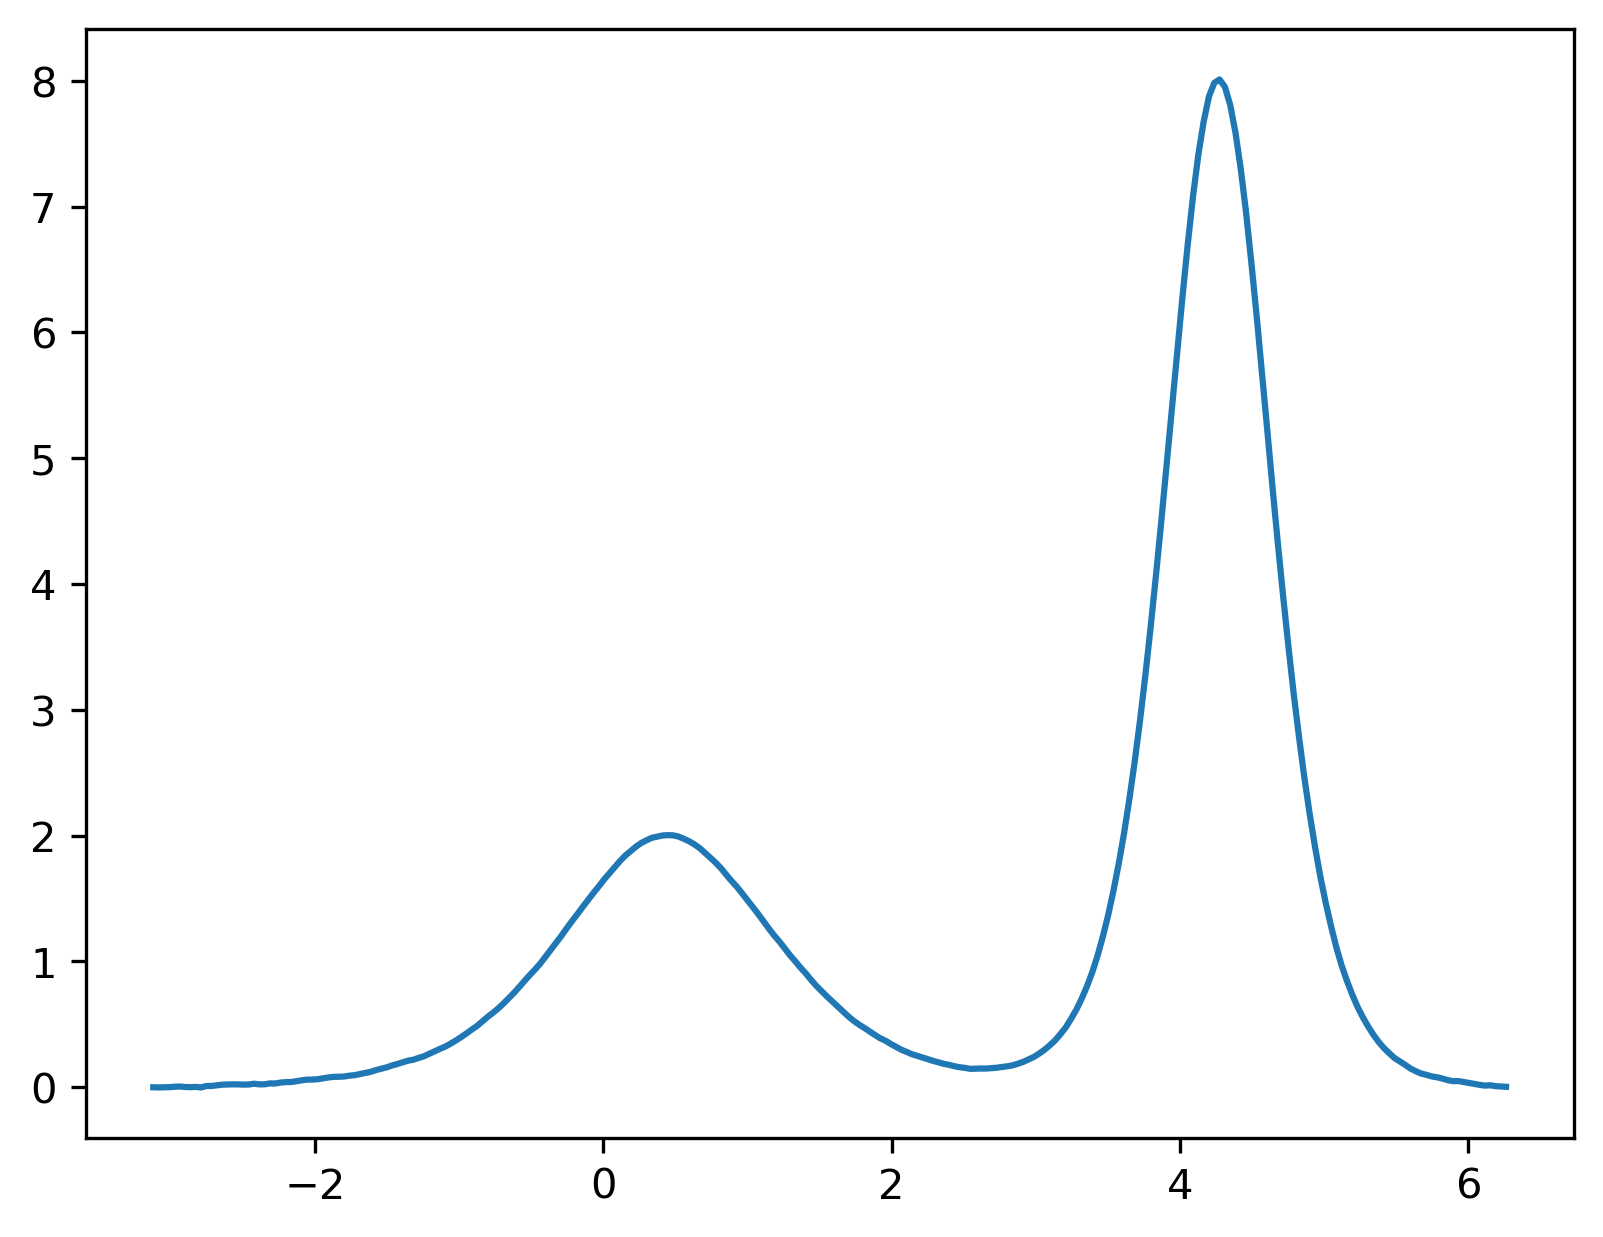

In [4]:
plt.plot(grid1.get_line_data()['data_x'], data1.data[2500])

In [24]:
class kdv1dNN(torch.nn.Module):
    def __init__(self, nHidden, dHidden, nIn, nOut):
        super().__init__()
        self.input = torch.nn.Sequential(*[
            torch.nn.Linear(nIn, dHidden, bias=False),
            torch.nn.GELU()
        ])
        self.hidden = torch.nn.Sequential(*[
            torch.nn.Sequential(*[
                torch.nn.Linear(dHidden, dHidden, bias=False),
                torch.nn.GELU()
            ])
         for _ in range(nHidden-1)])
        self.output = torch.nn.Sequential(
            *[torch.nn.Linear(dHidden, nOut, bias=False),
             #torch.nn.Tanh()
             ]
        )
    def forward(self, x):
        x = self.input(x)
        x = self.hidden(x)
        x = self.output(x)
        return x

Step number: 0, Loss: 5.185250759124756


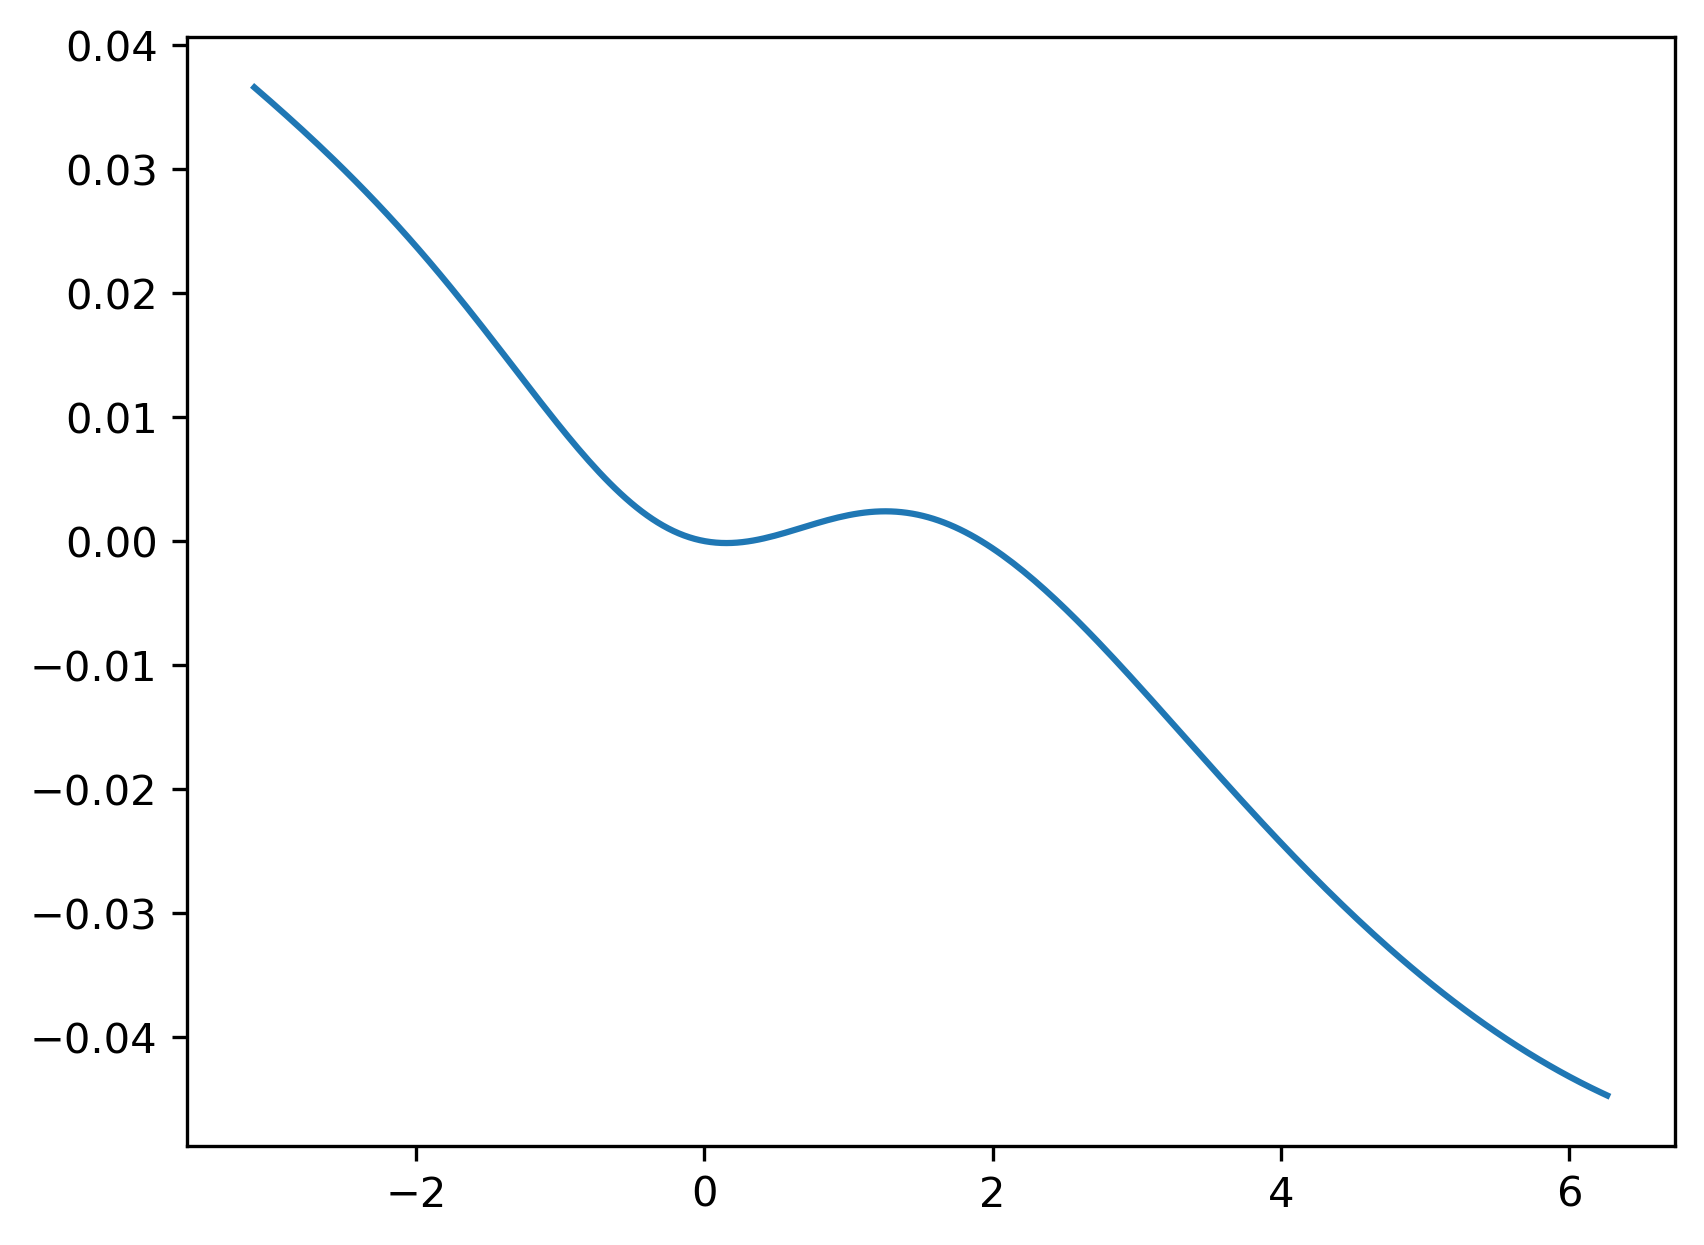

Step number: 1000, Loss: 0.33428463339805603


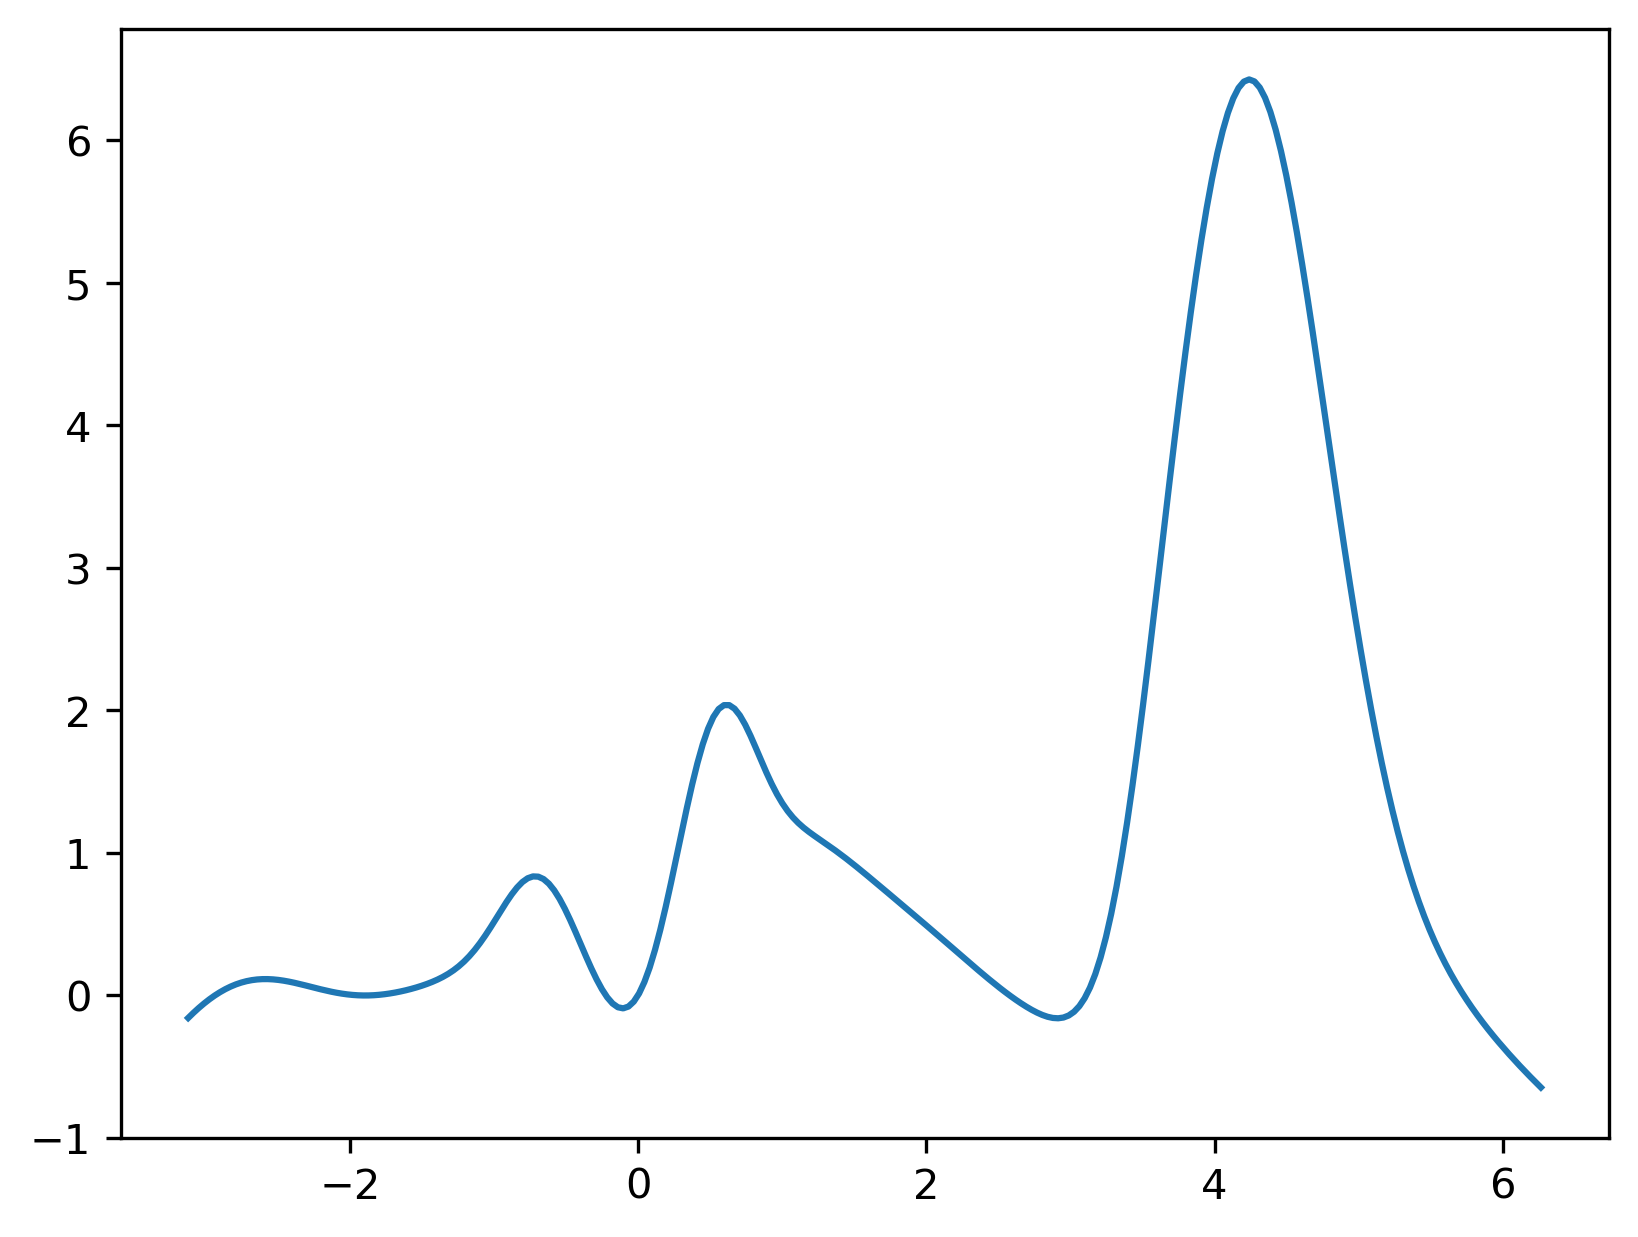

Step number: 2000, Loss: 0.08077006787061691


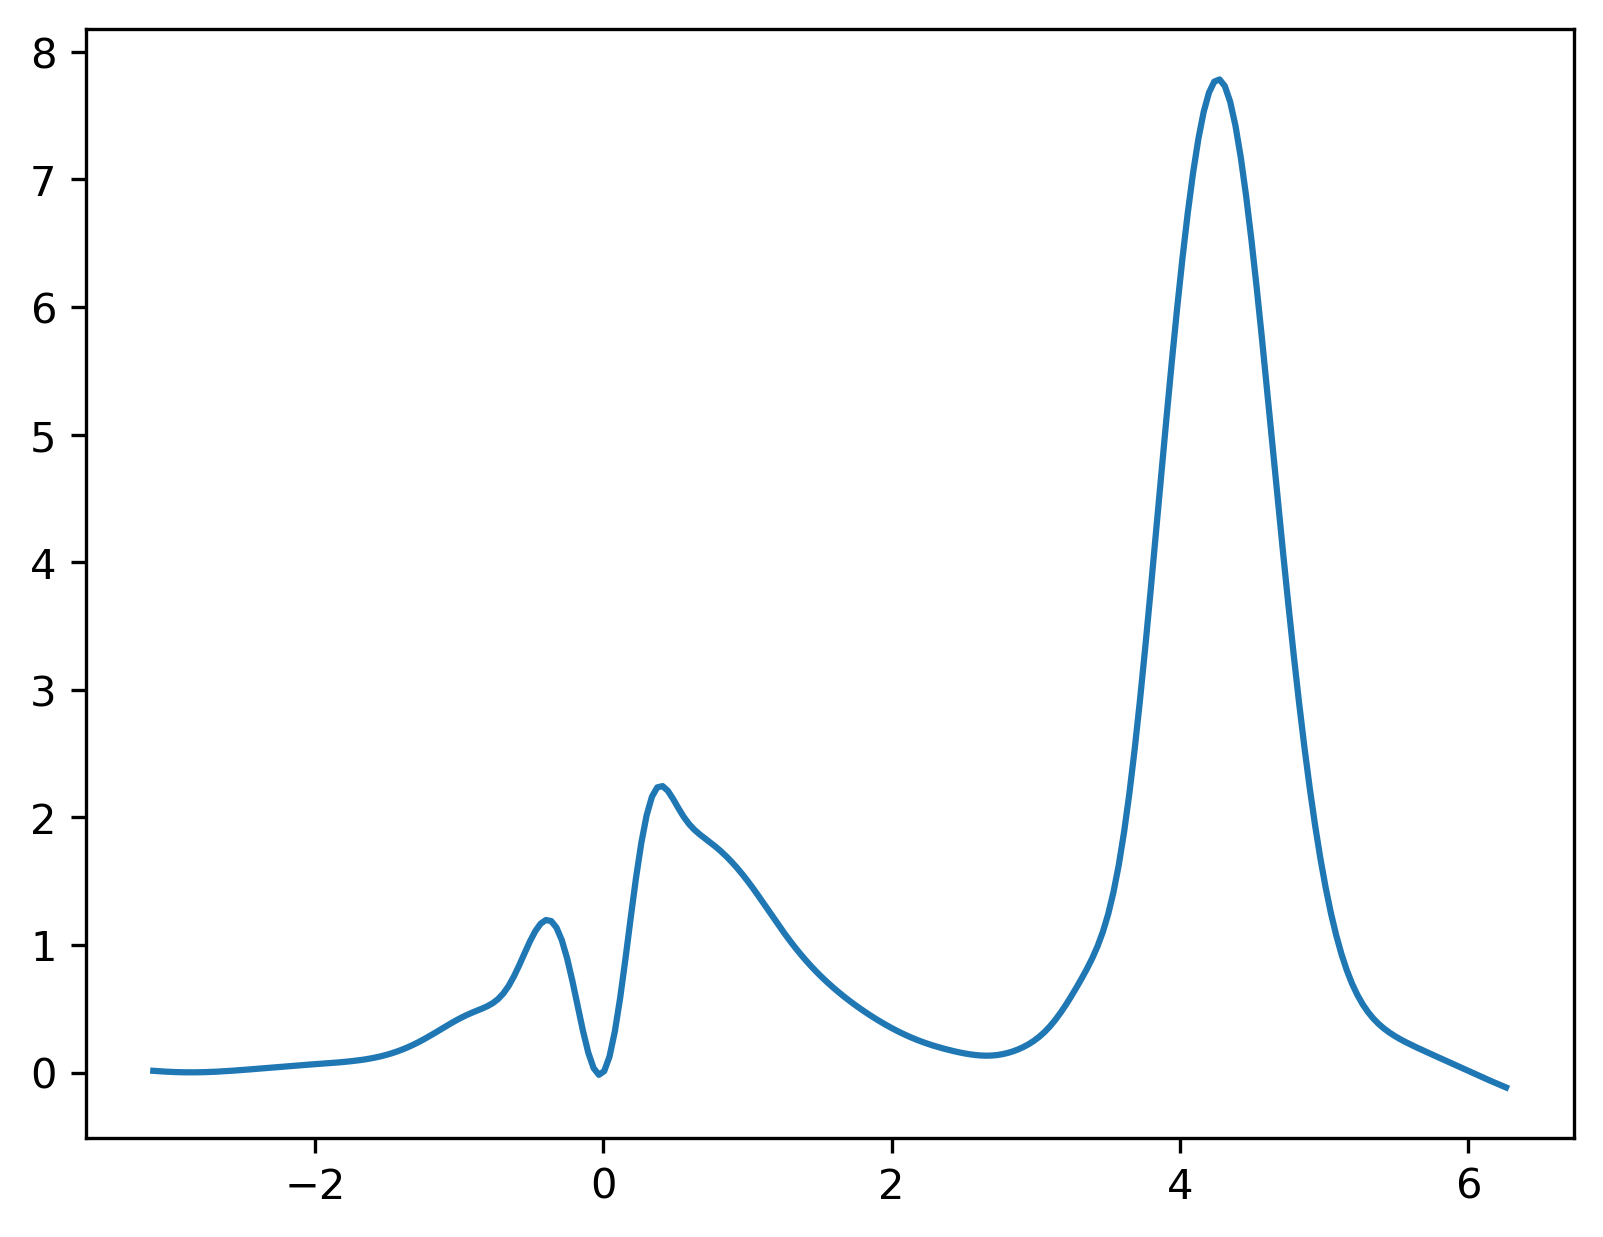

Step number: 3000, Loss: 0.05085518956184387


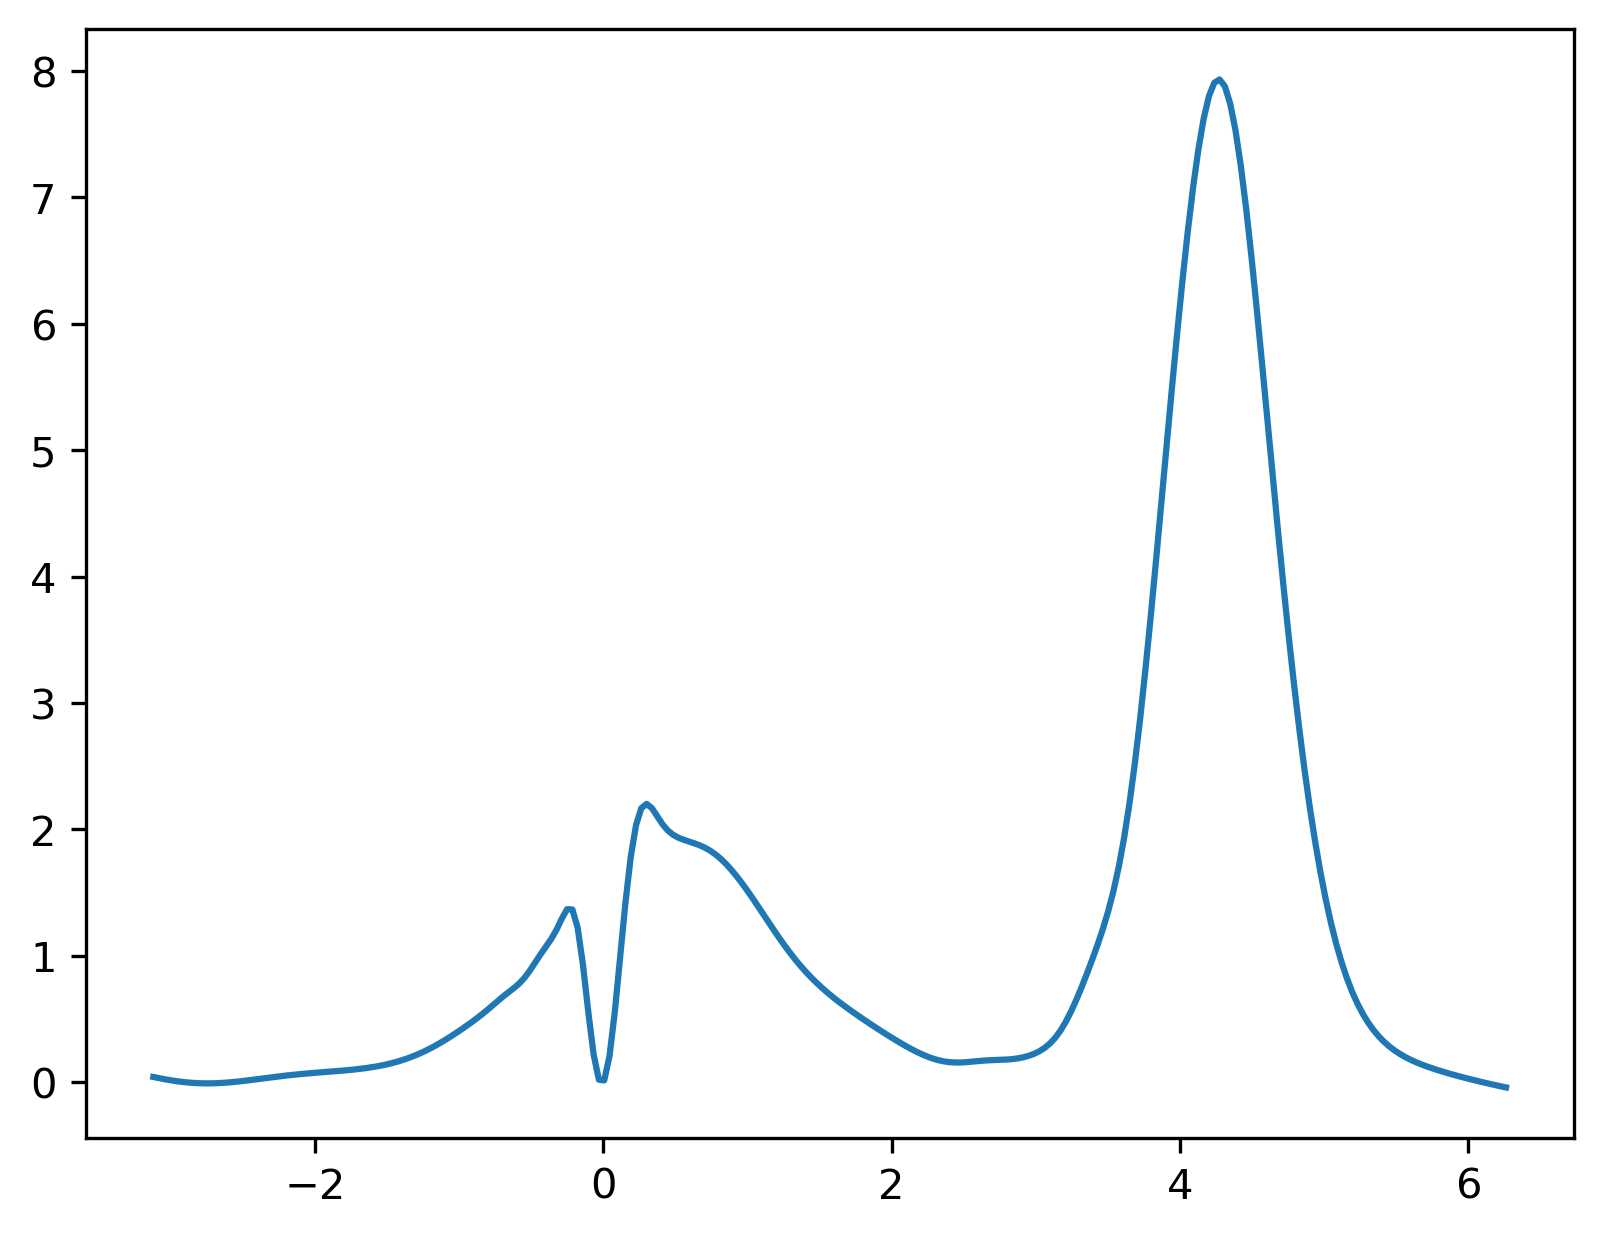

Step number: 4000, Loss: 0.03383655101060867


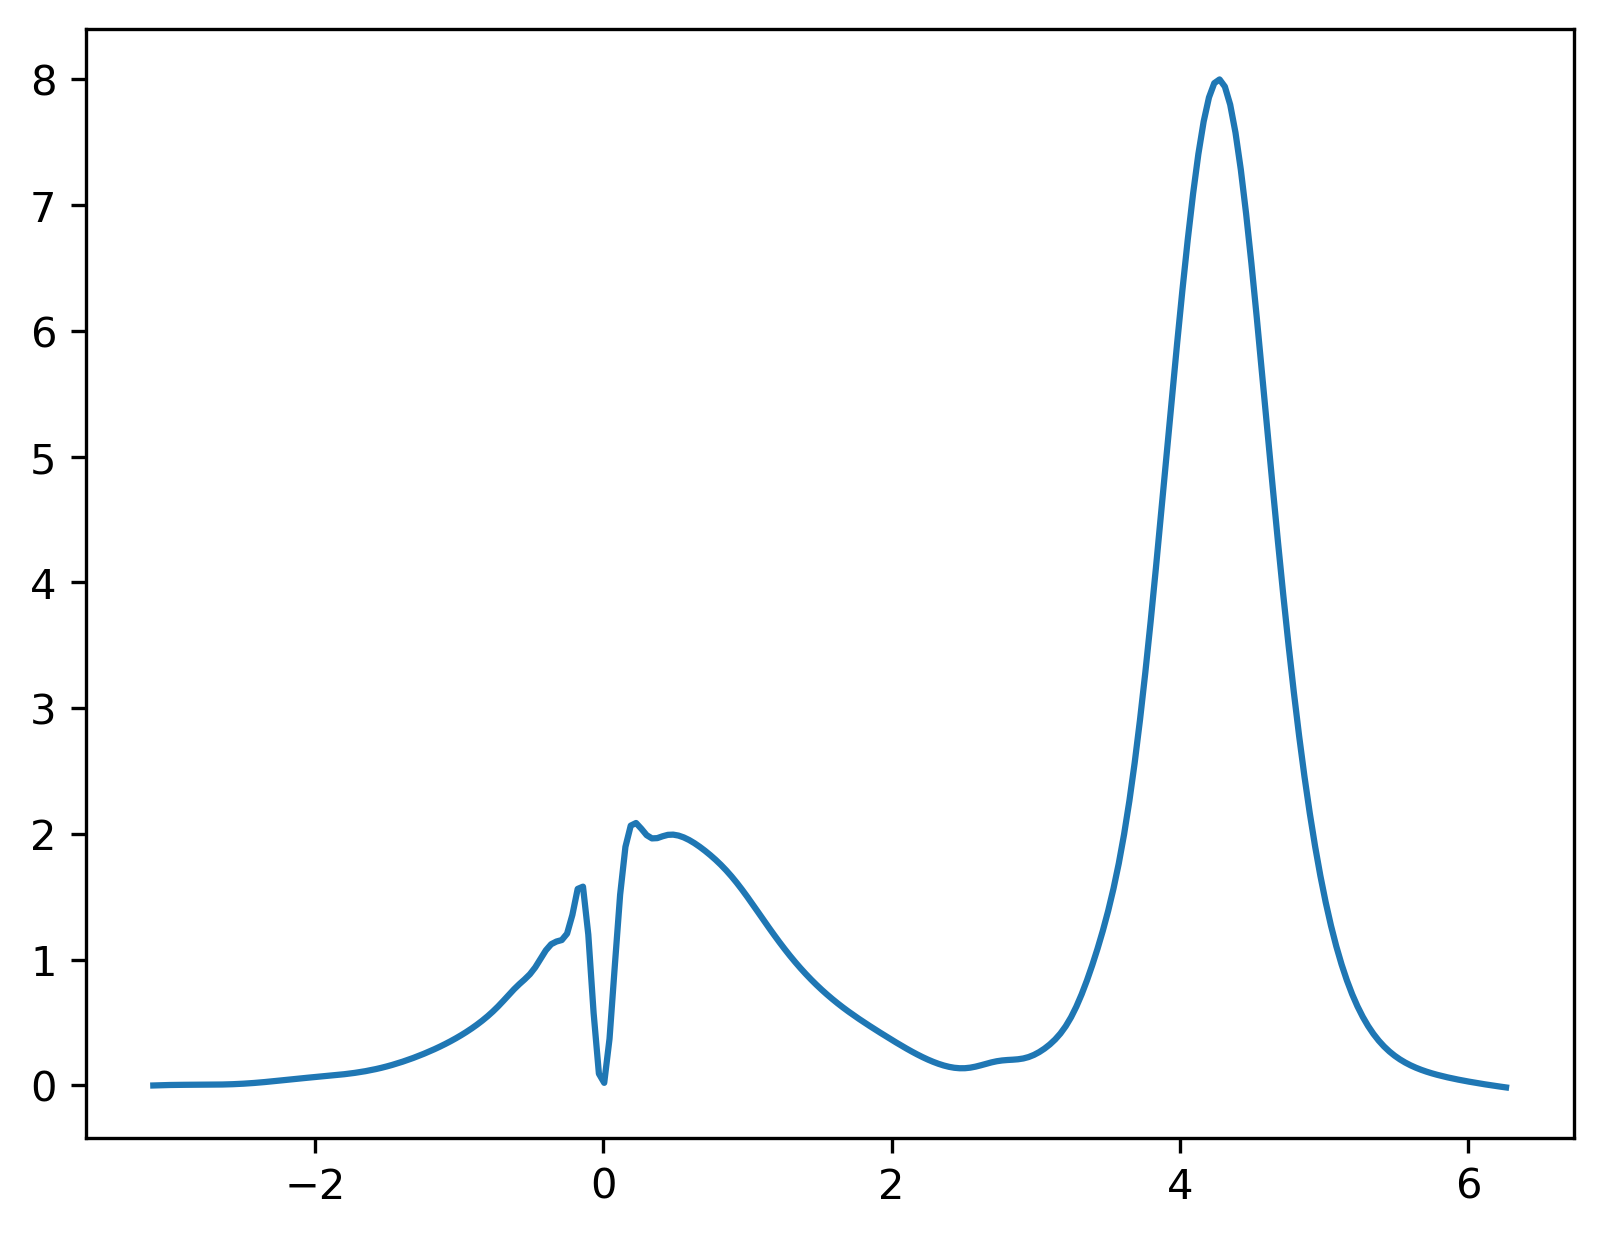

Step number: 5000, Loss: 0.023582108318805695


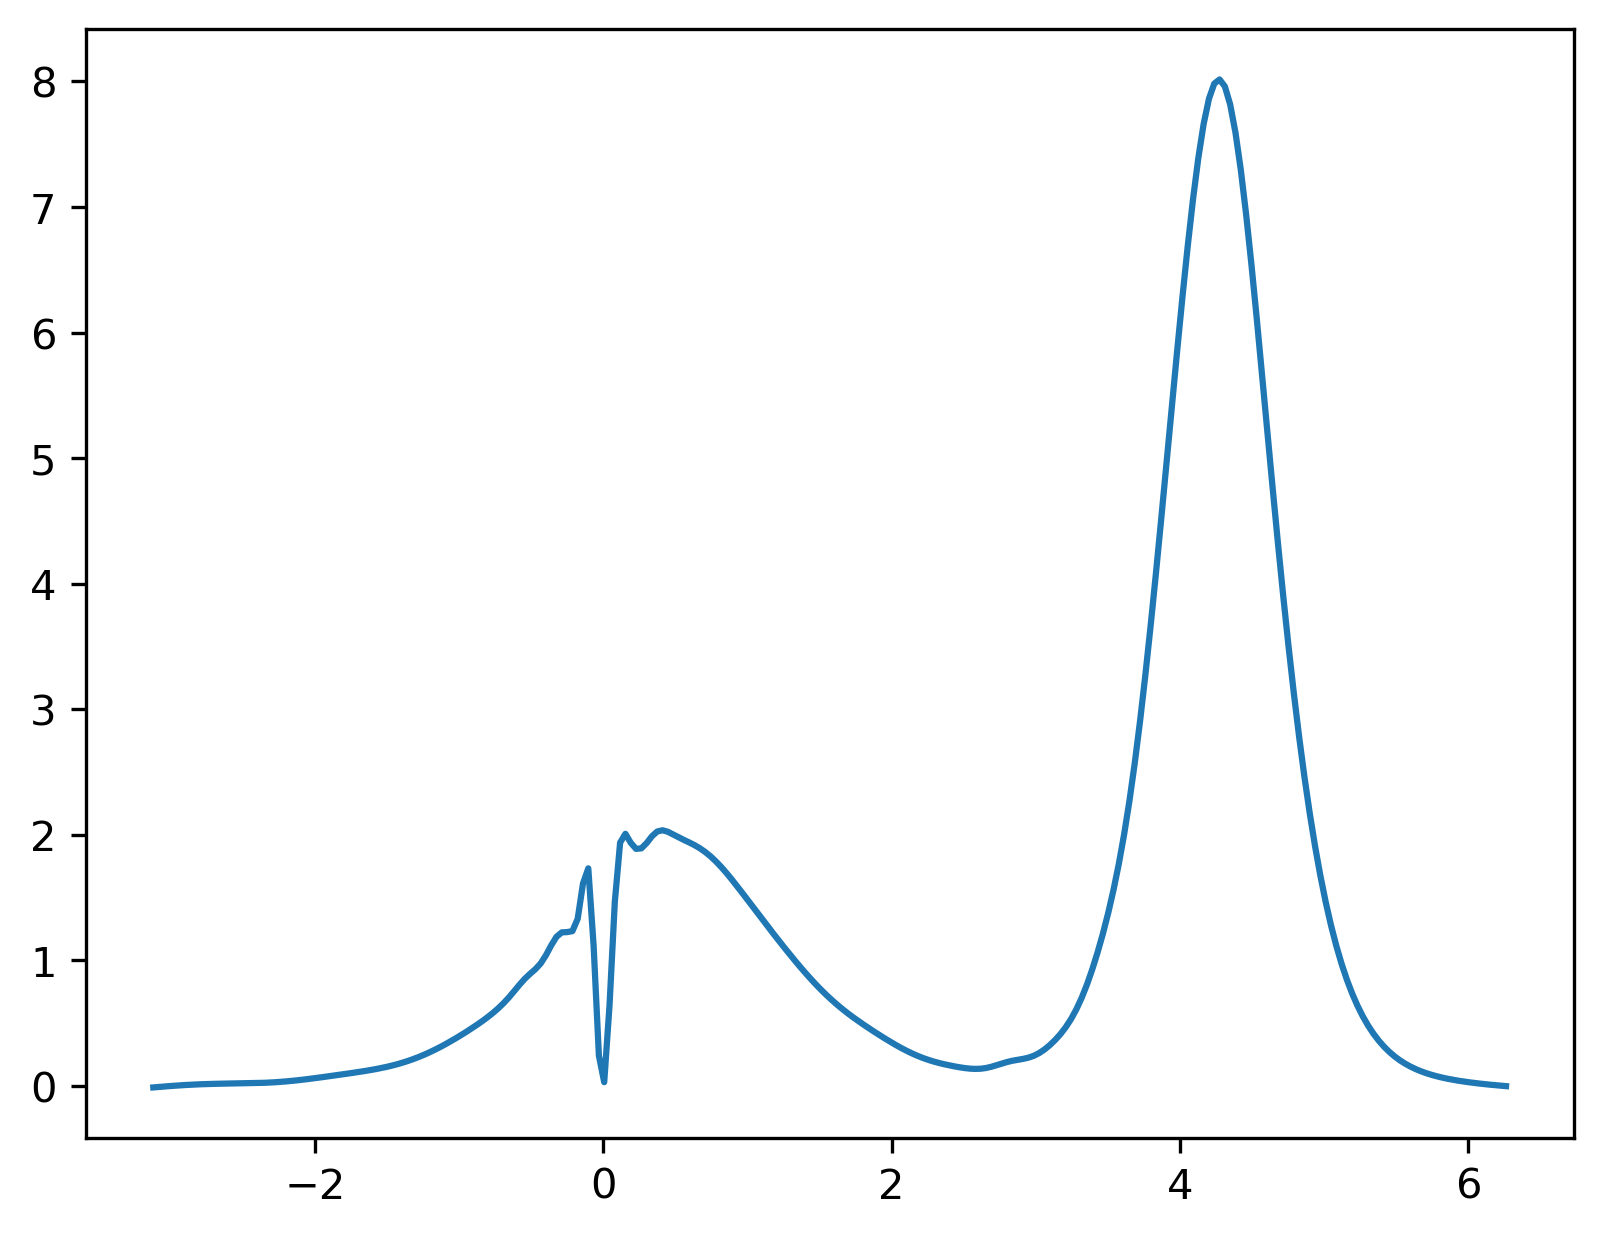

Step number: 6000, Loss: 0.017461609095335007


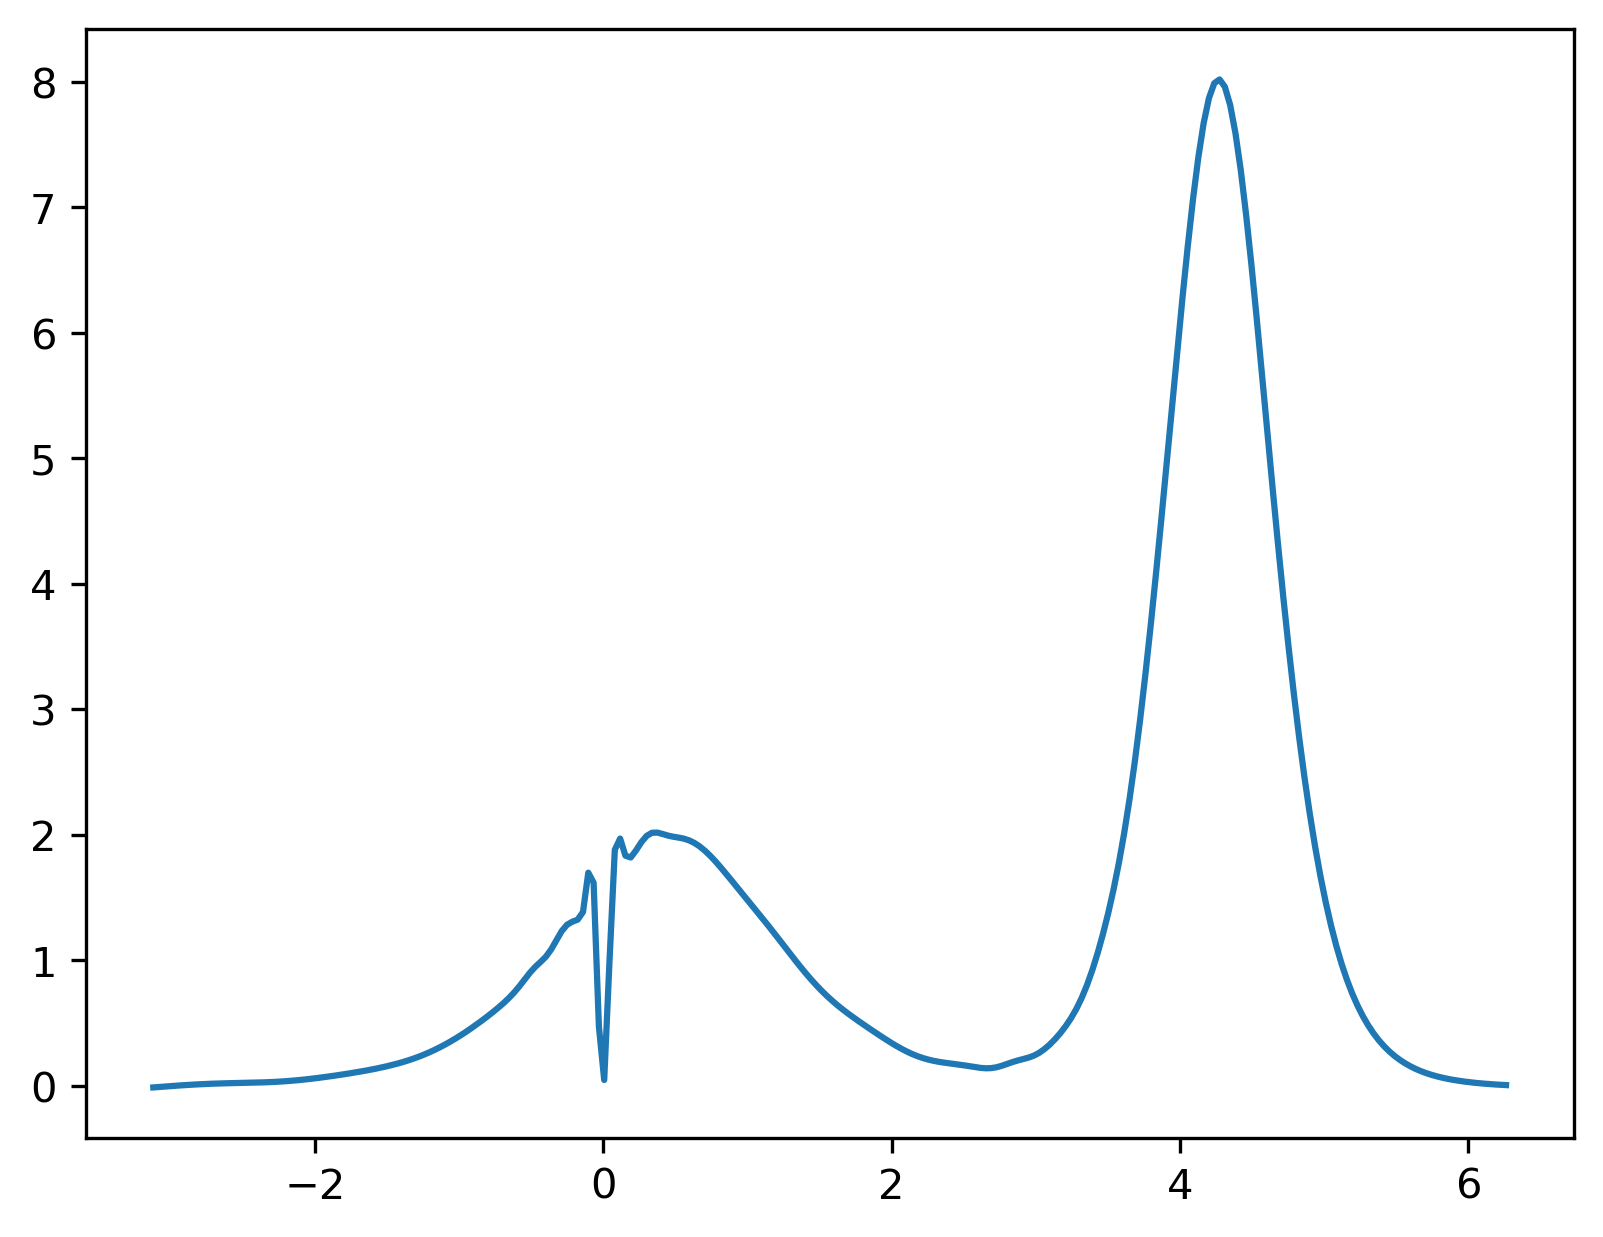

Step number: 7000, Loss: 0.01364978589117527


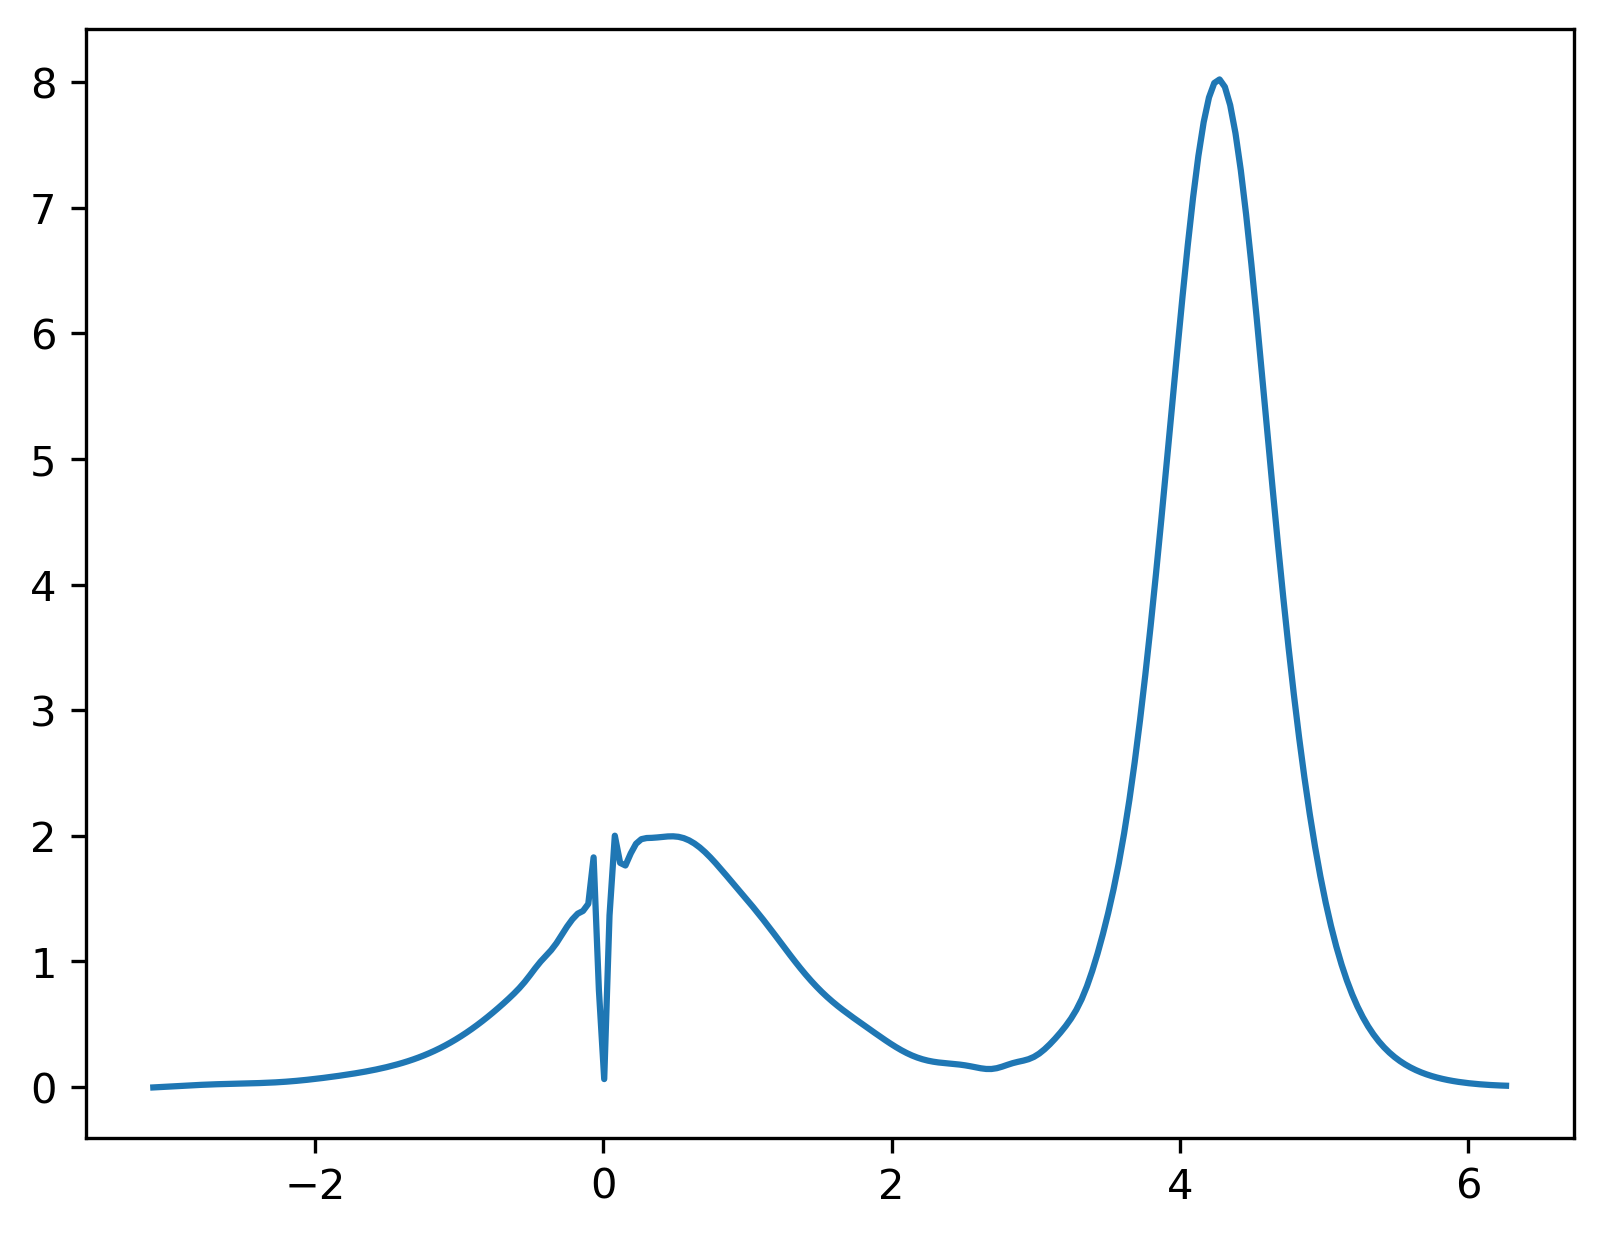

Step number: 8000, Loss: 0.010700368322432041


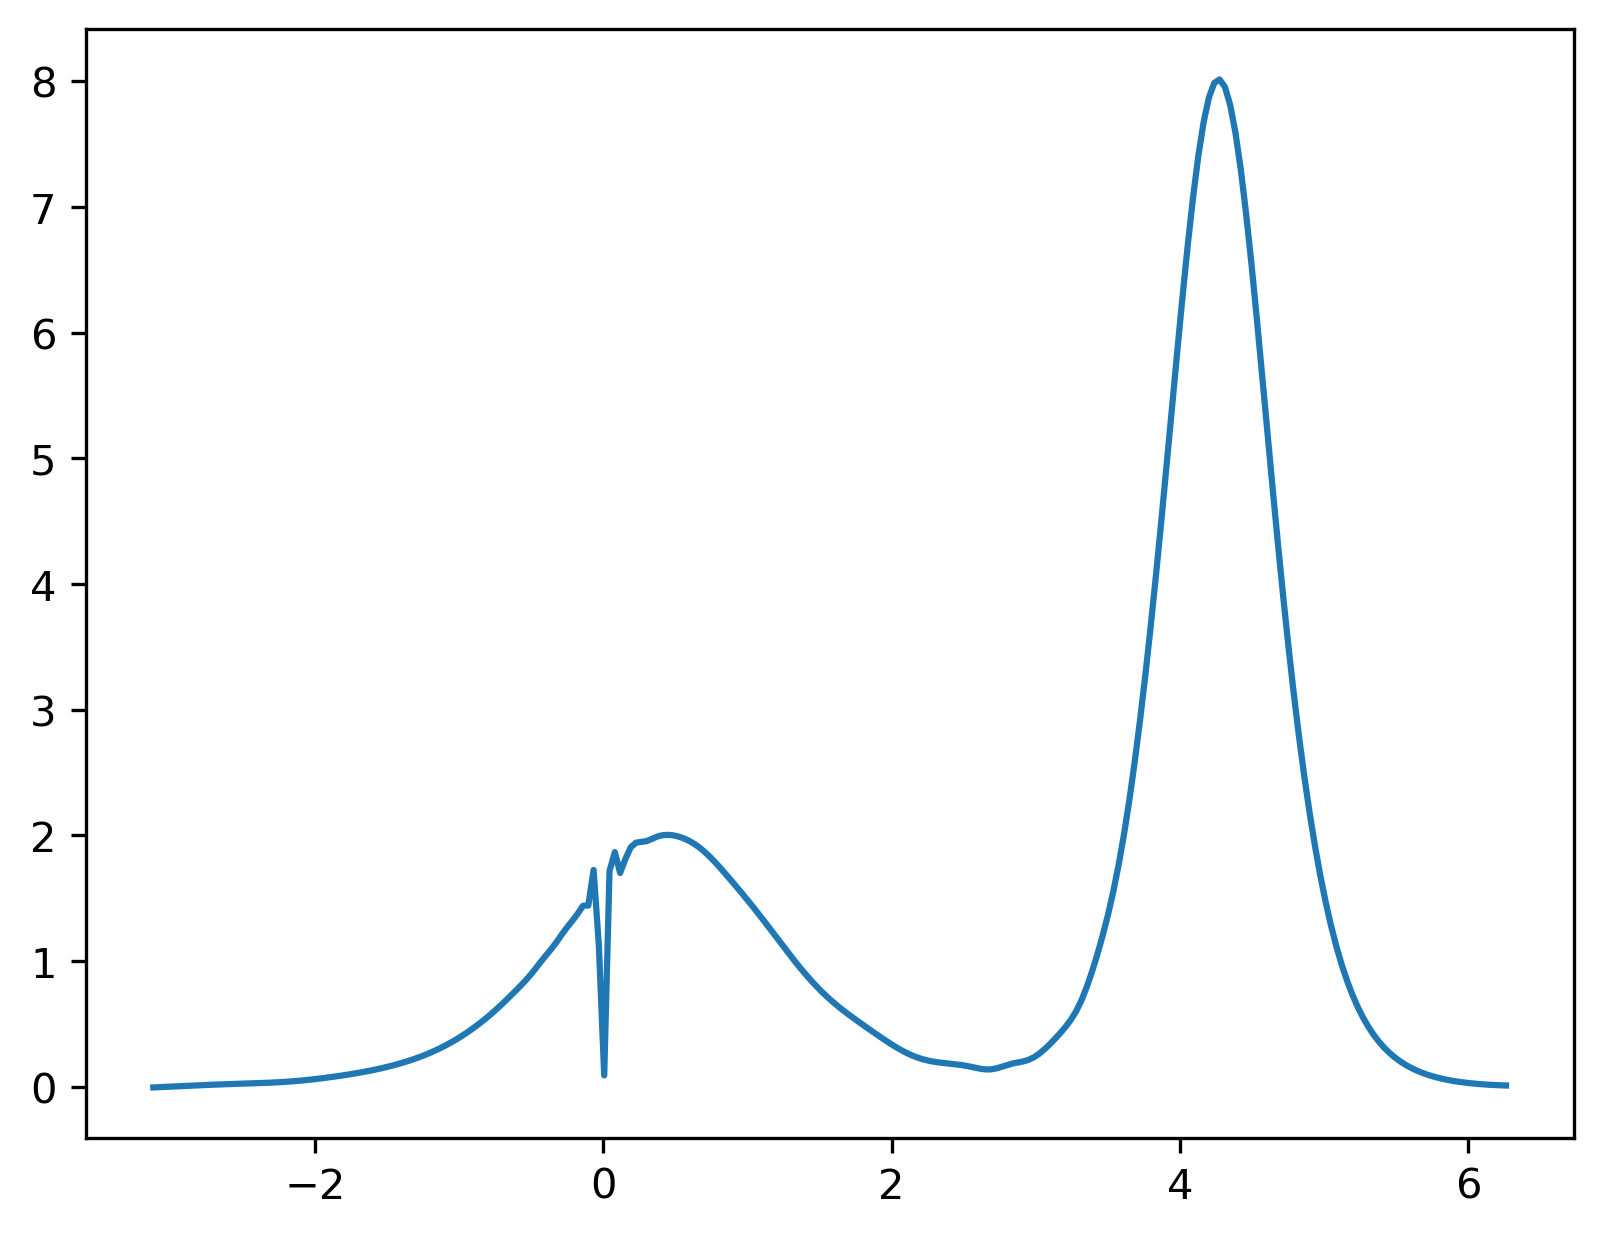

Step number: 9000, Loss: 0.009005842730402946


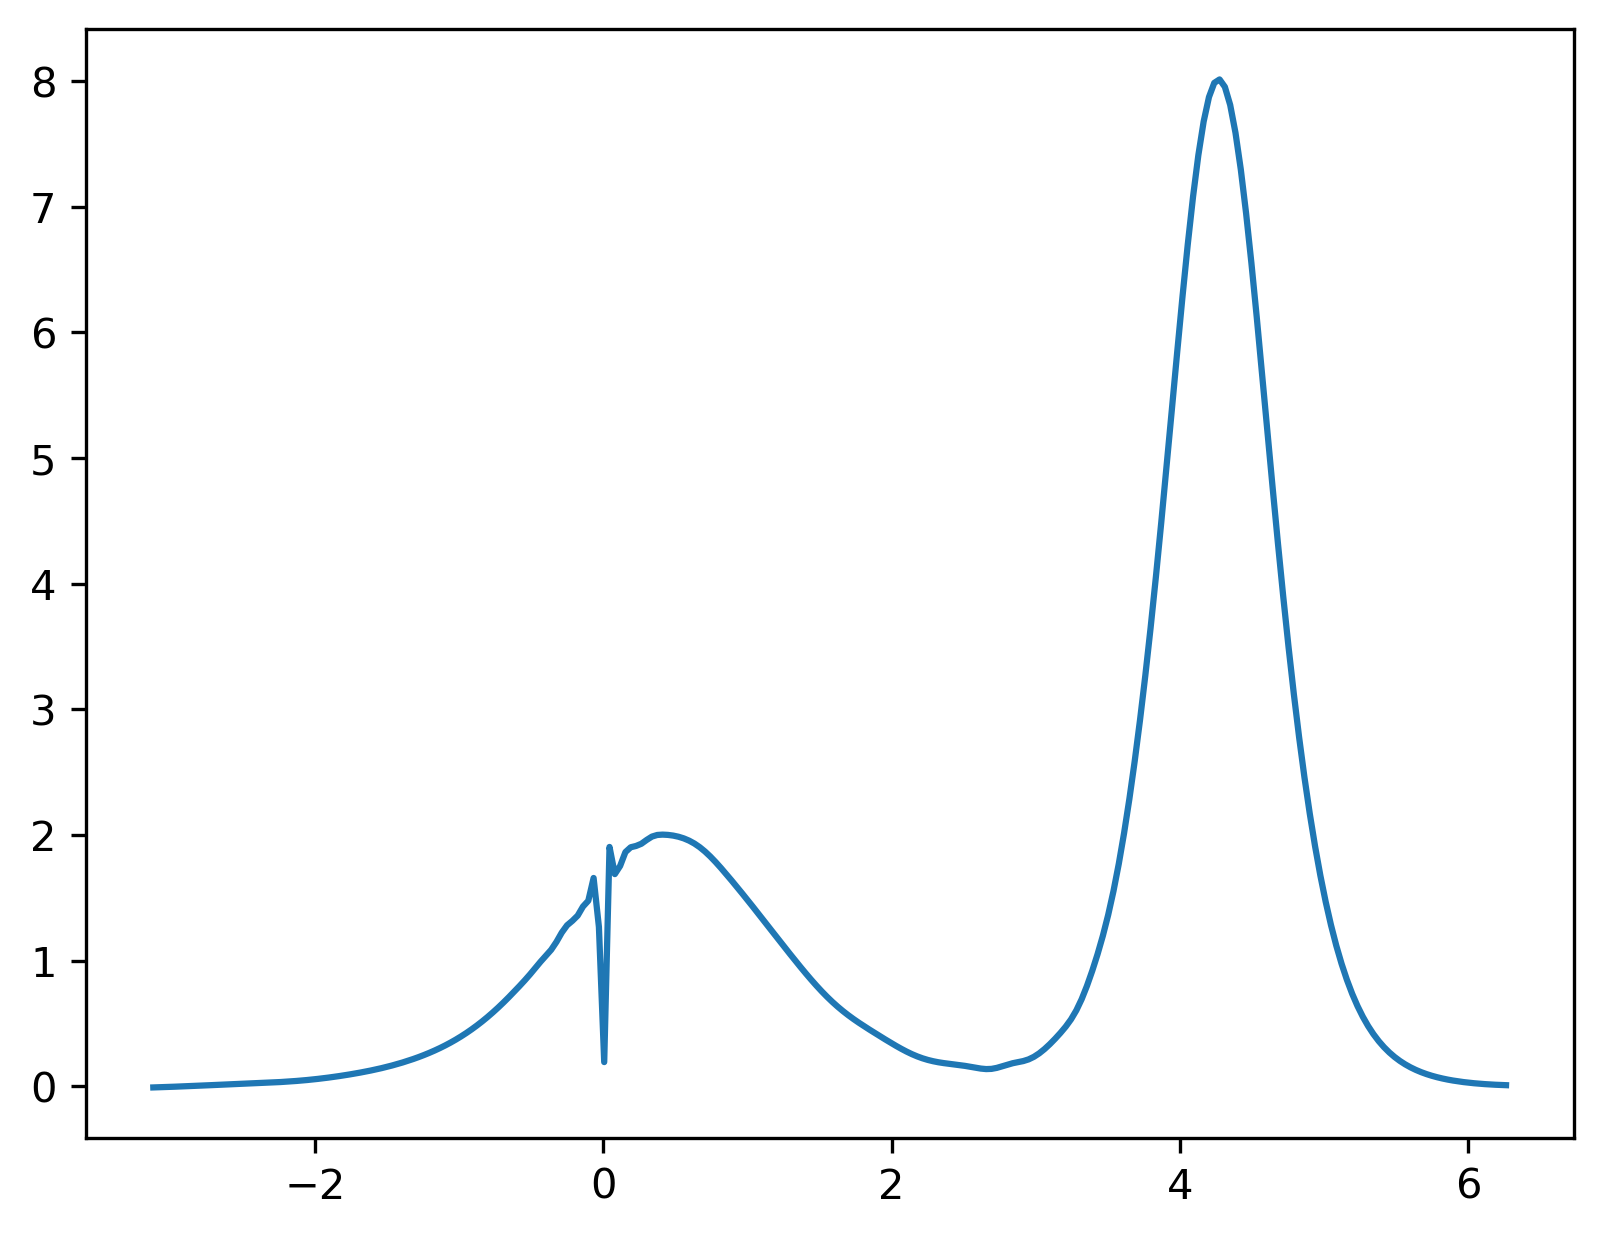

Step number: 10000, Loss: 0.005943846423178911


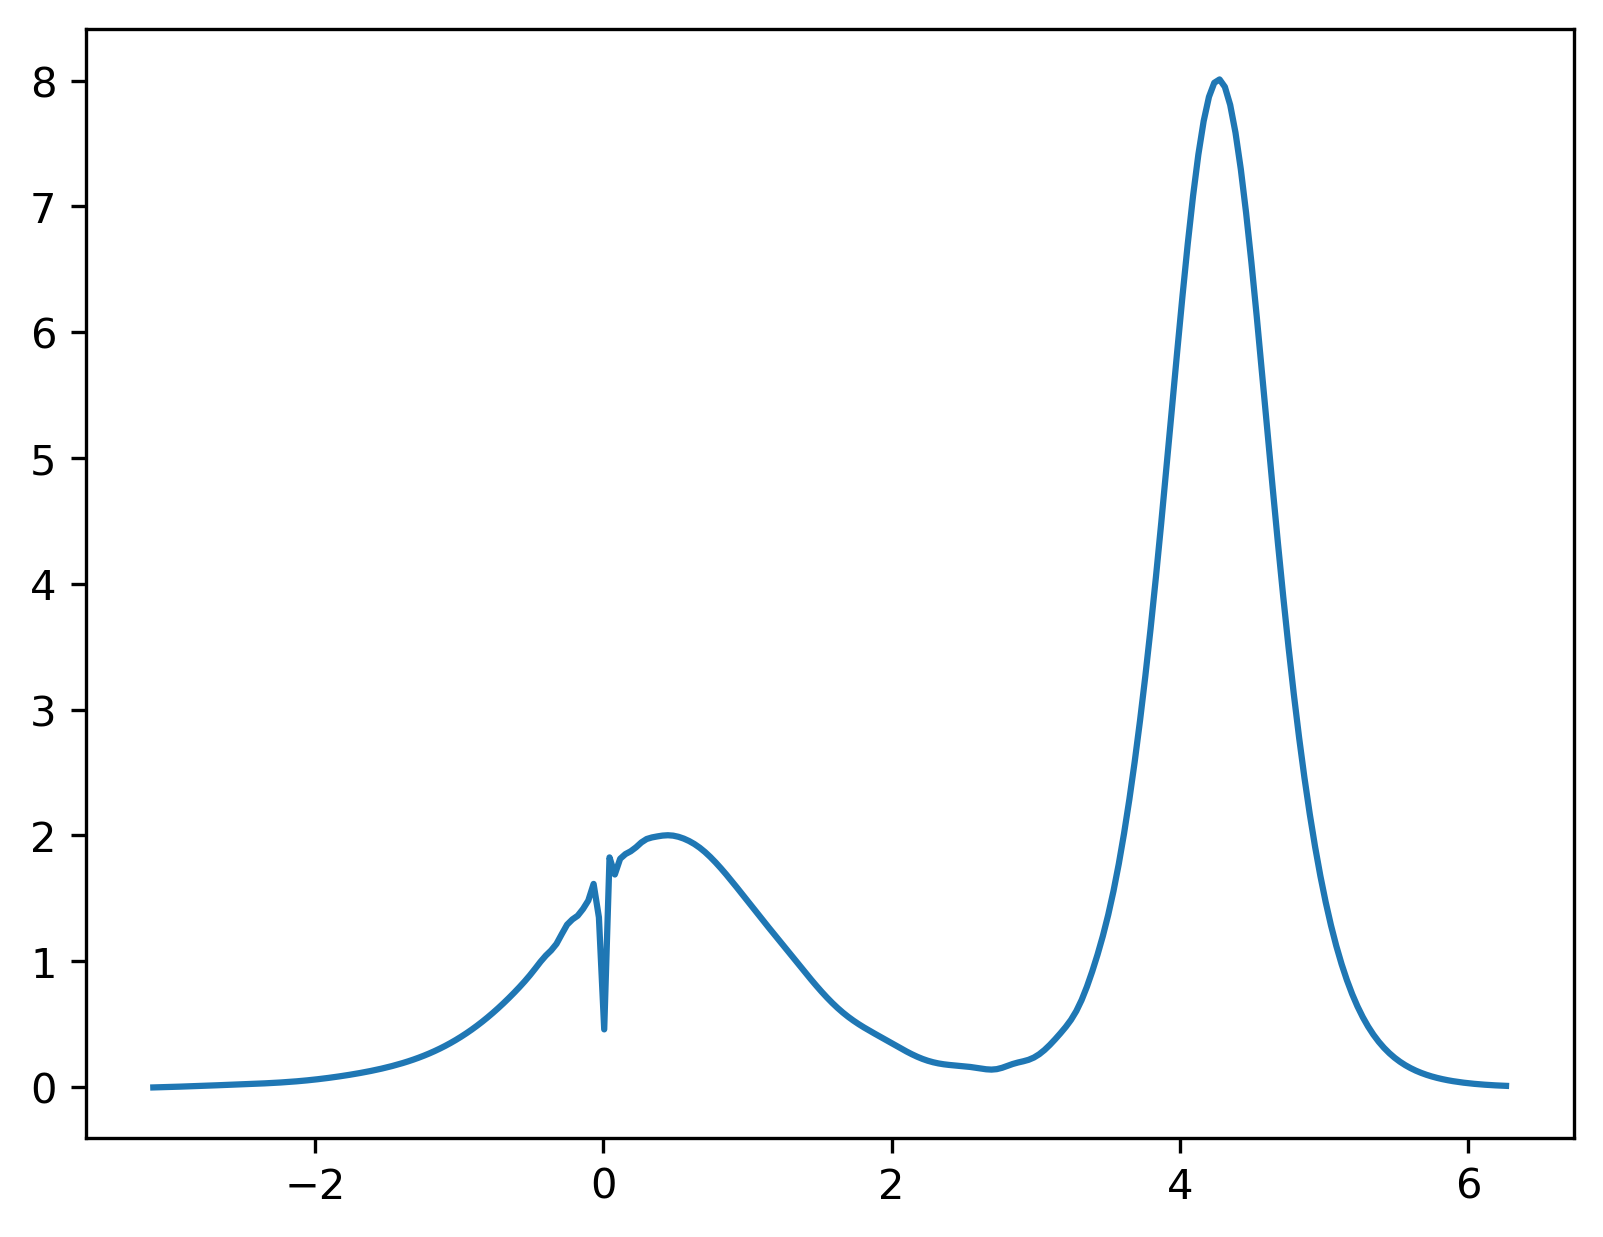

Step number: 11000, Loss: 0.0023199066054075956


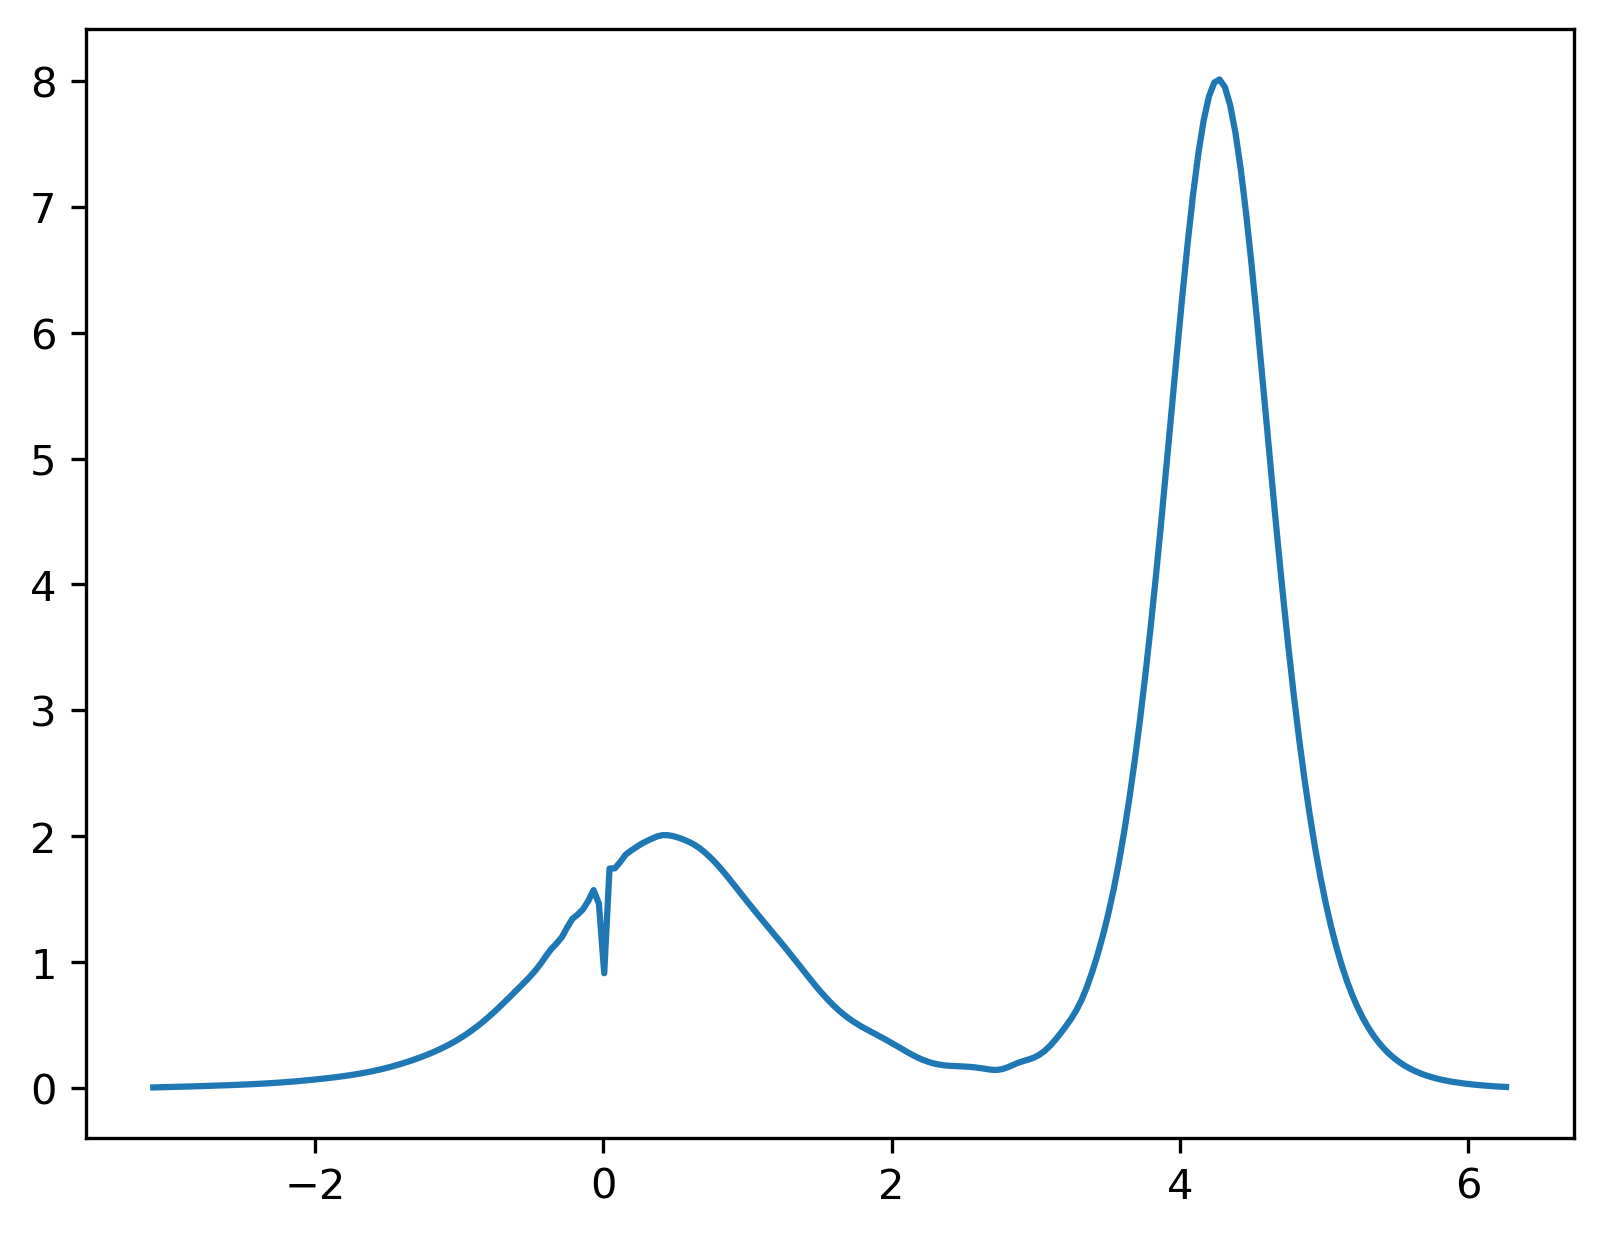

Step number: 12000, Loss: 0.000418976997025311


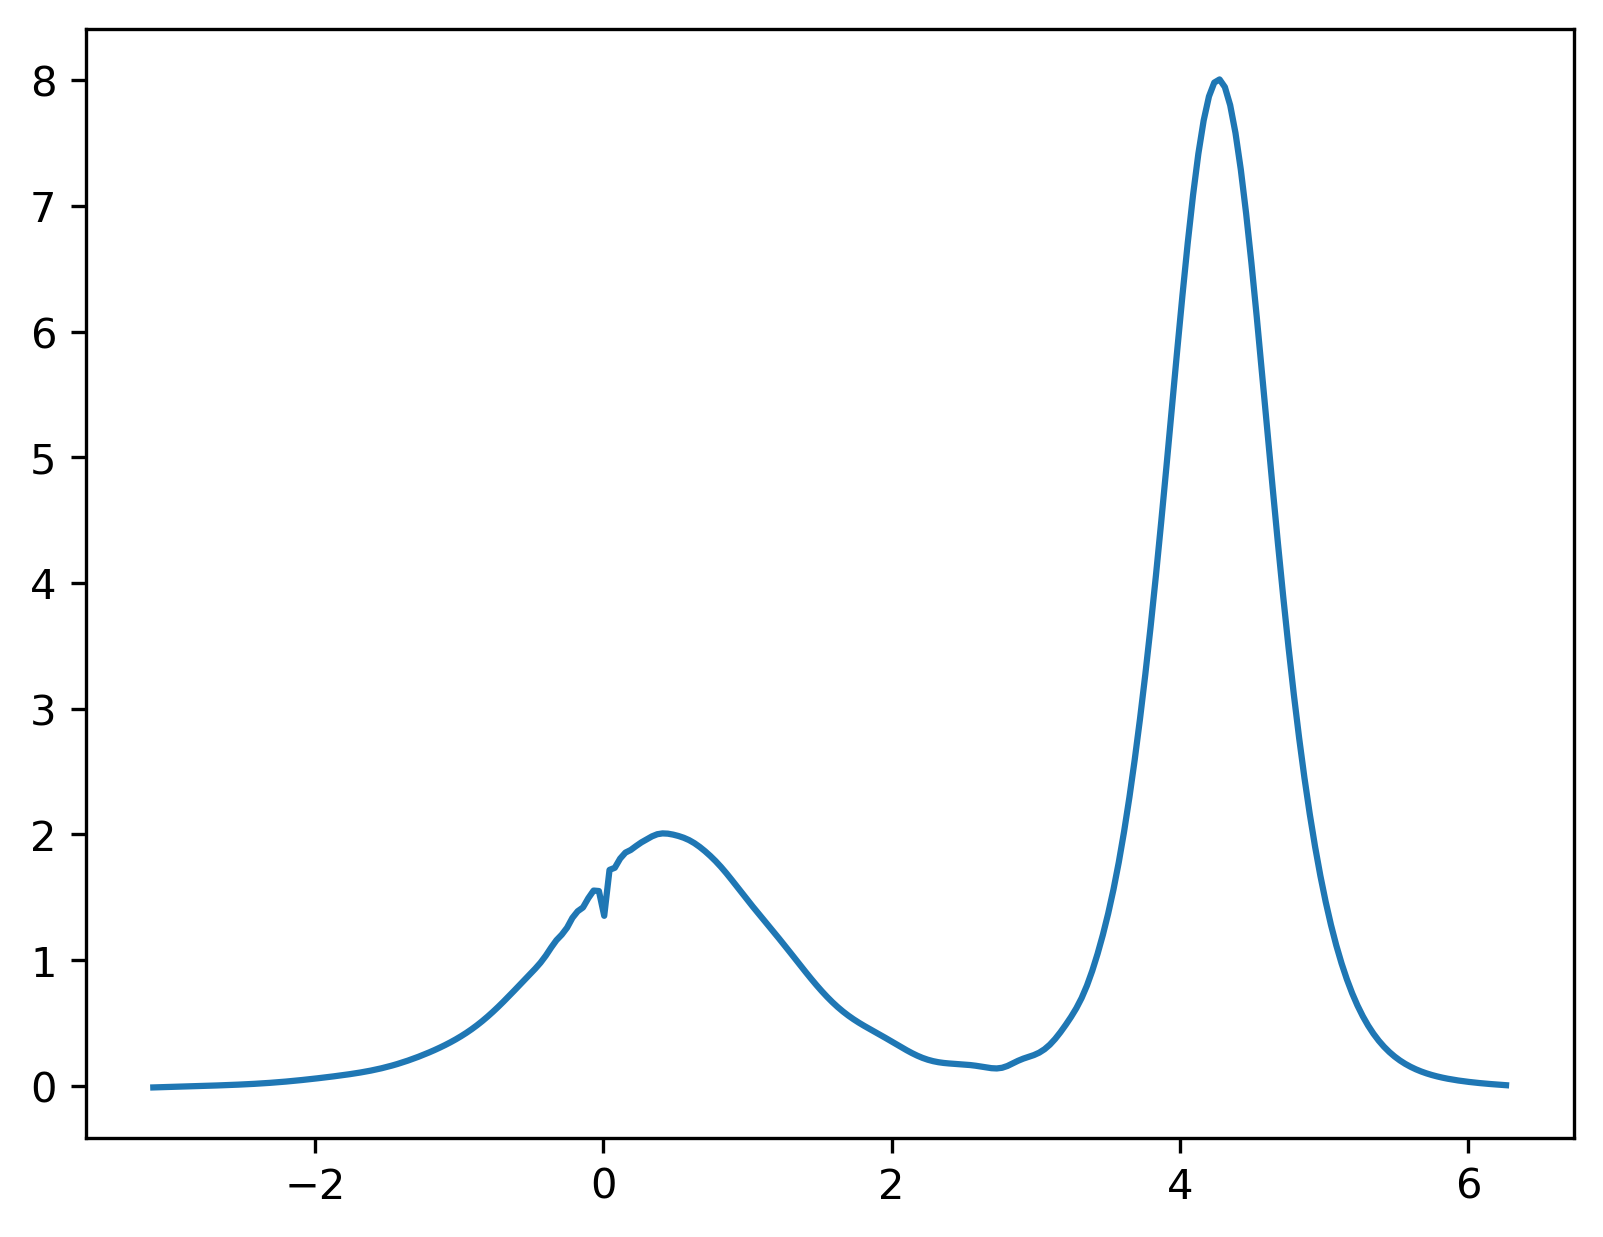

Step number: 13000, Loss: 0.00027927246992476285


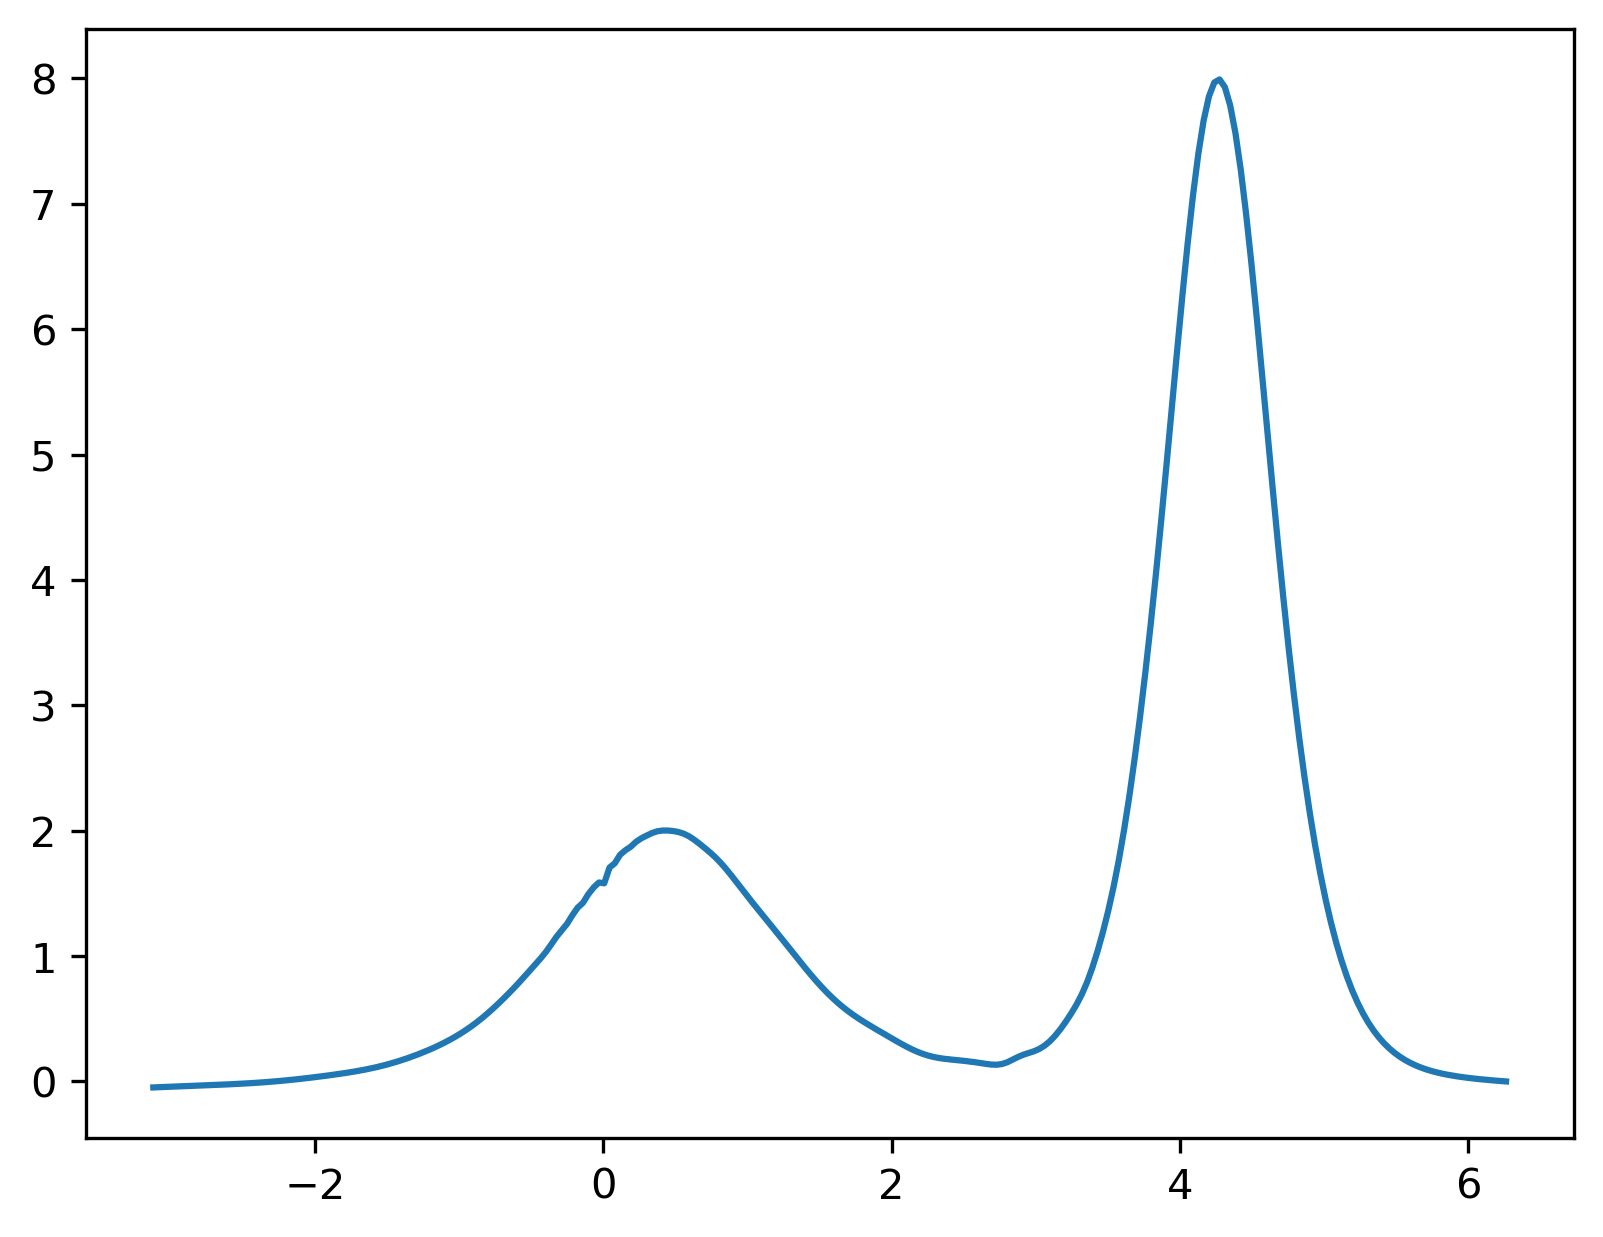

Step number: 14000, Loss: 2.465282886987552e-05


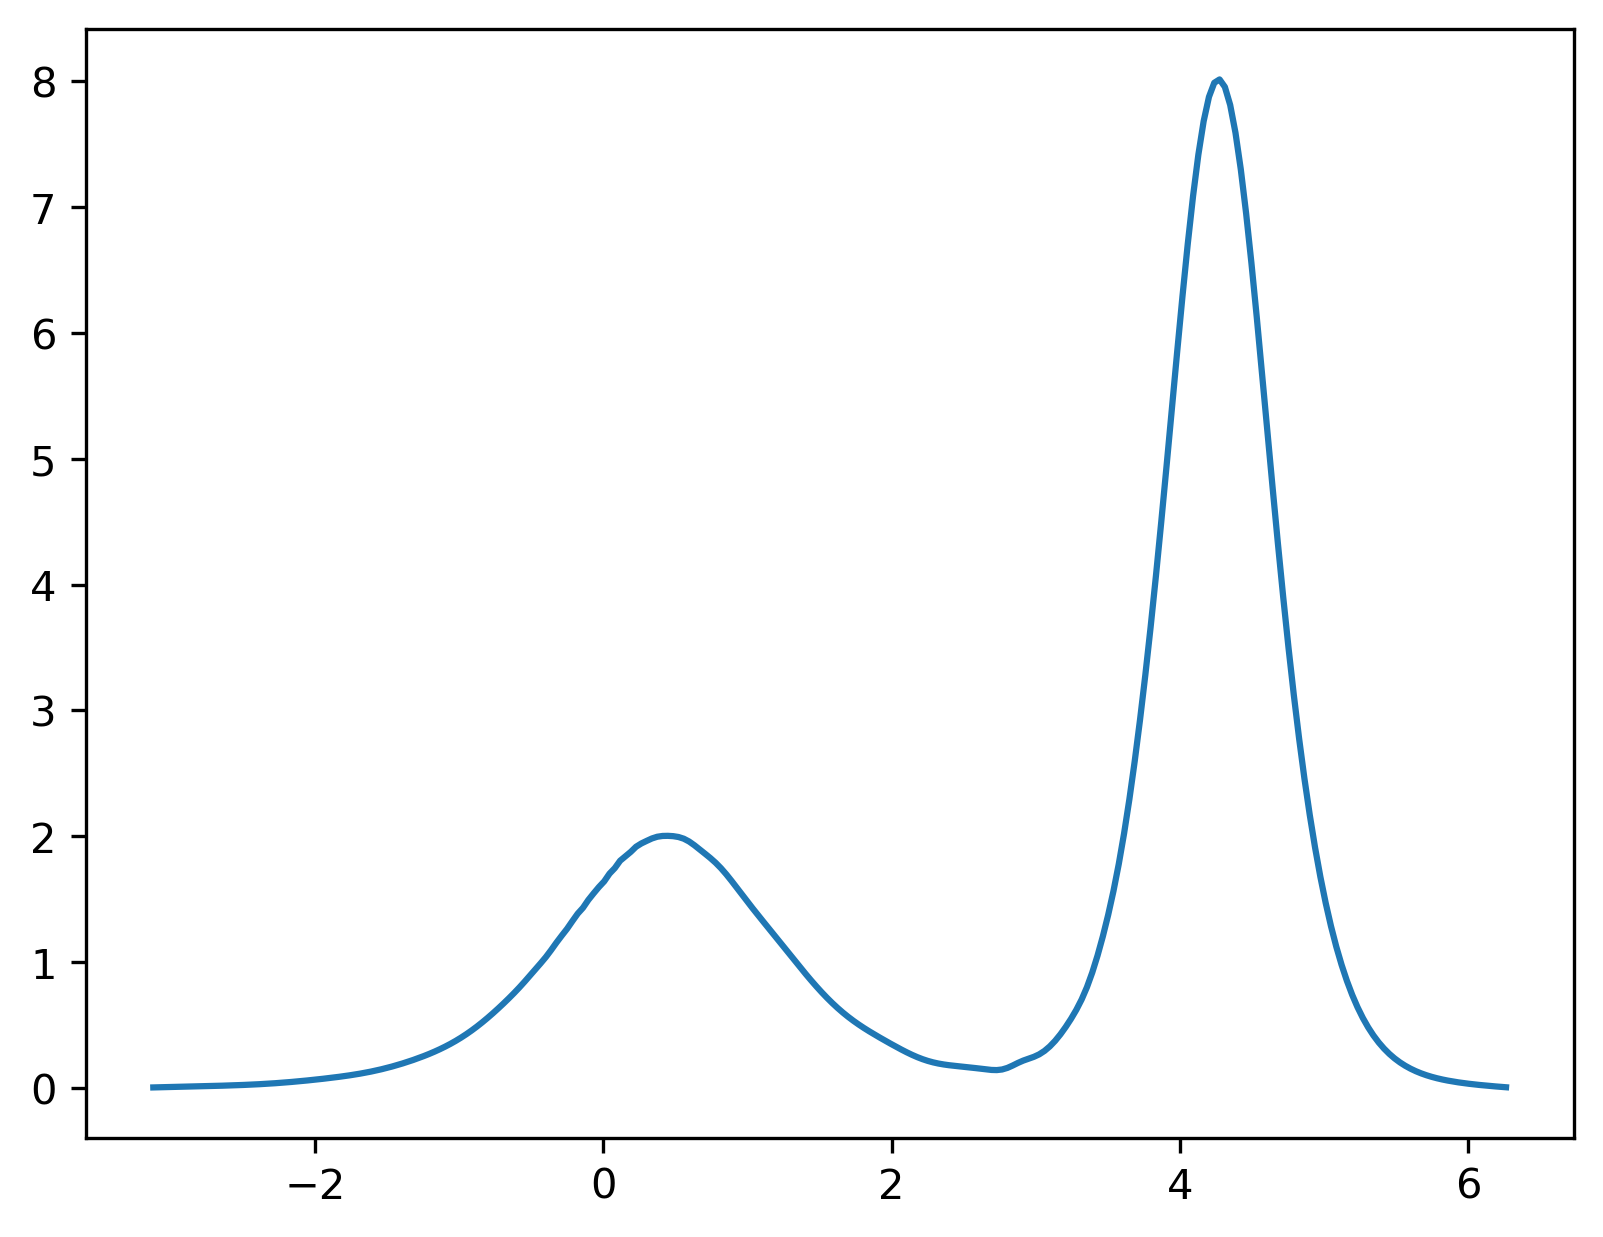

Step number: 15000, Loss: 1.672684811637737e-05


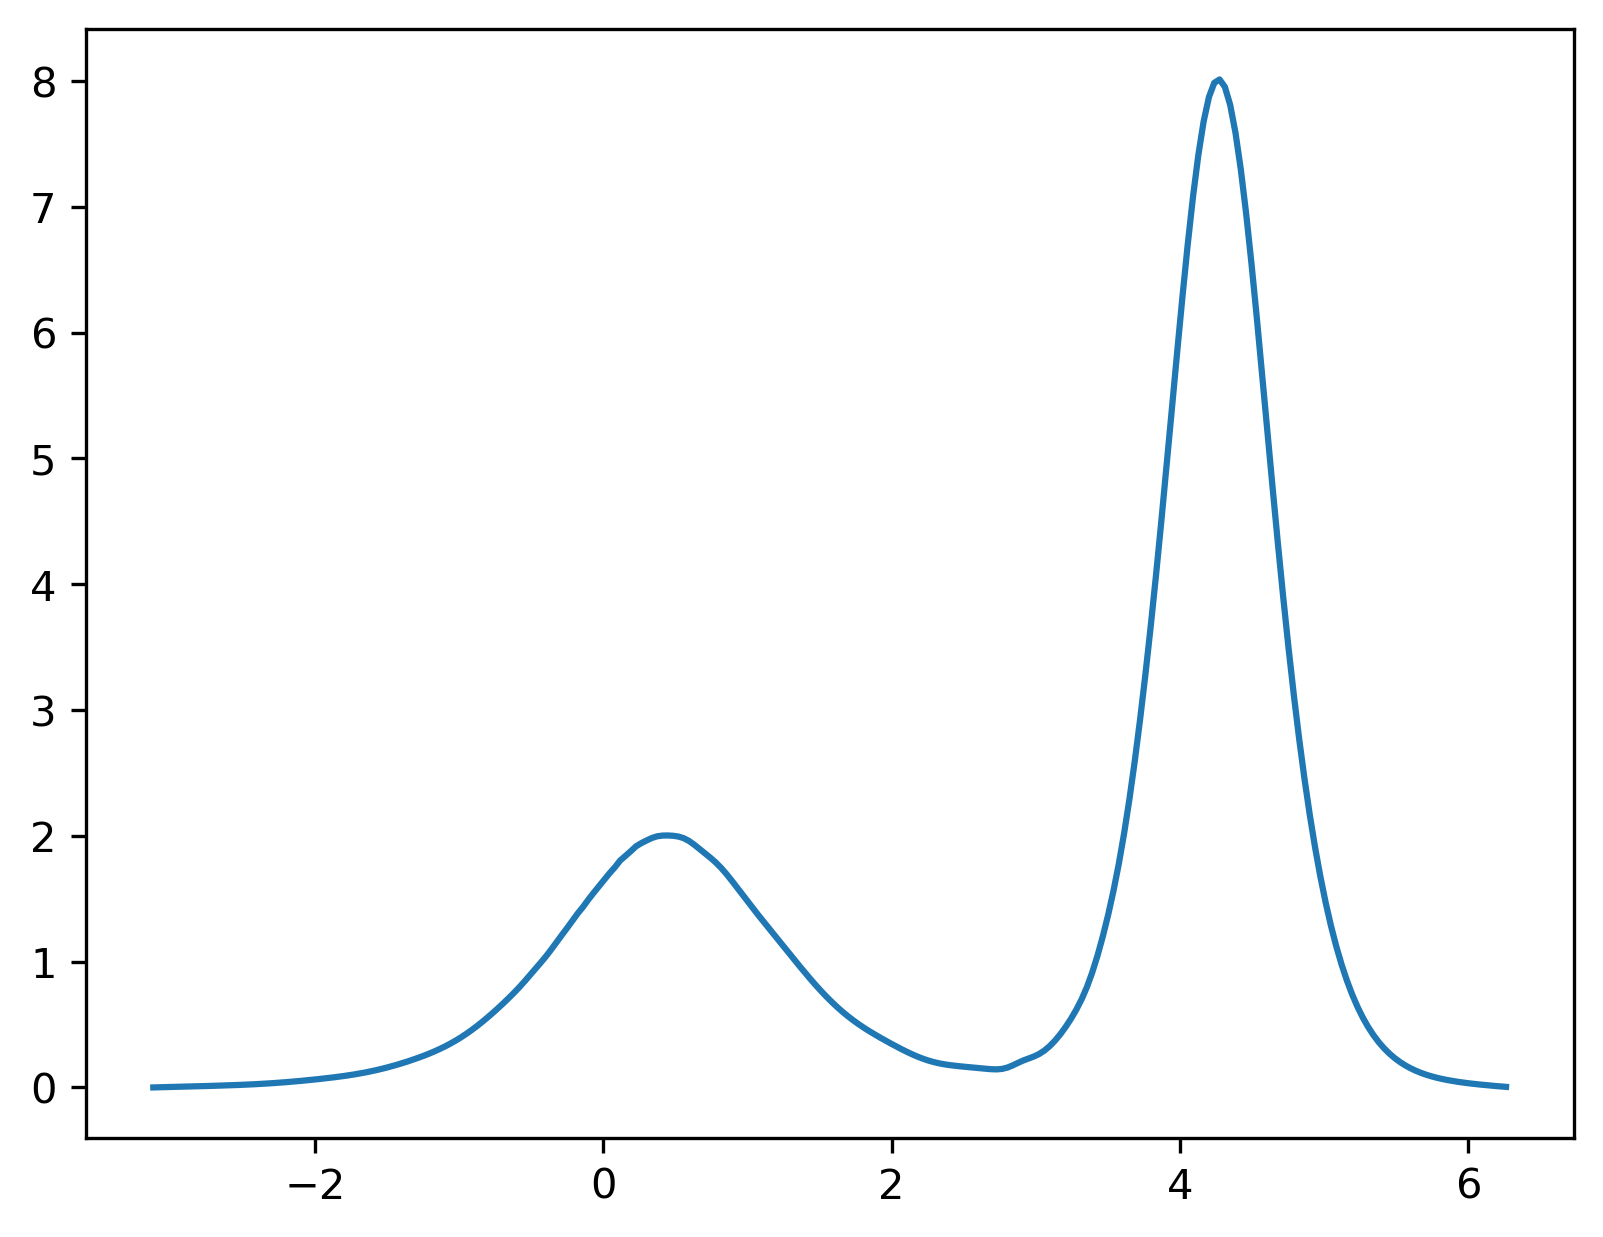

Step number: 16000, Loss: 2.4823260901030153e-05


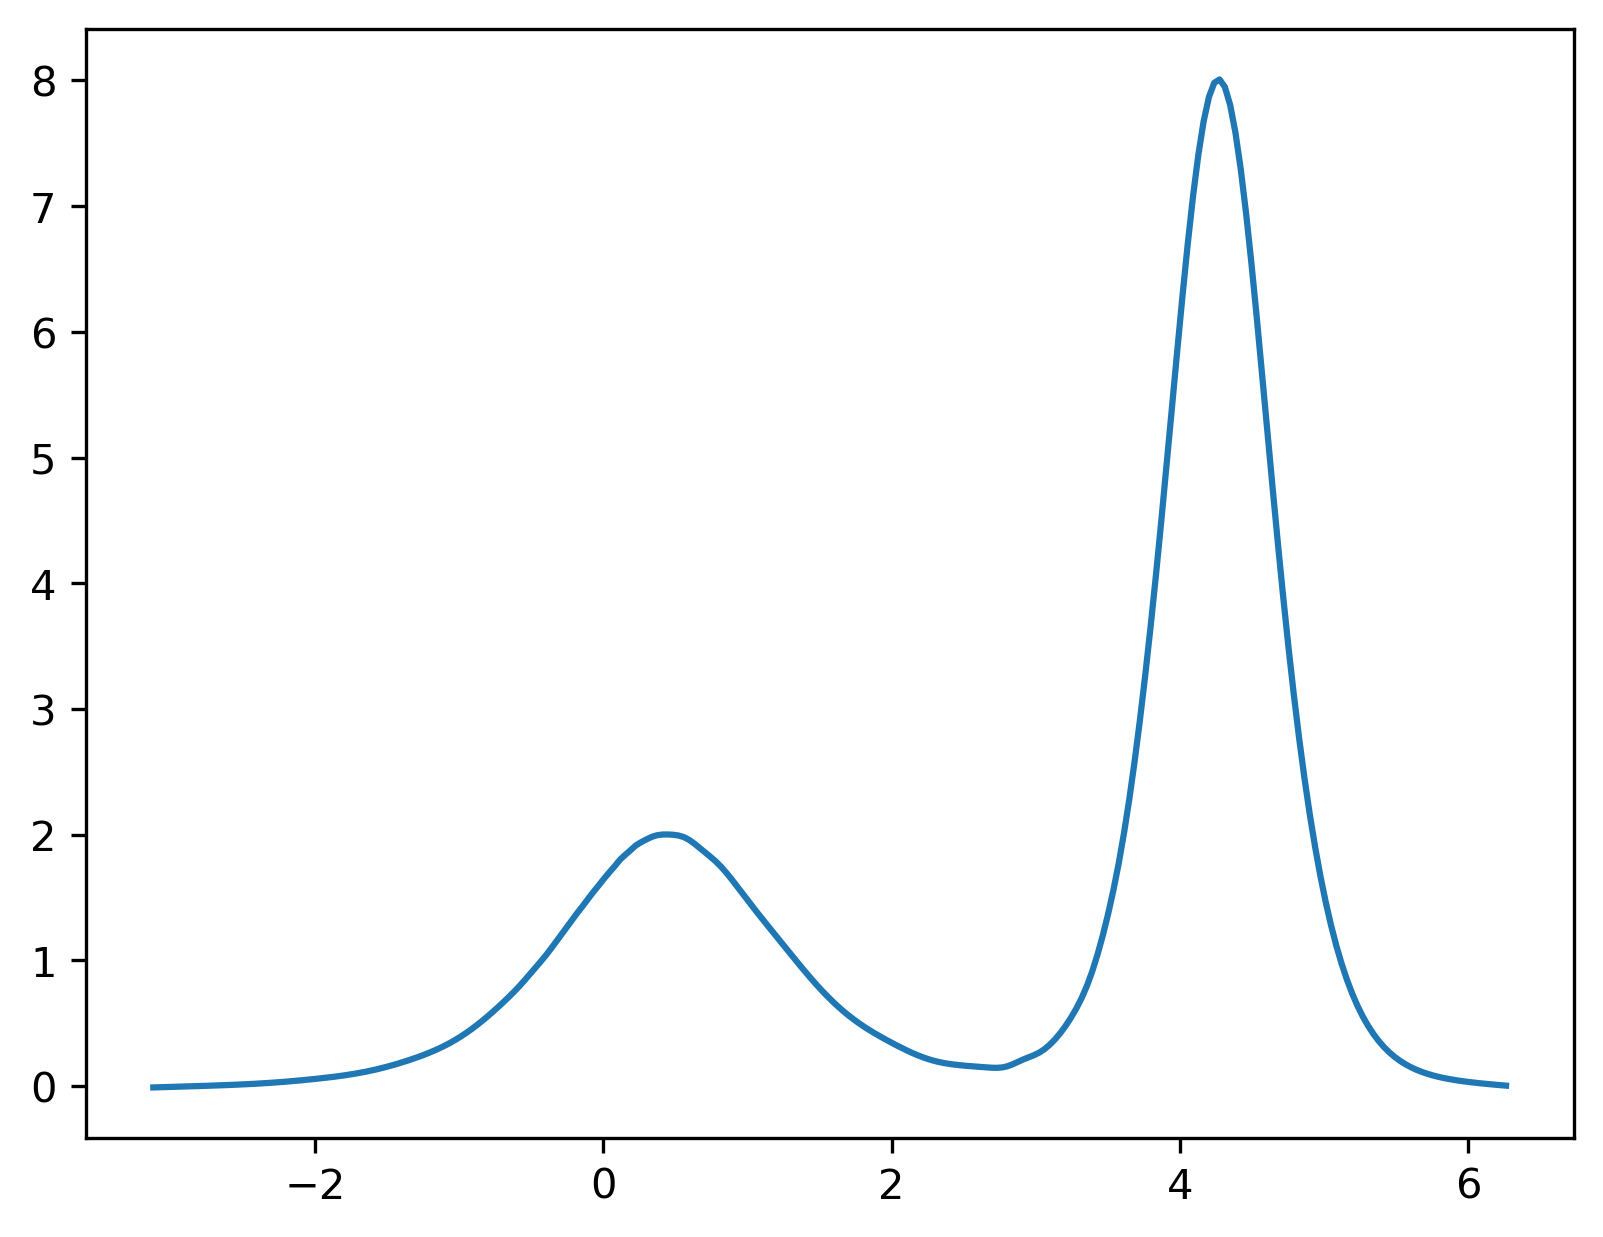

Step number: 17000, Loss: 1.6540456272196025e-05


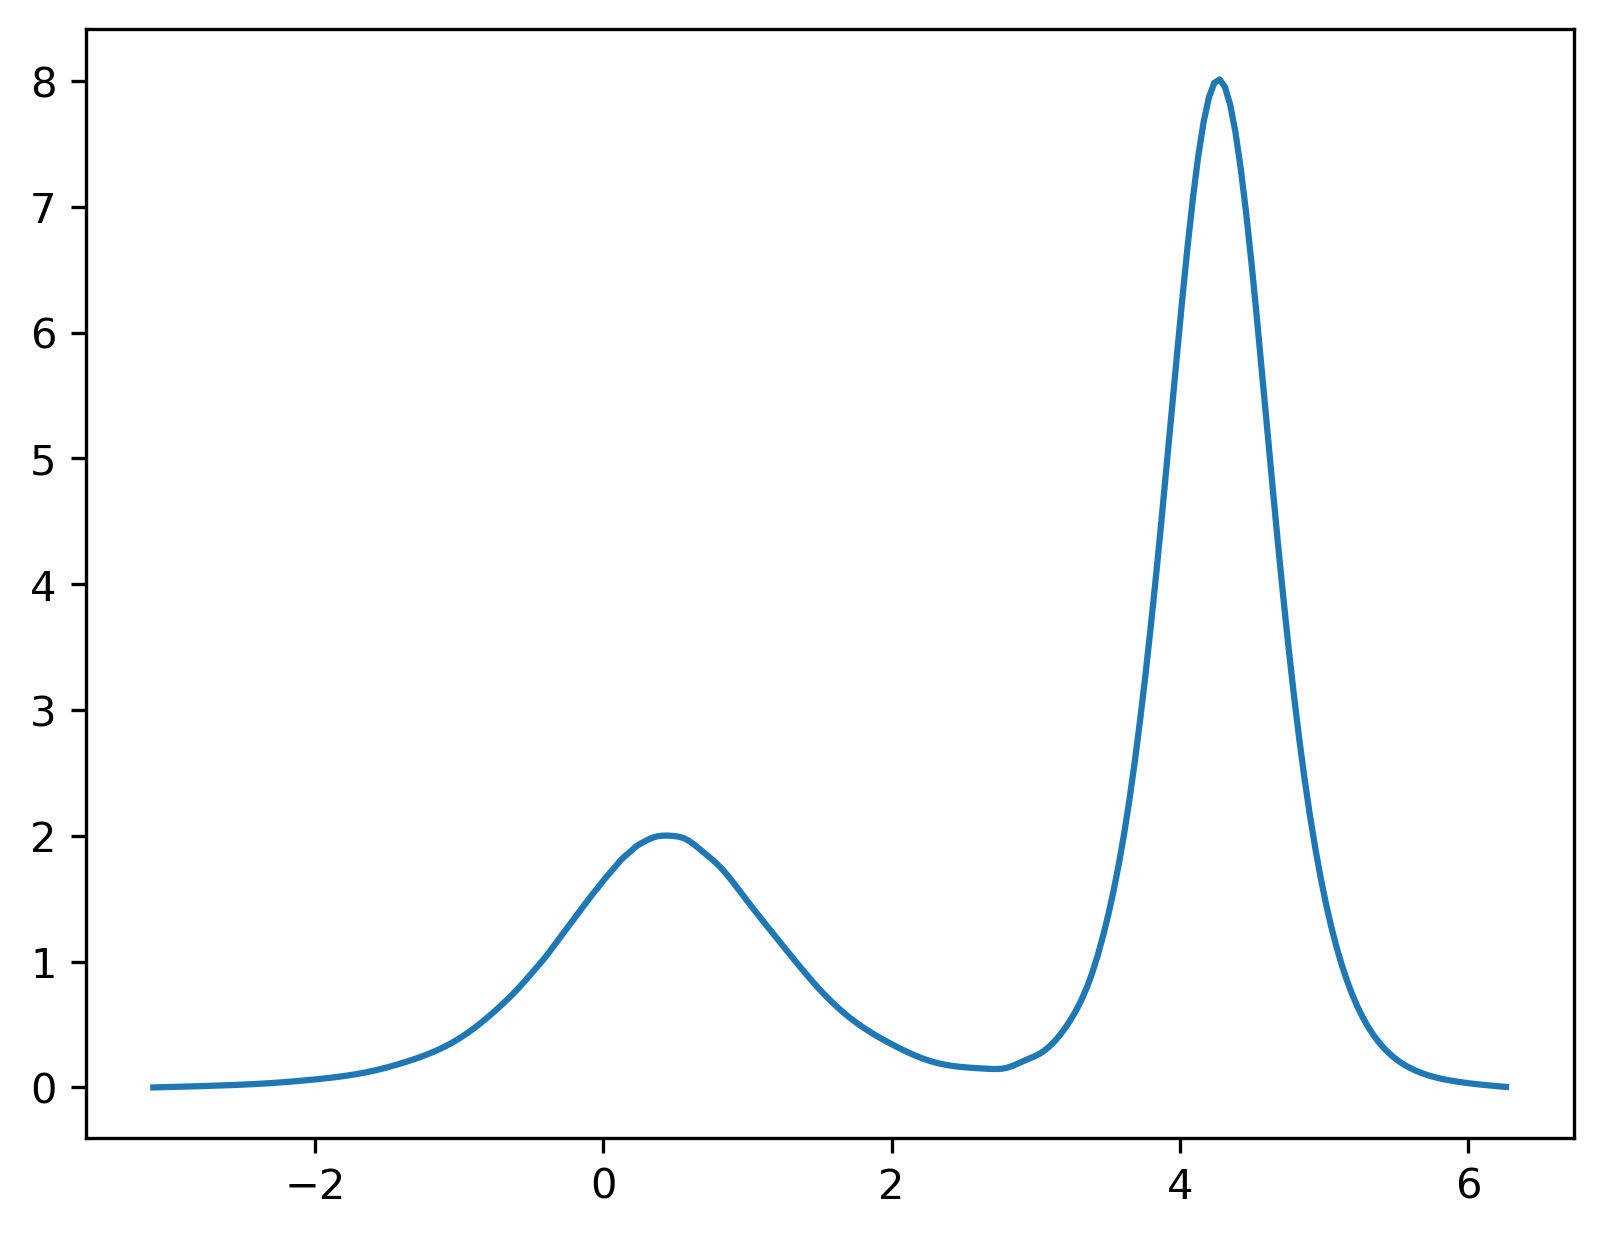

Step number: 18000, Loss: 1.3044163097220007e-05


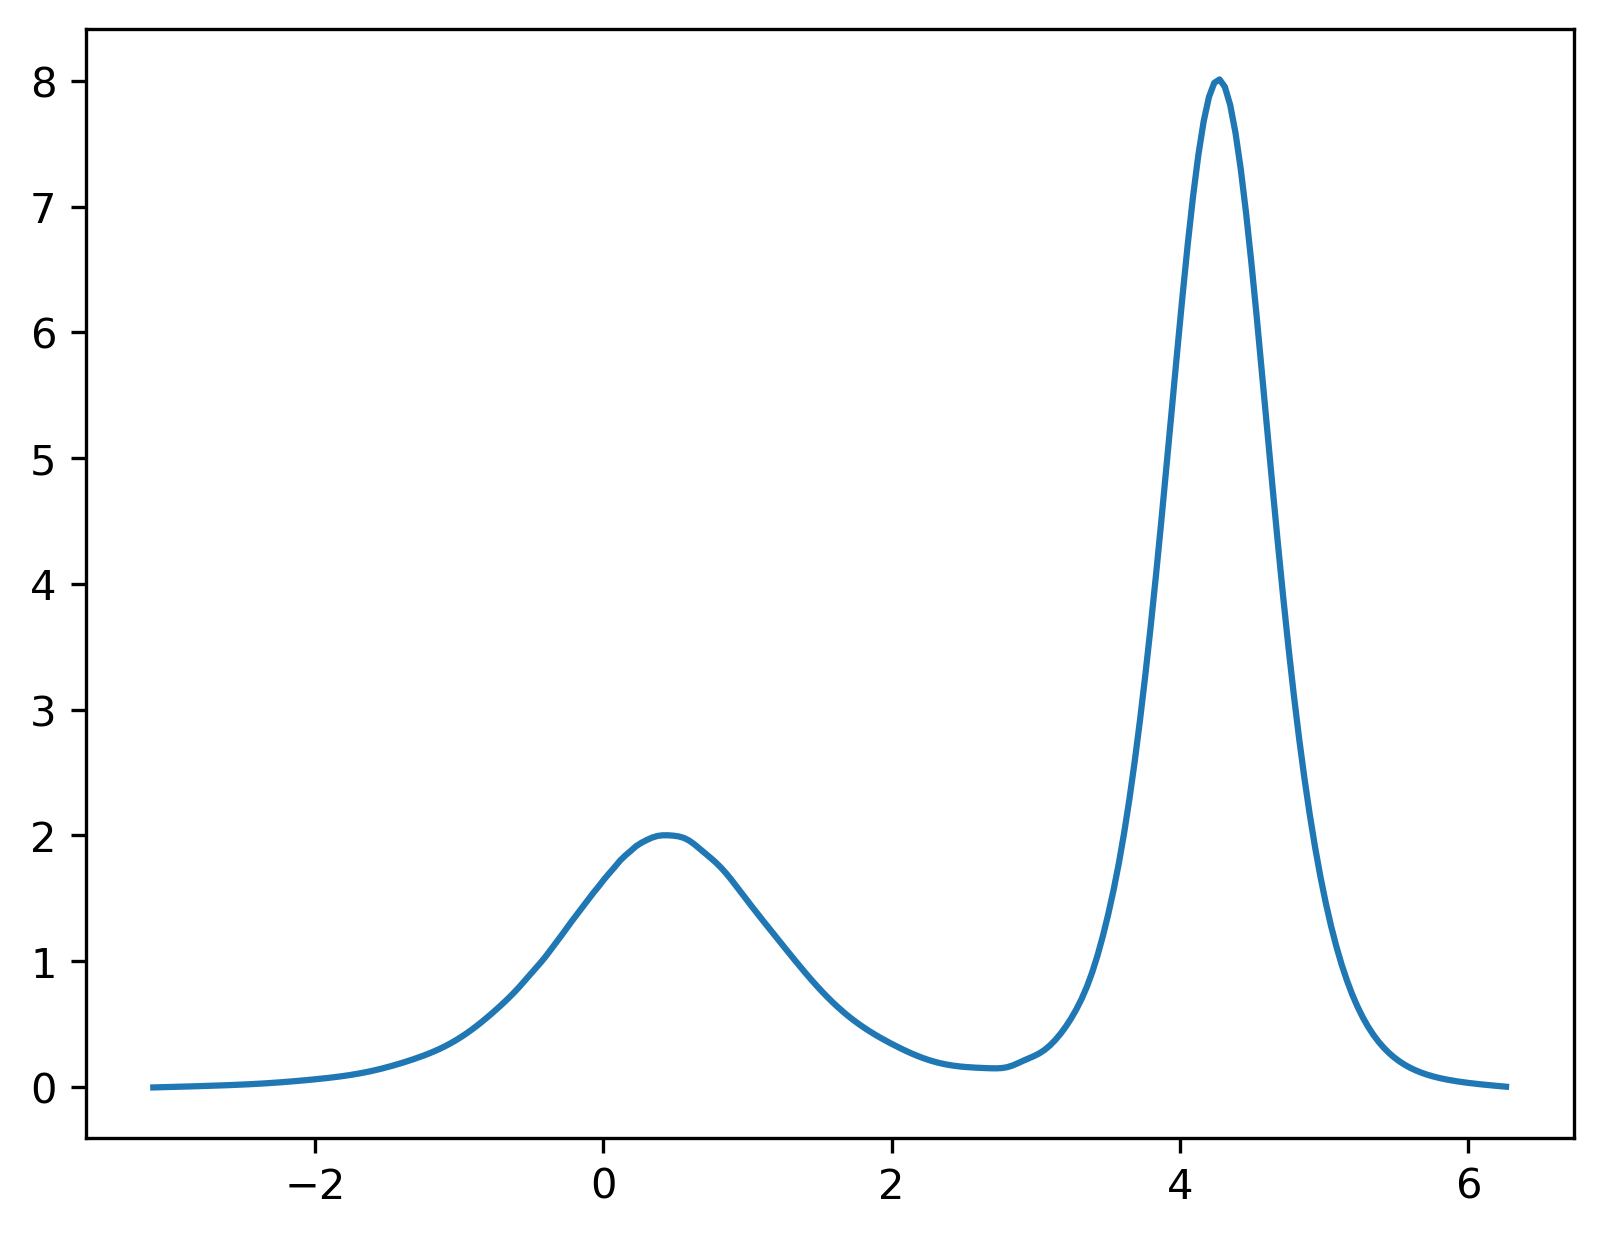

Step number: 19000, Loss: 2.426899482088629e-05


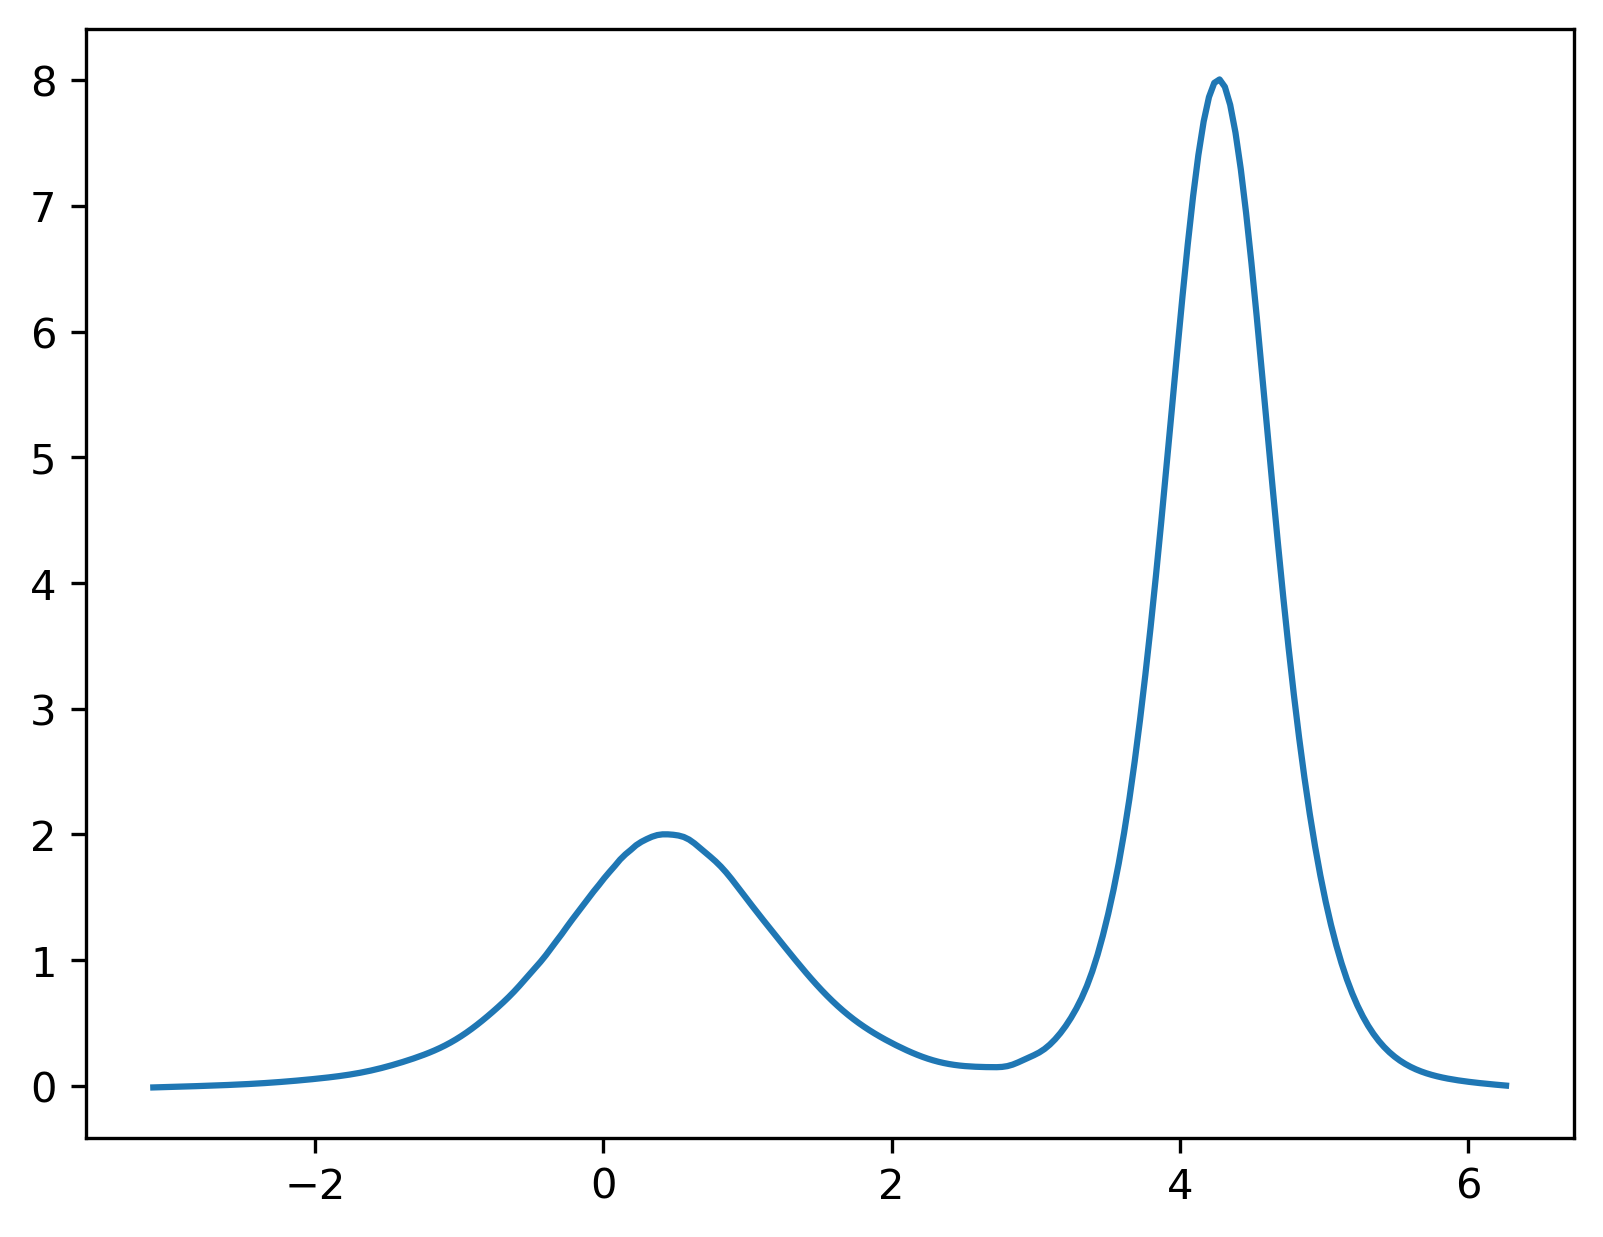

Step number: 20000, Loss: 9.830197814153507e-05


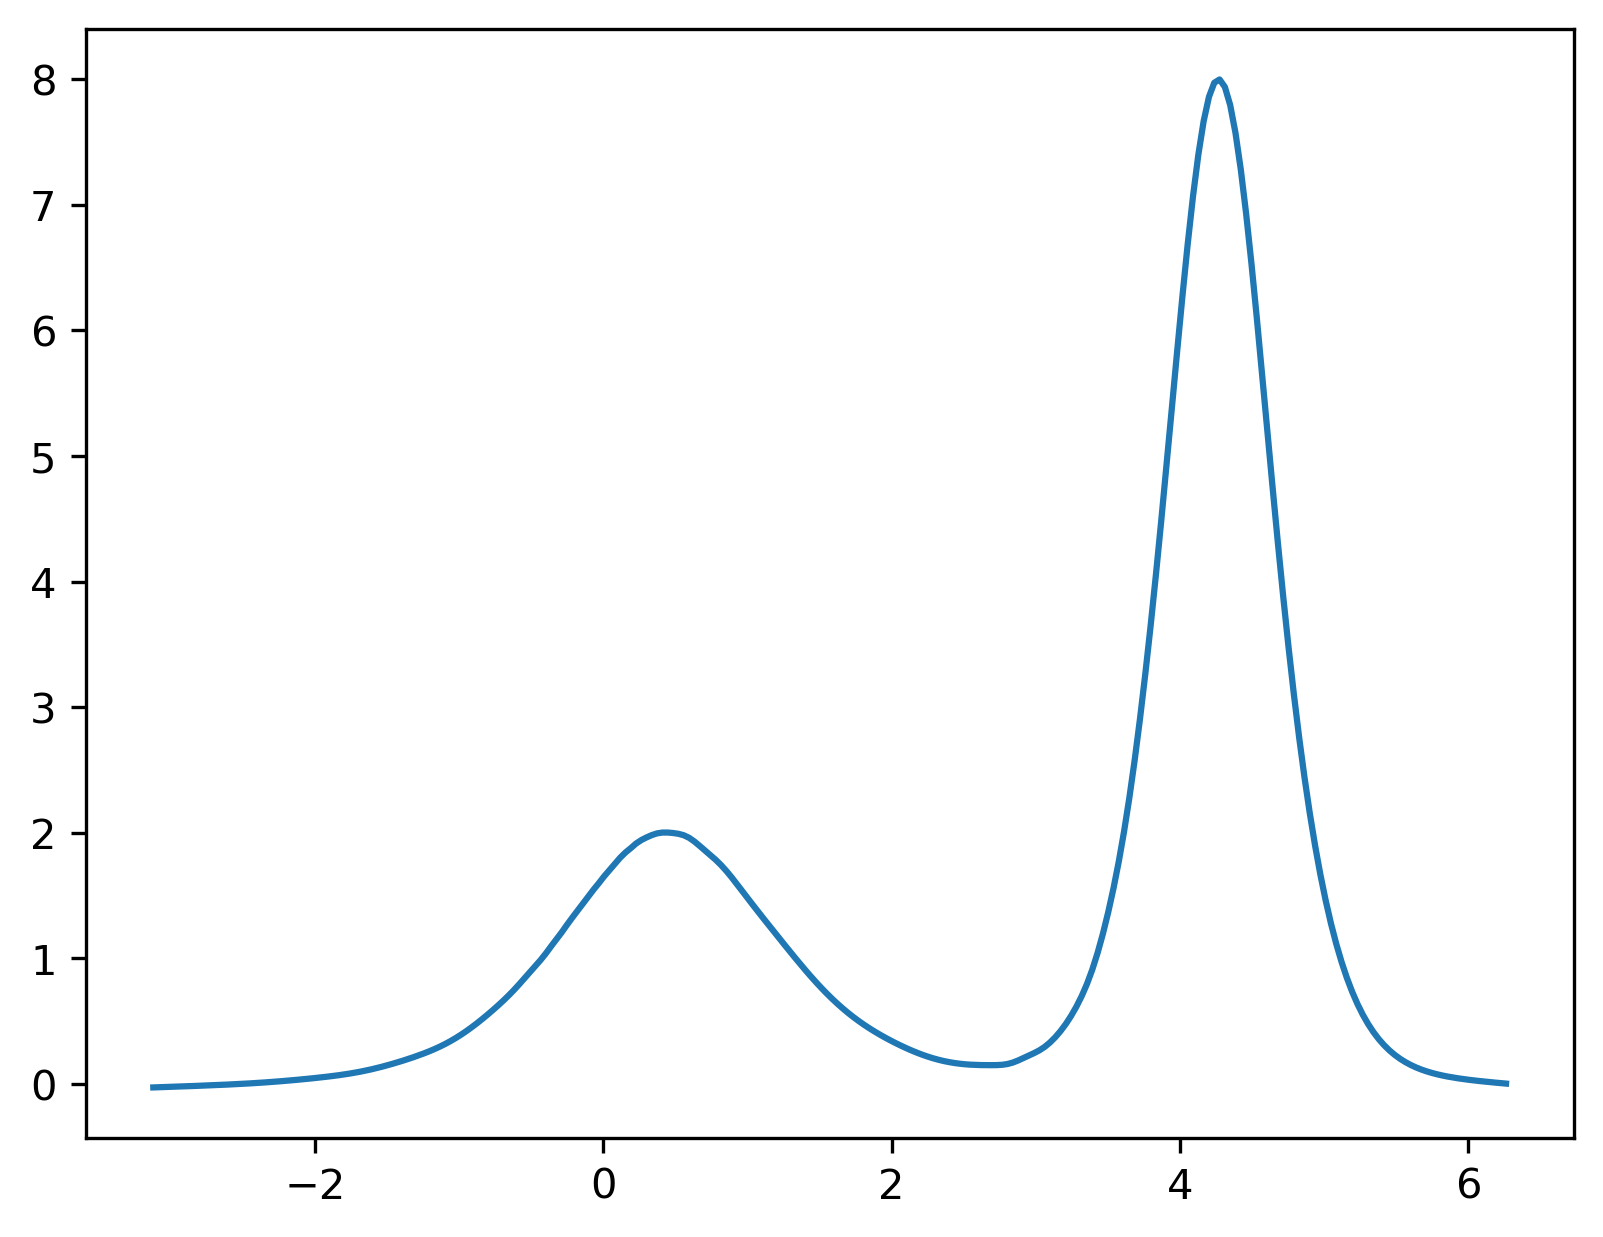

Step number: 21000, Loss: 1.9421973775024526e-05


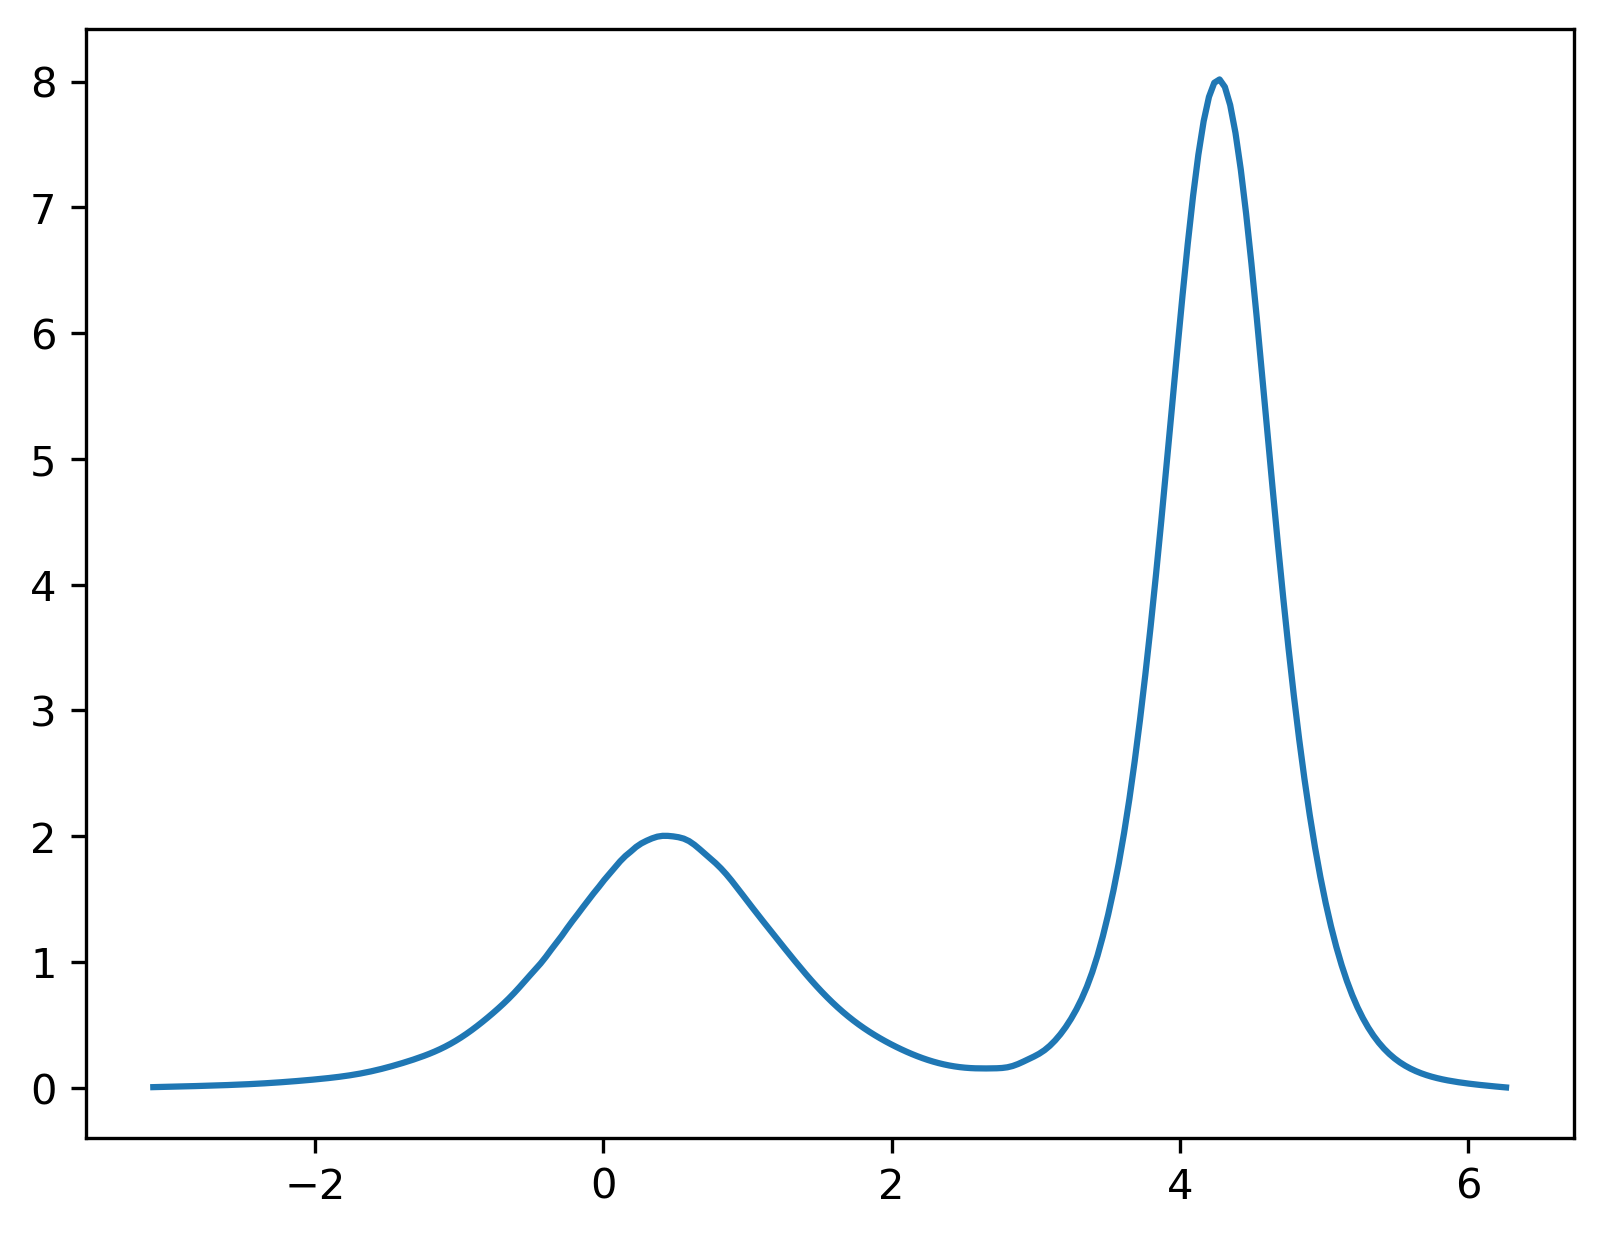

Step number: 22000, Loss: 0.00011056901712436229


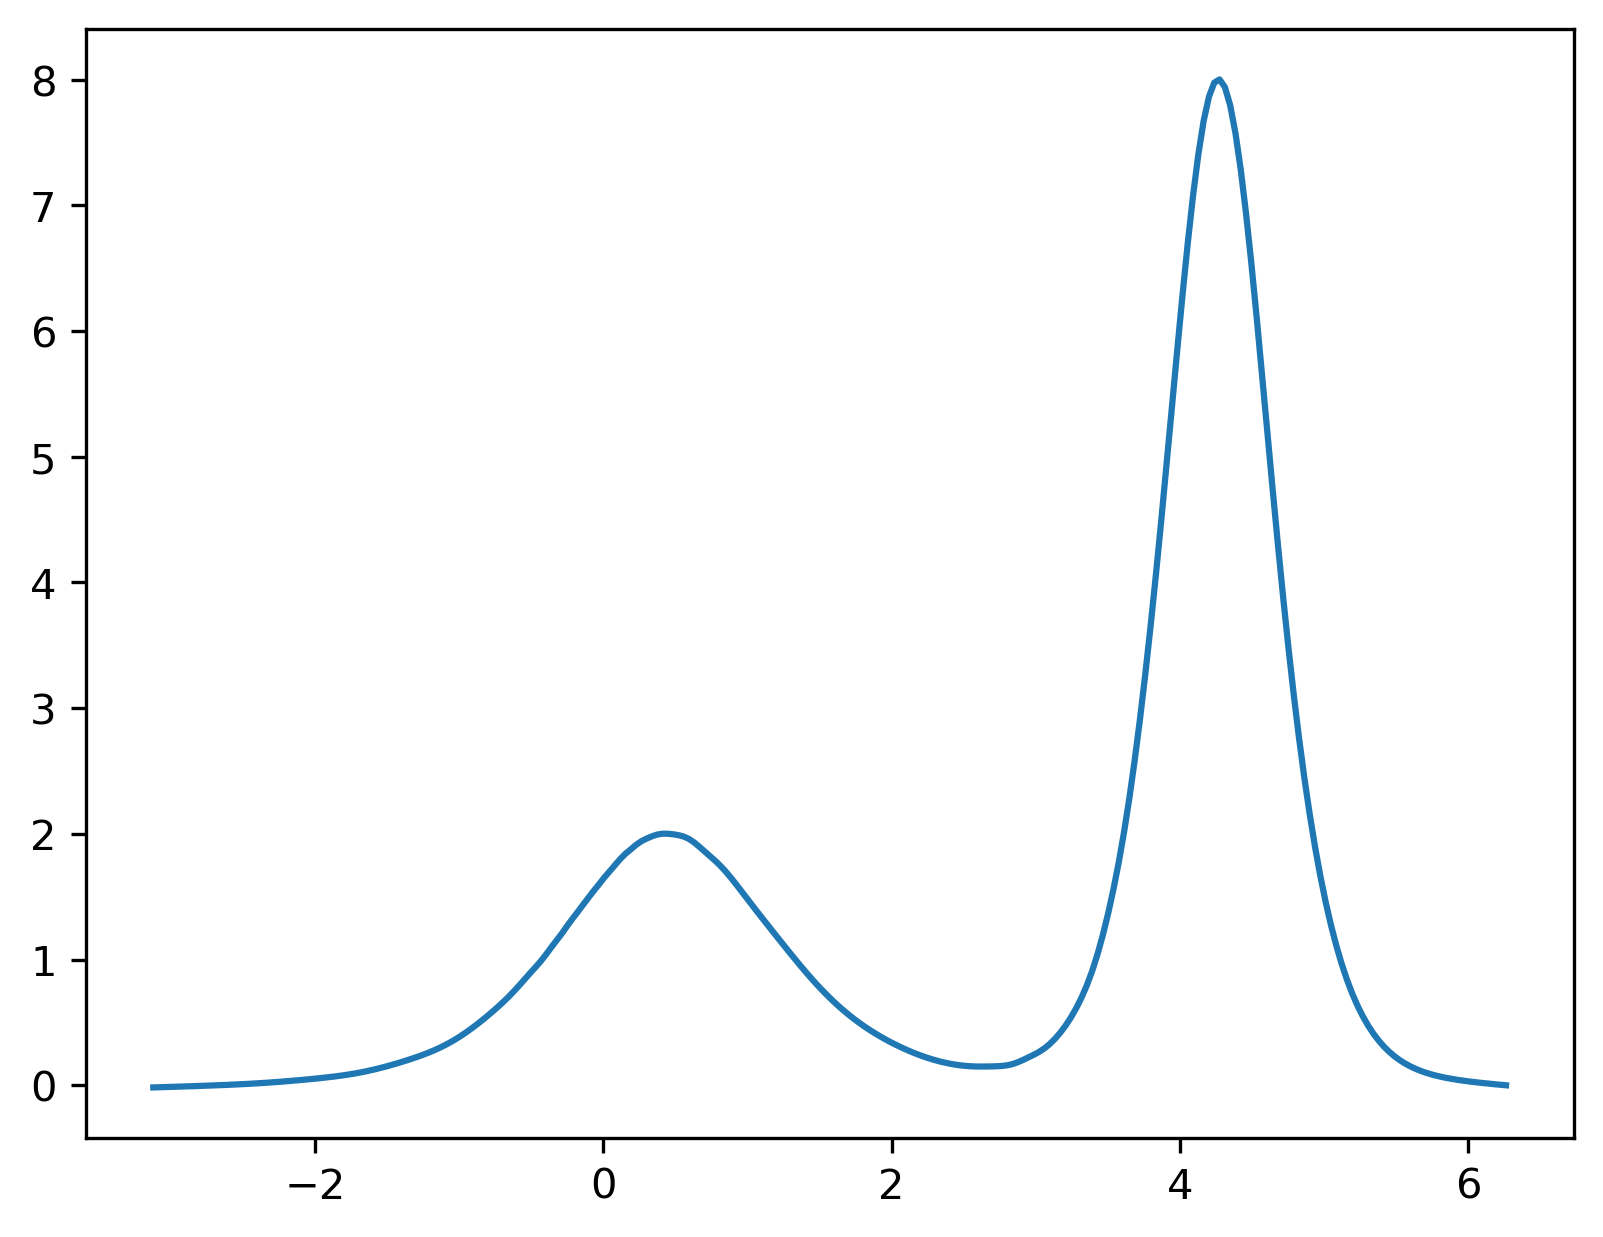

Step number: 23000, Loss: 1.584824531164486e-05


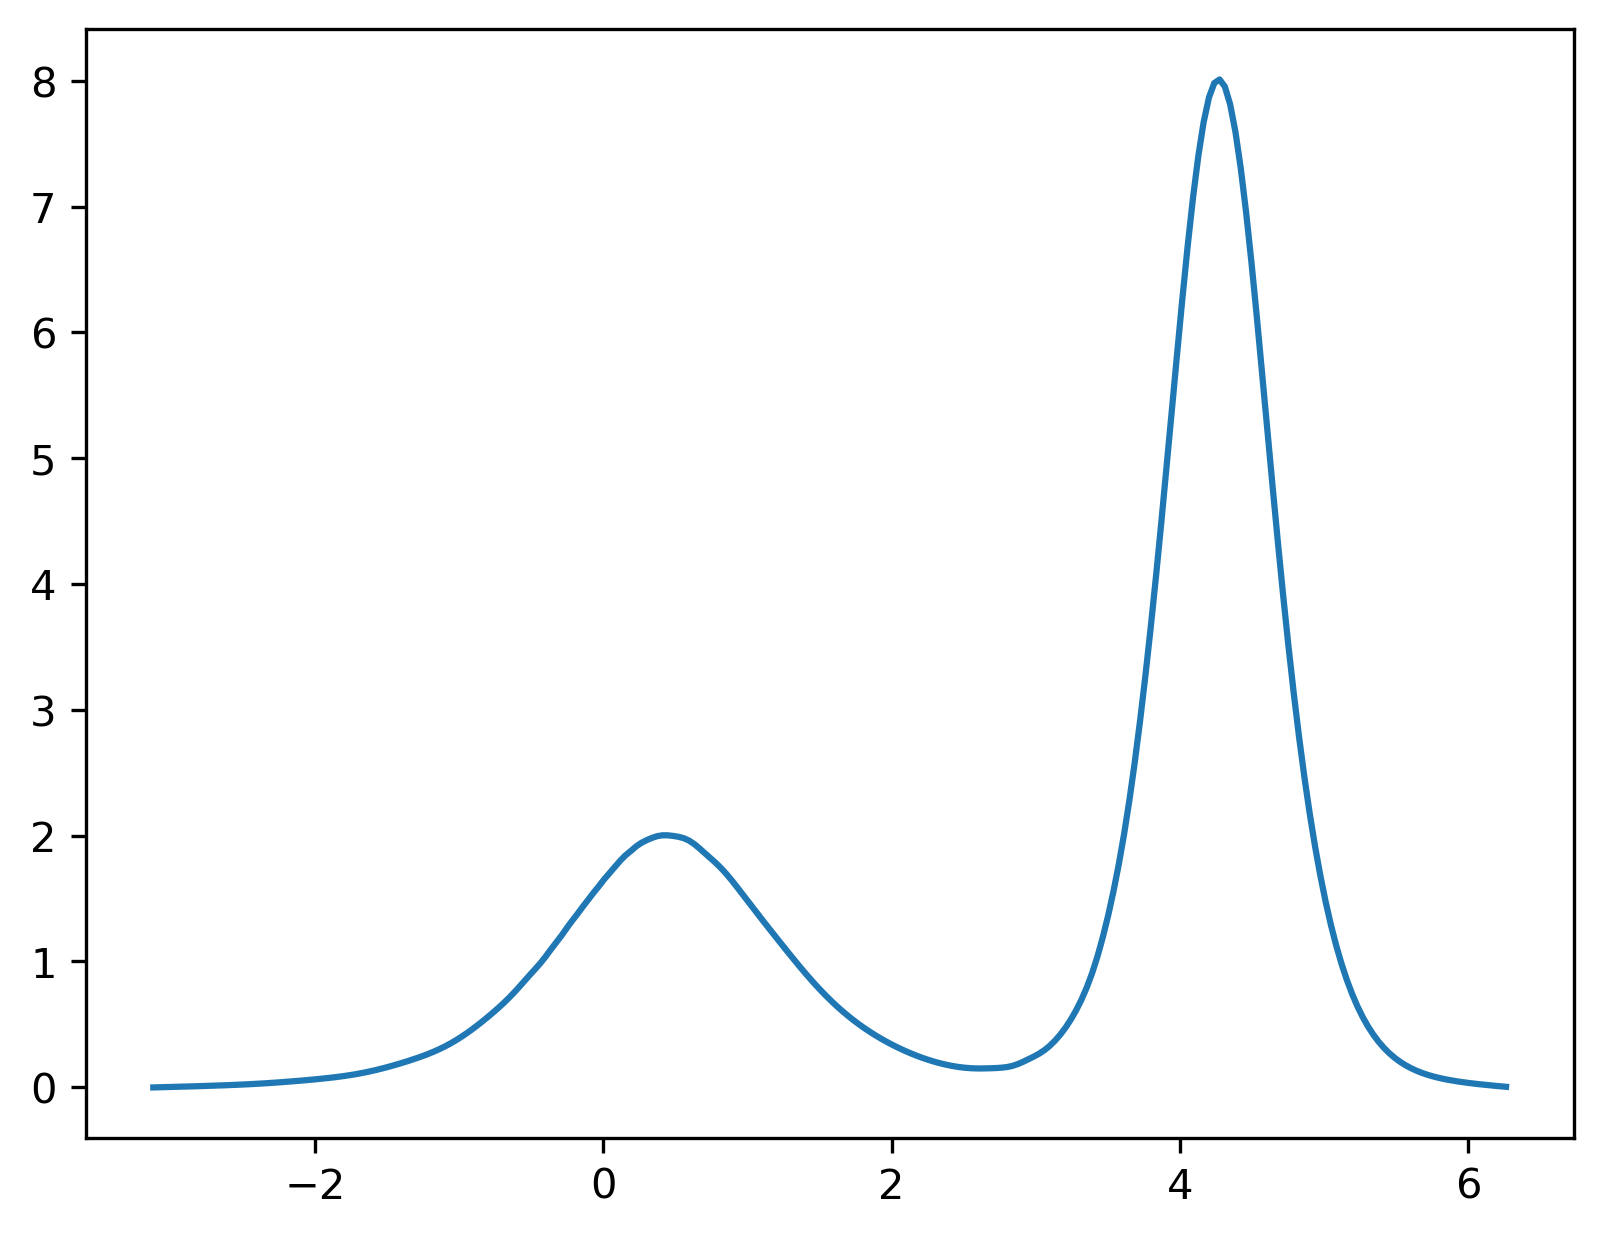

Step number: 24000, Loss: 4.0093131246976554e-05


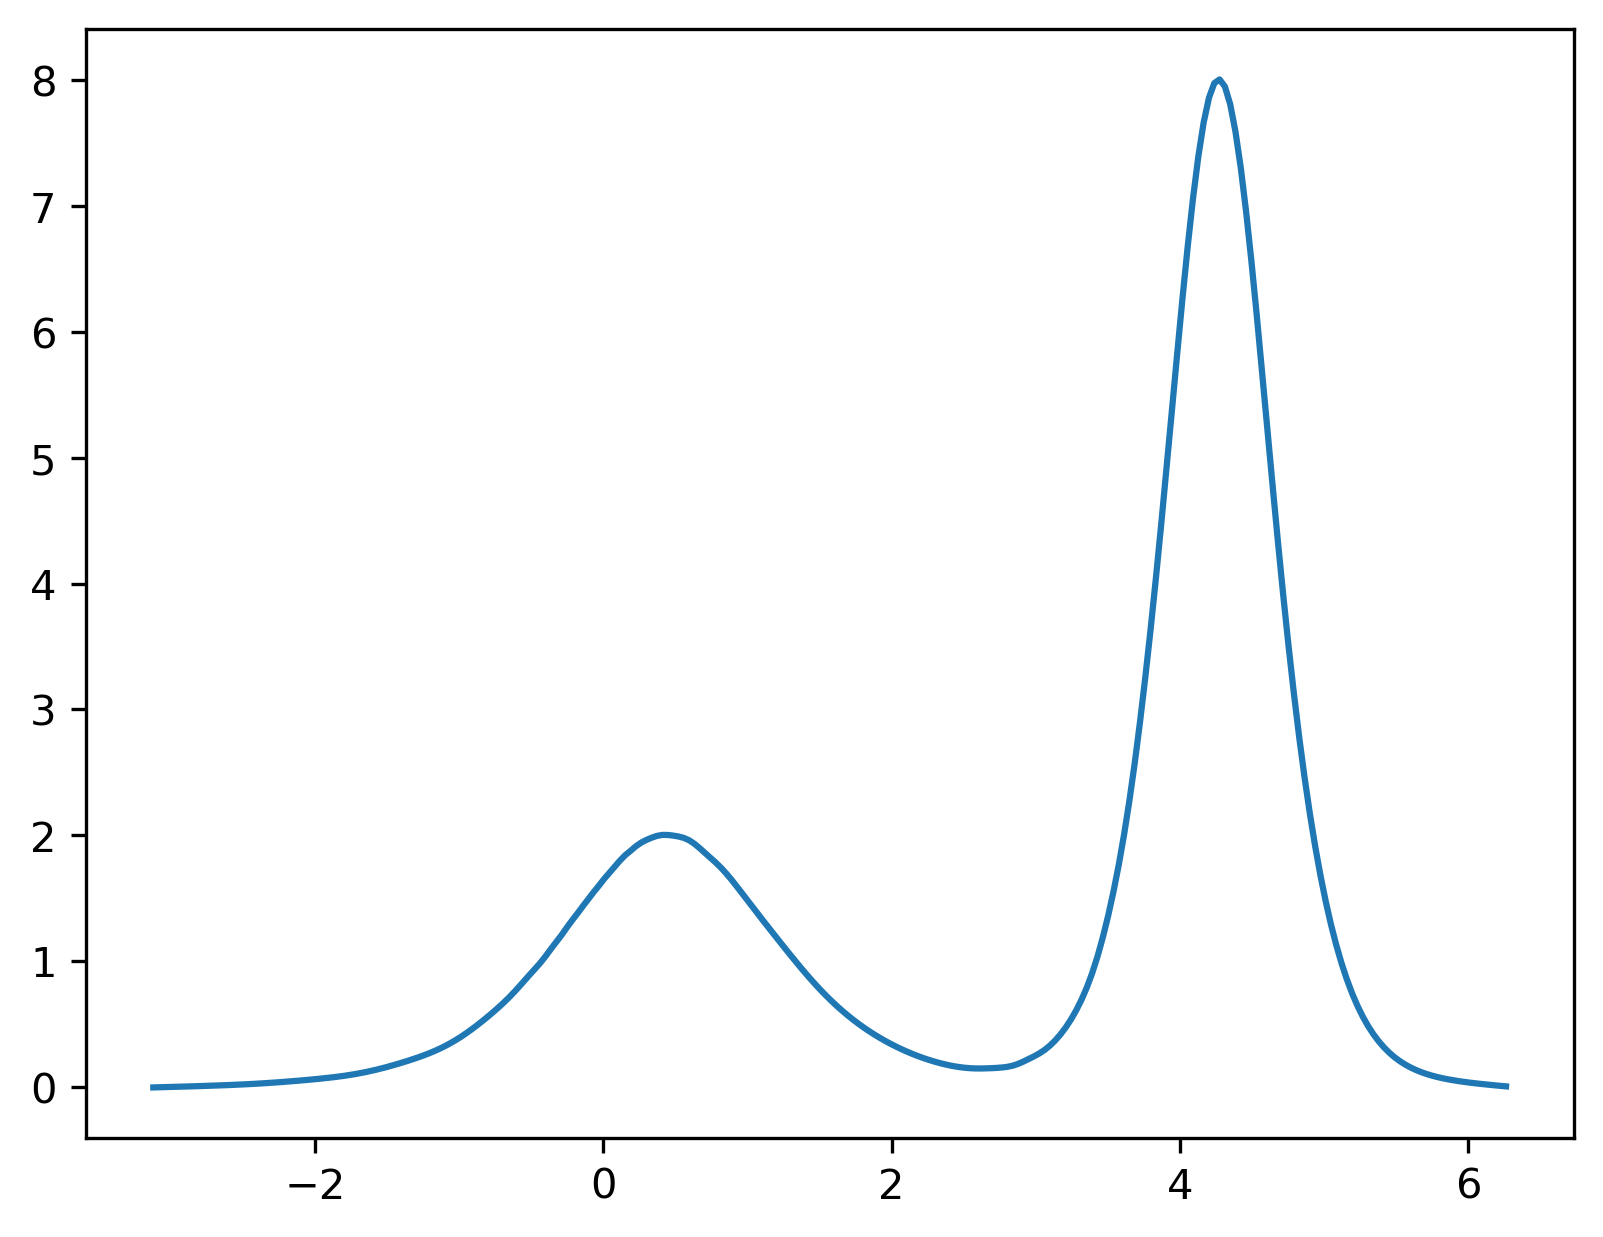

Step number: 25000, Loss: 1.205678654514486e-05


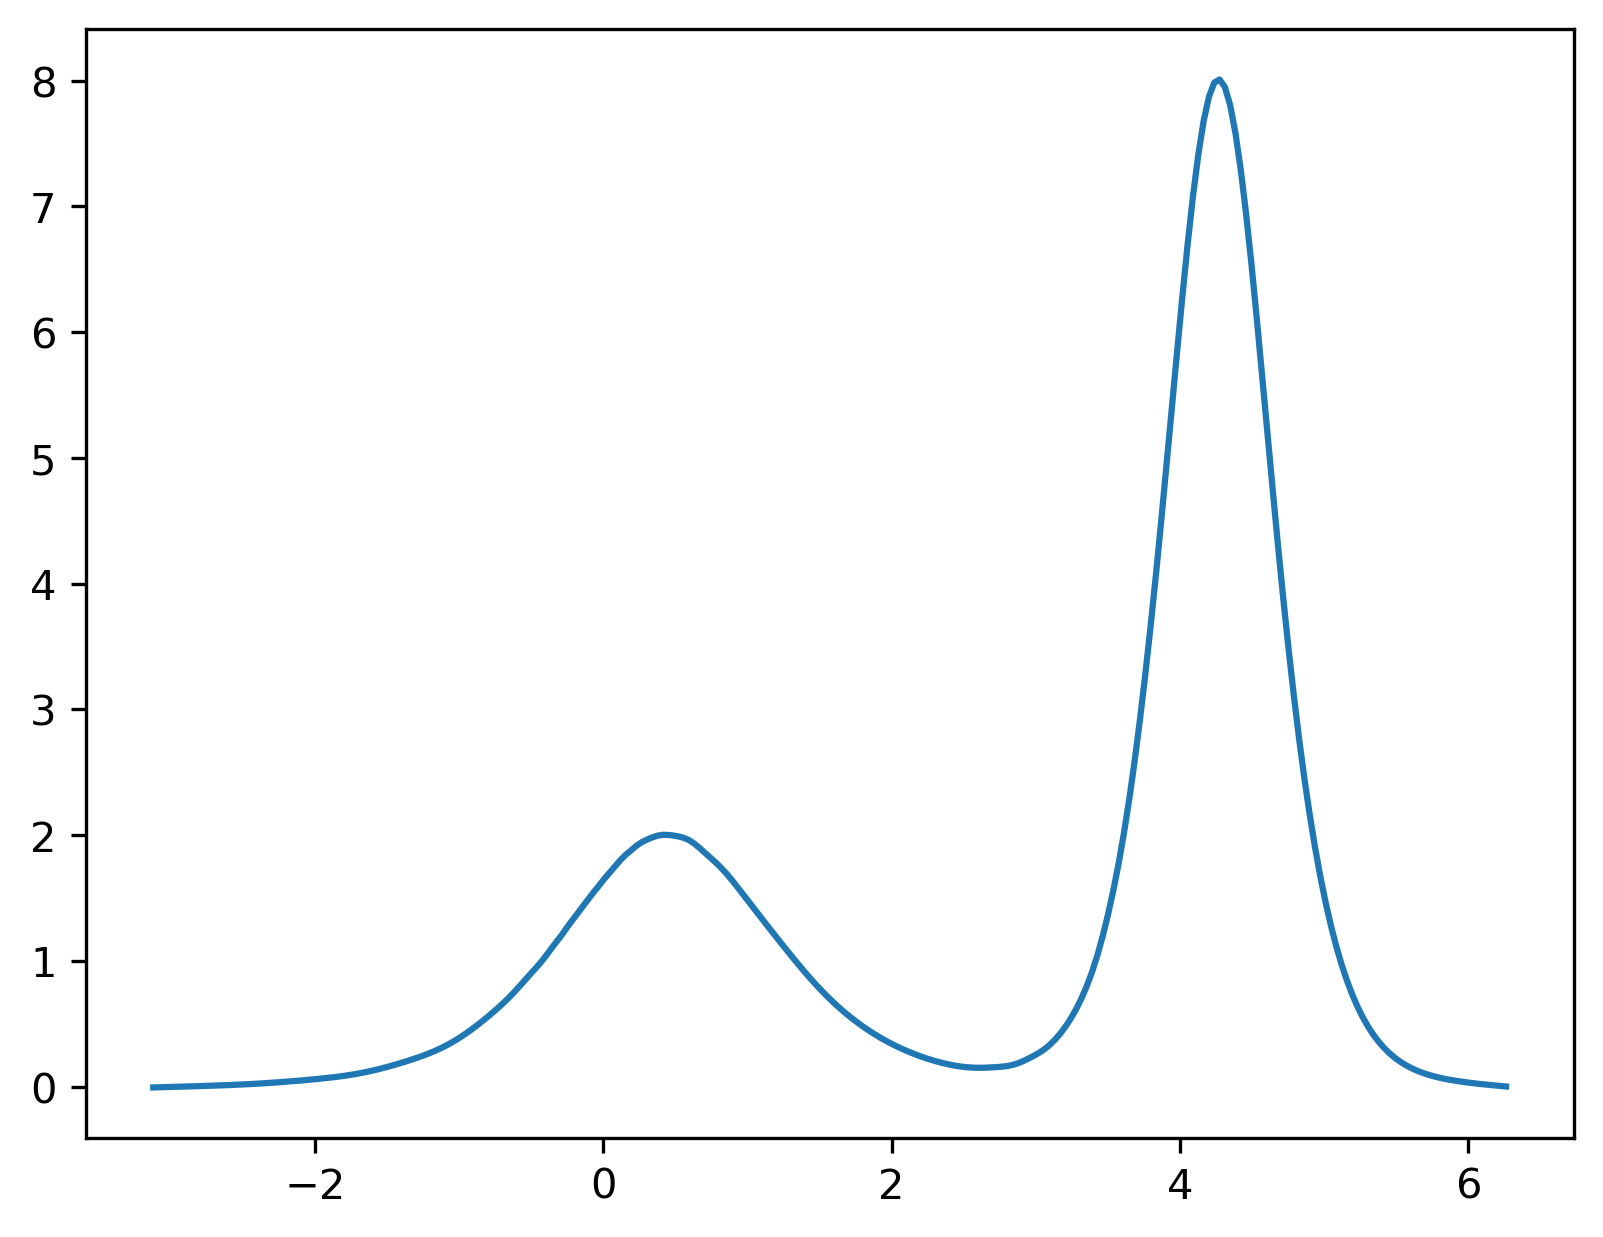

Step number: 26000, Loss: 9.698477515485138e-05


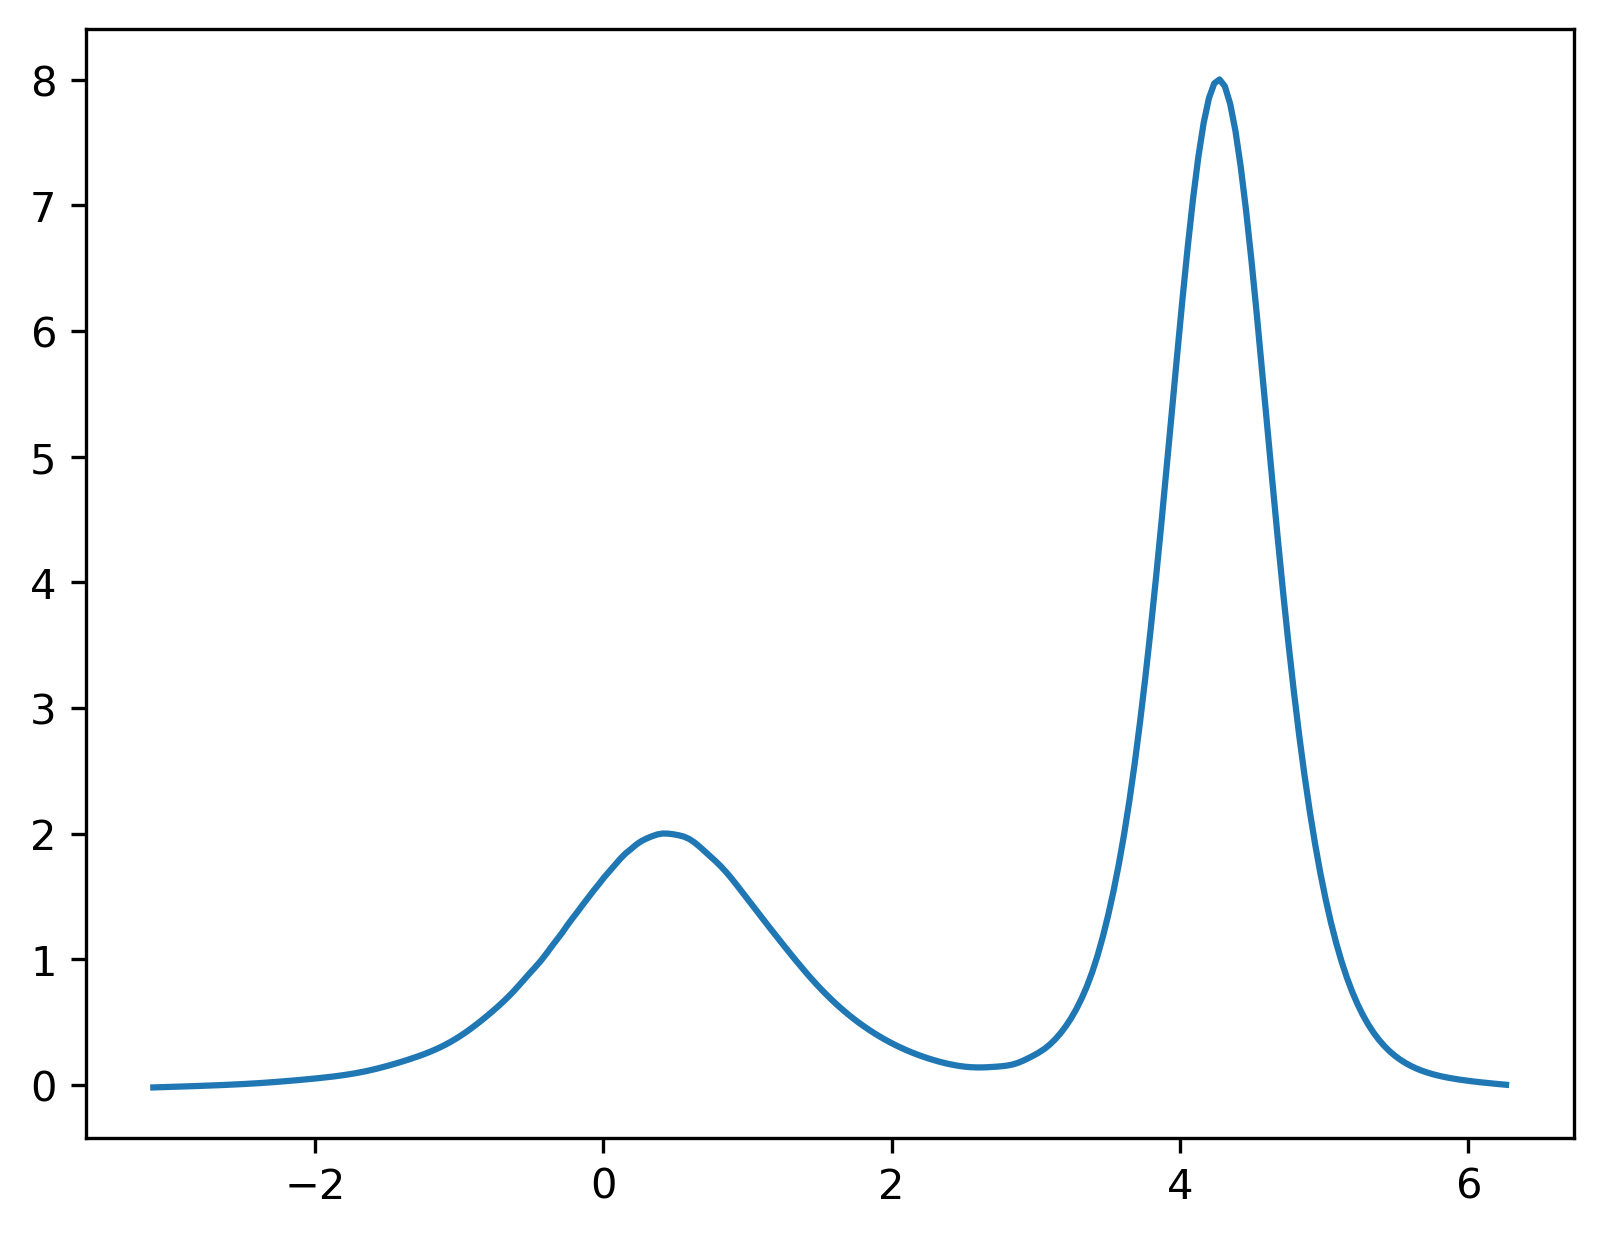

Step number: 27000, Loss: 1.6337100532837212e-05


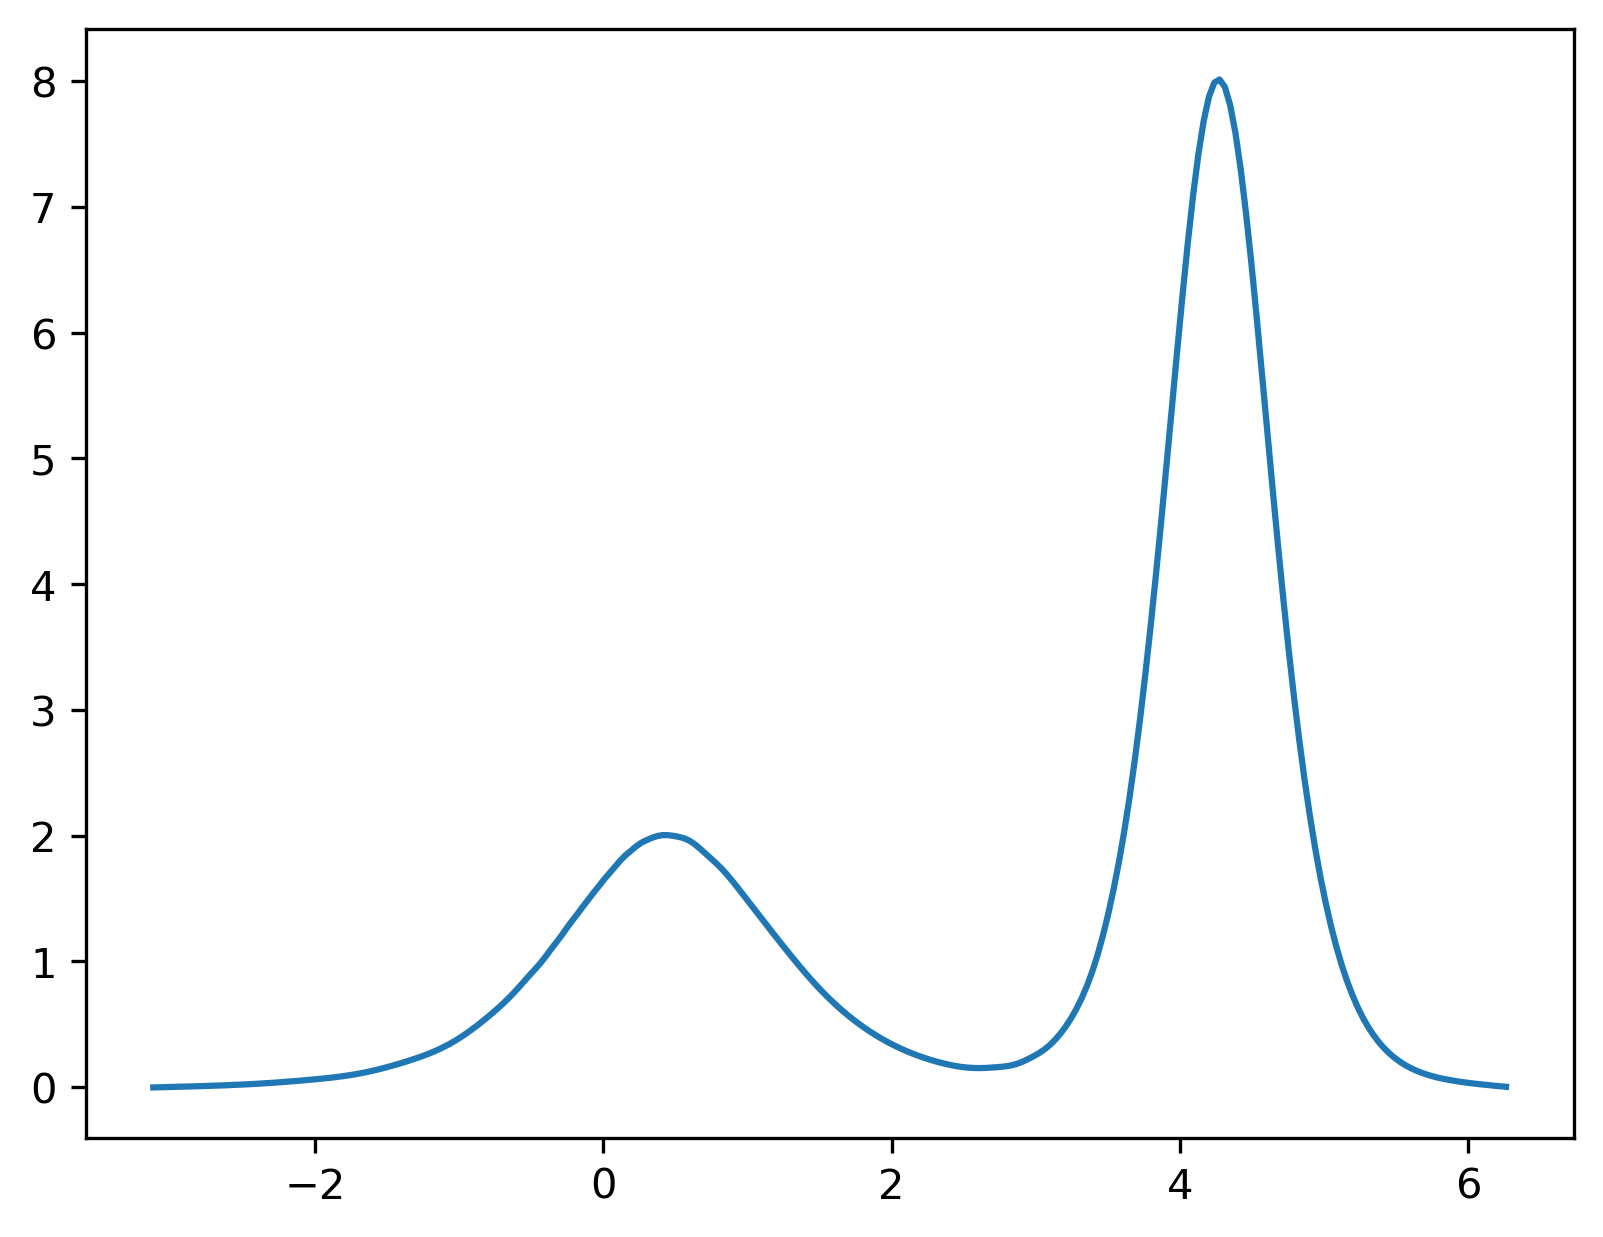

Step number: 28000, Loss: 6.8613244366133586e-06


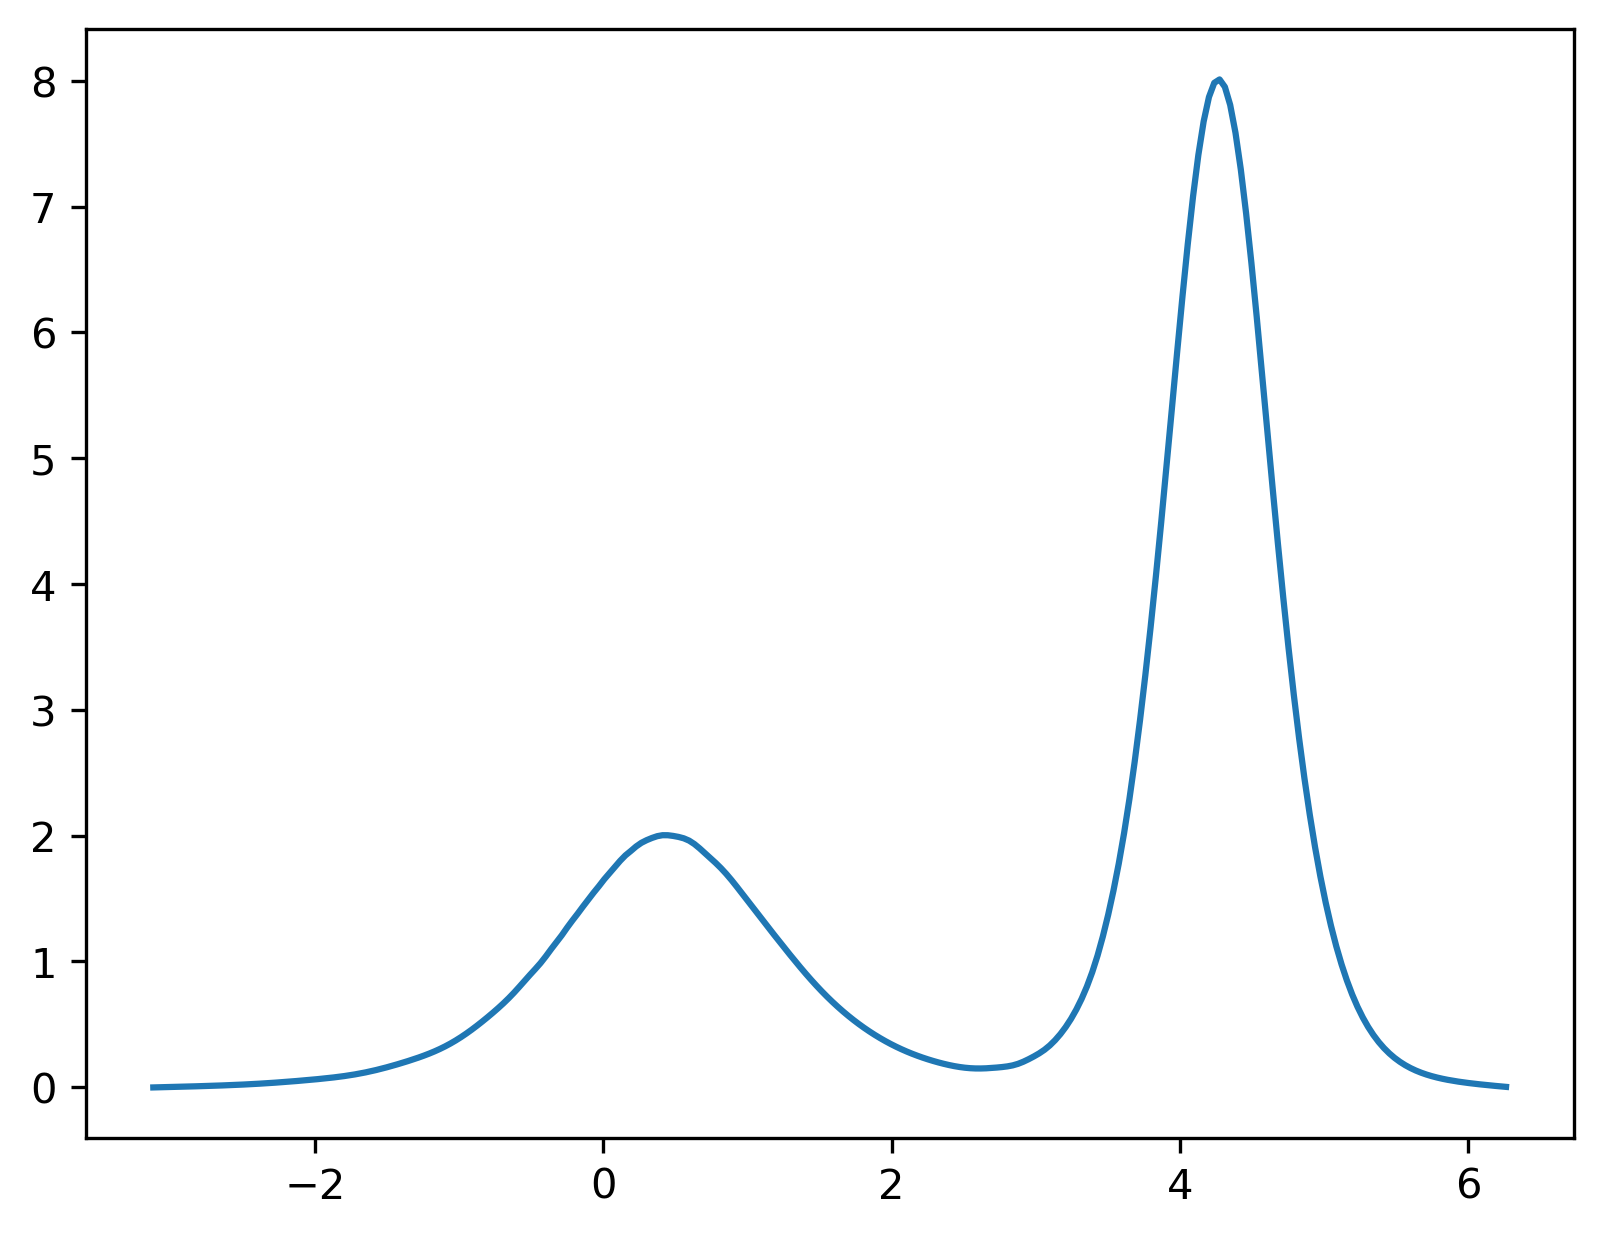

Step number: 29000, Loss: 7.021877081569983e-06


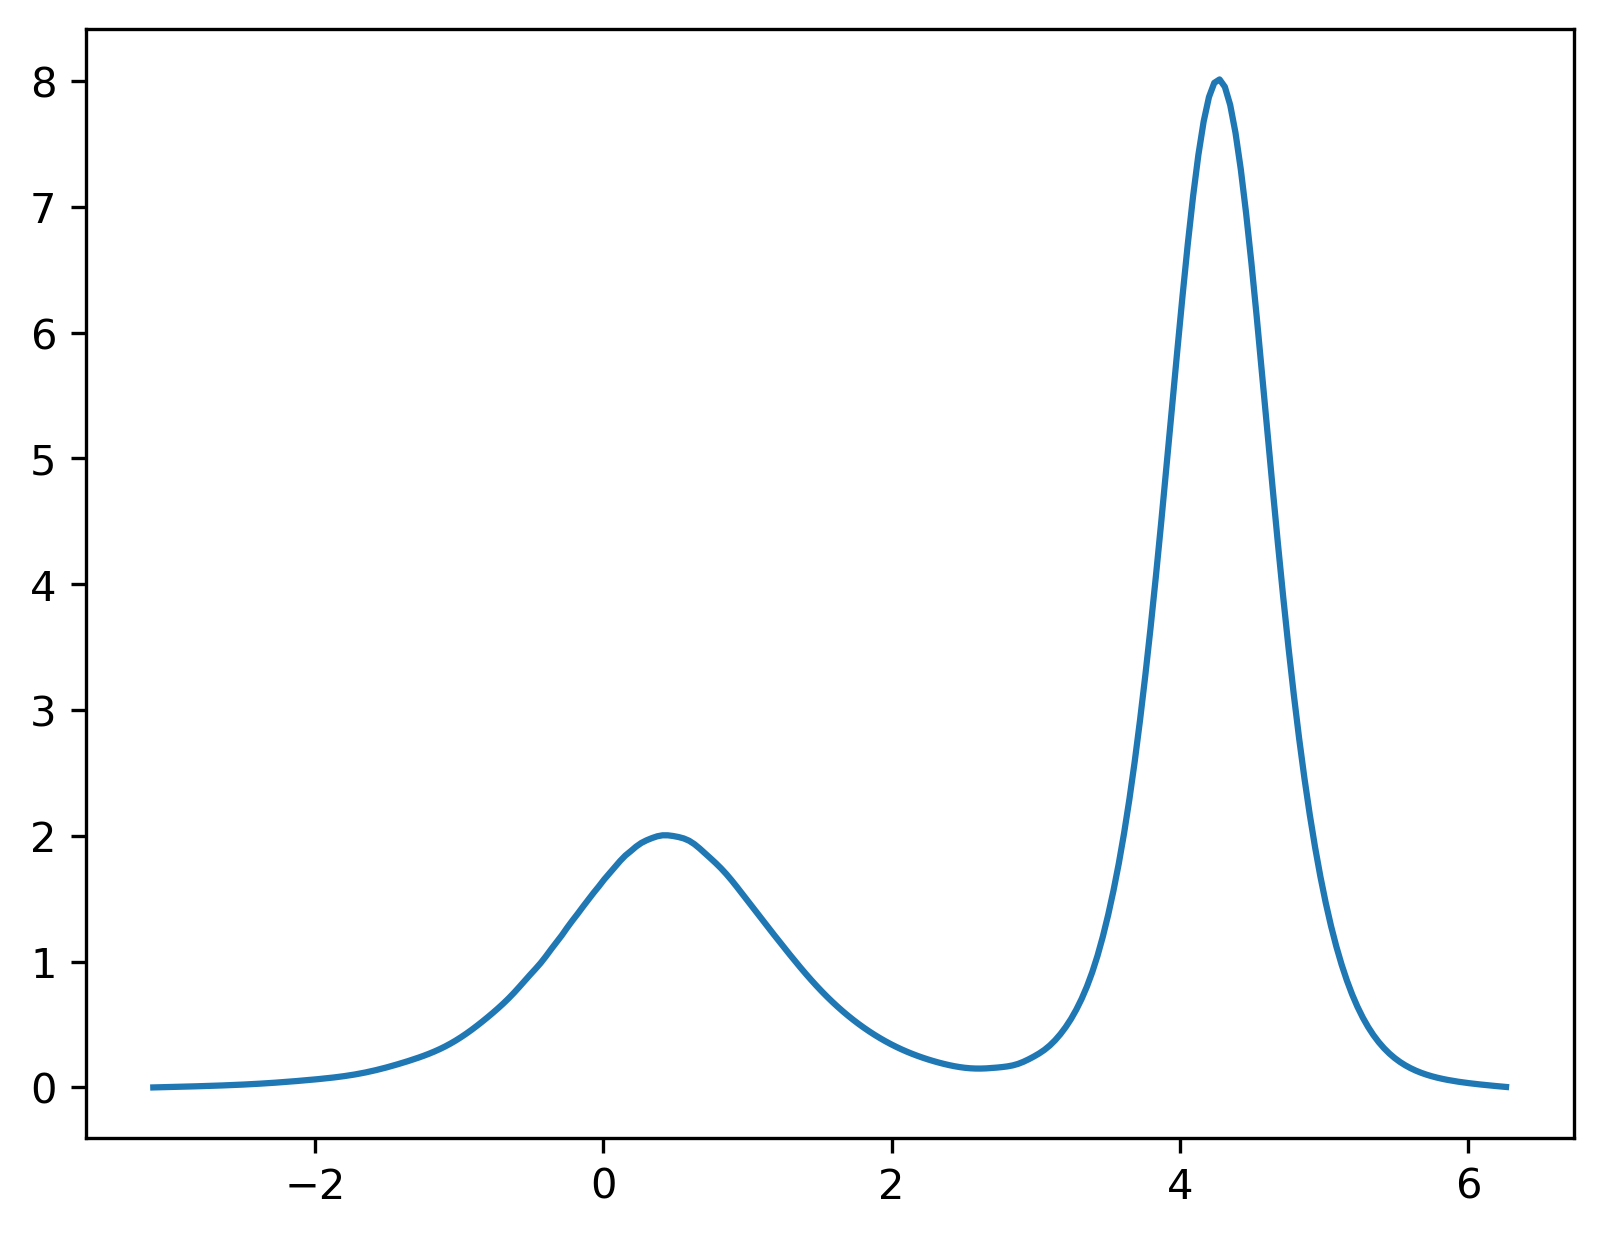

Step number: 30000, Loss: 8.237142537836917e-06


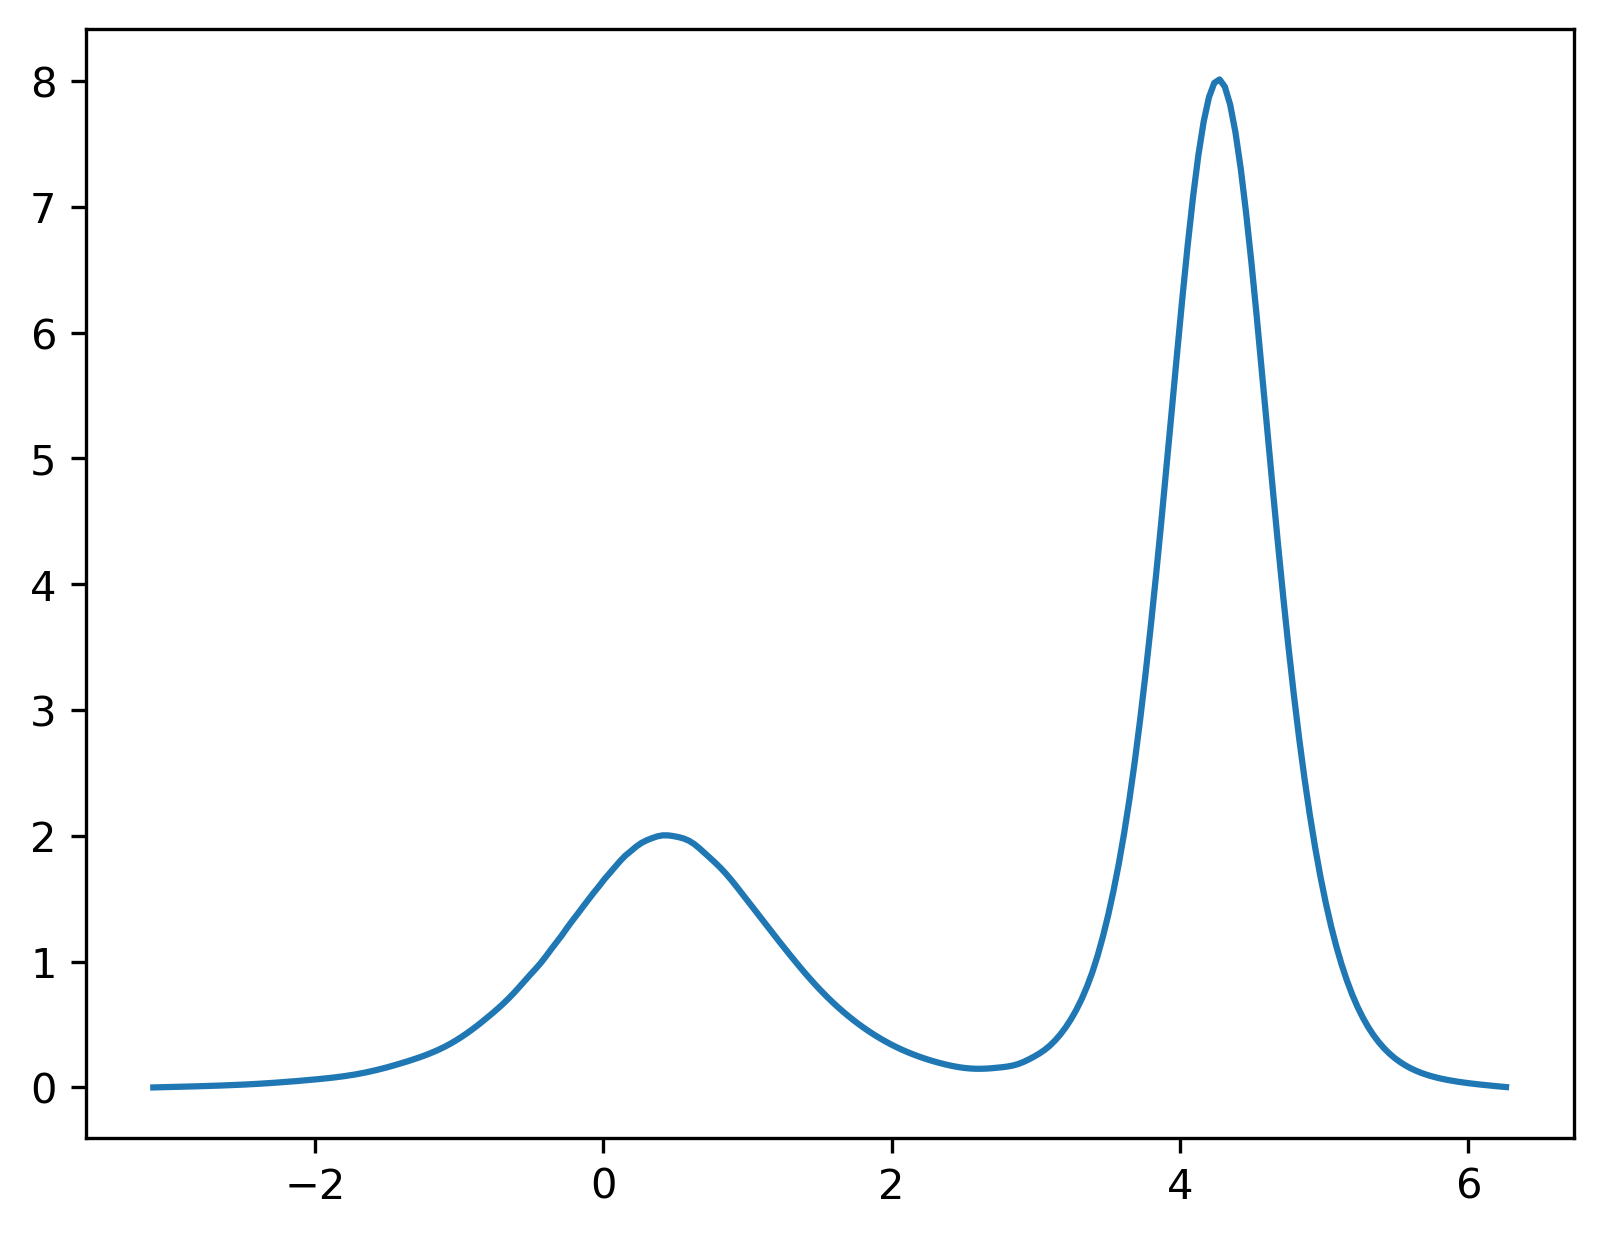

Step number: 31000, Loss: 8.28664815344382e-06


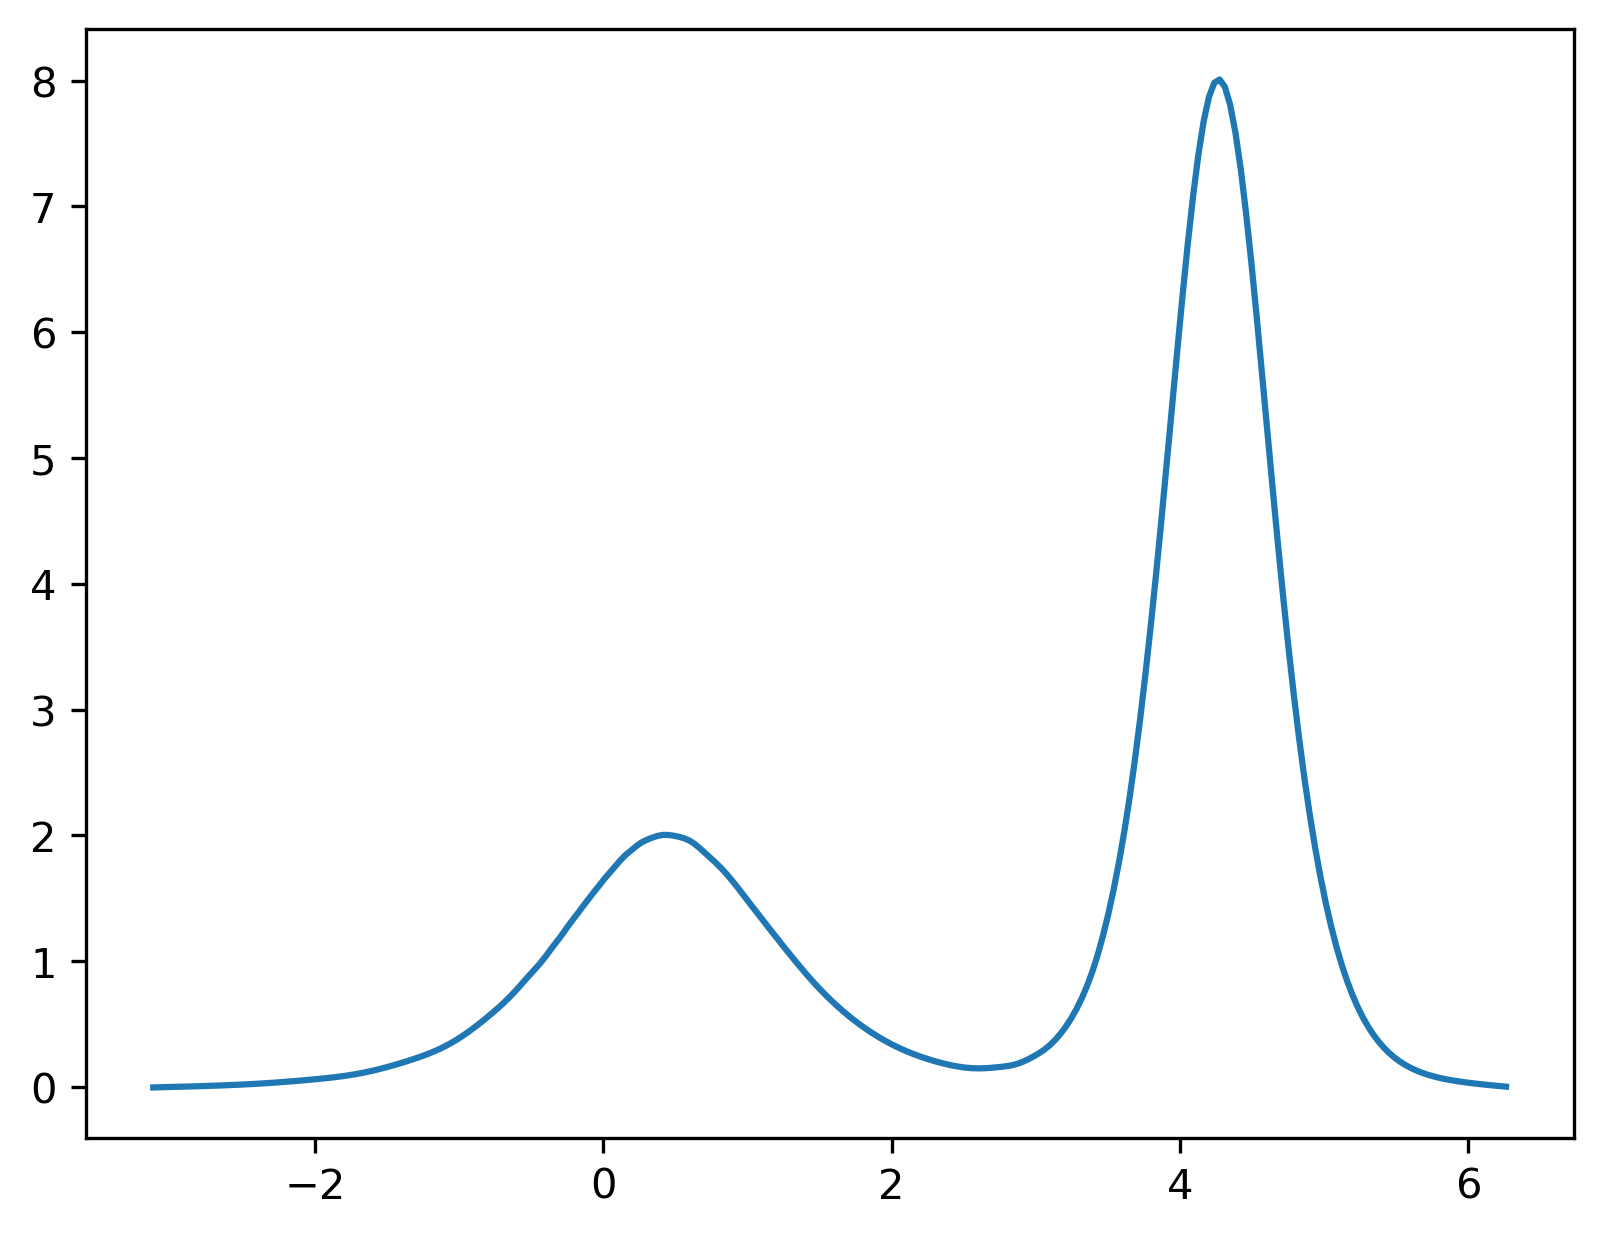

Step number: 32000, Loss: 0.00012040413275826722


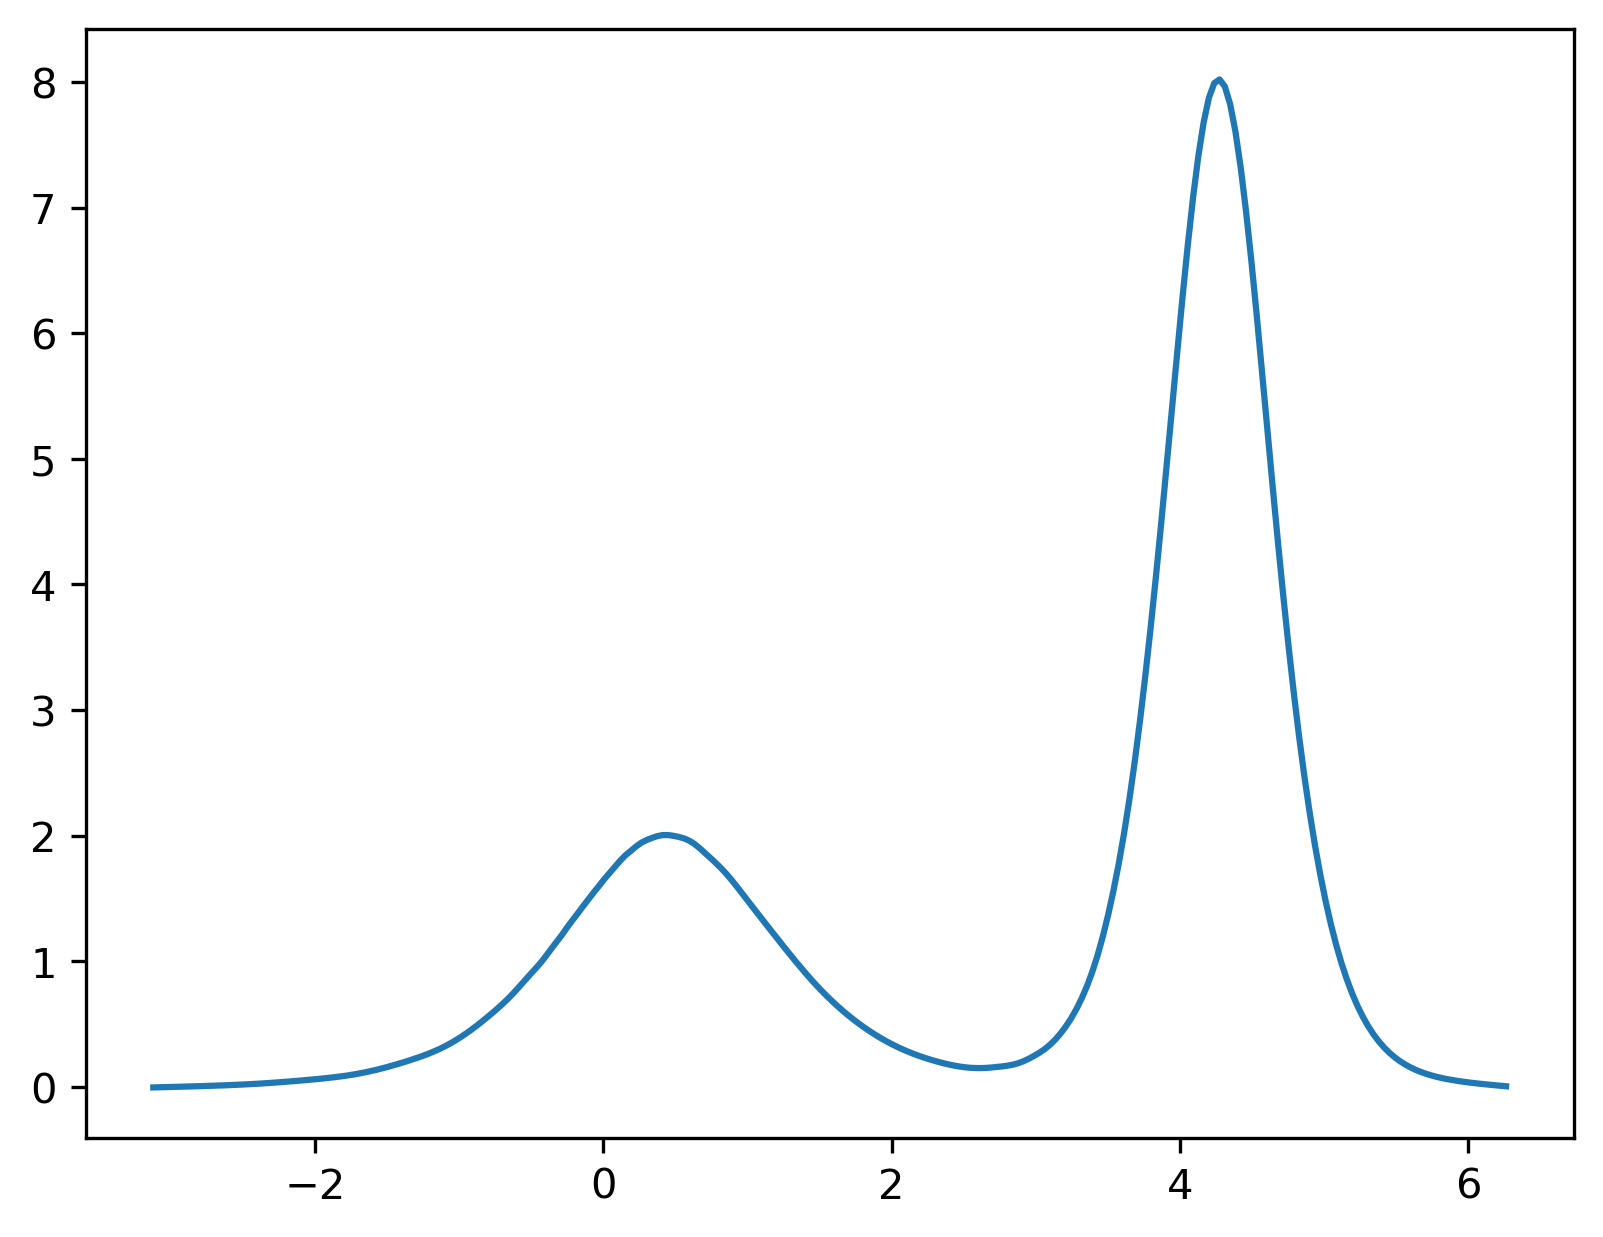

Step number: 33000, Loss: 0.00010512832523090765


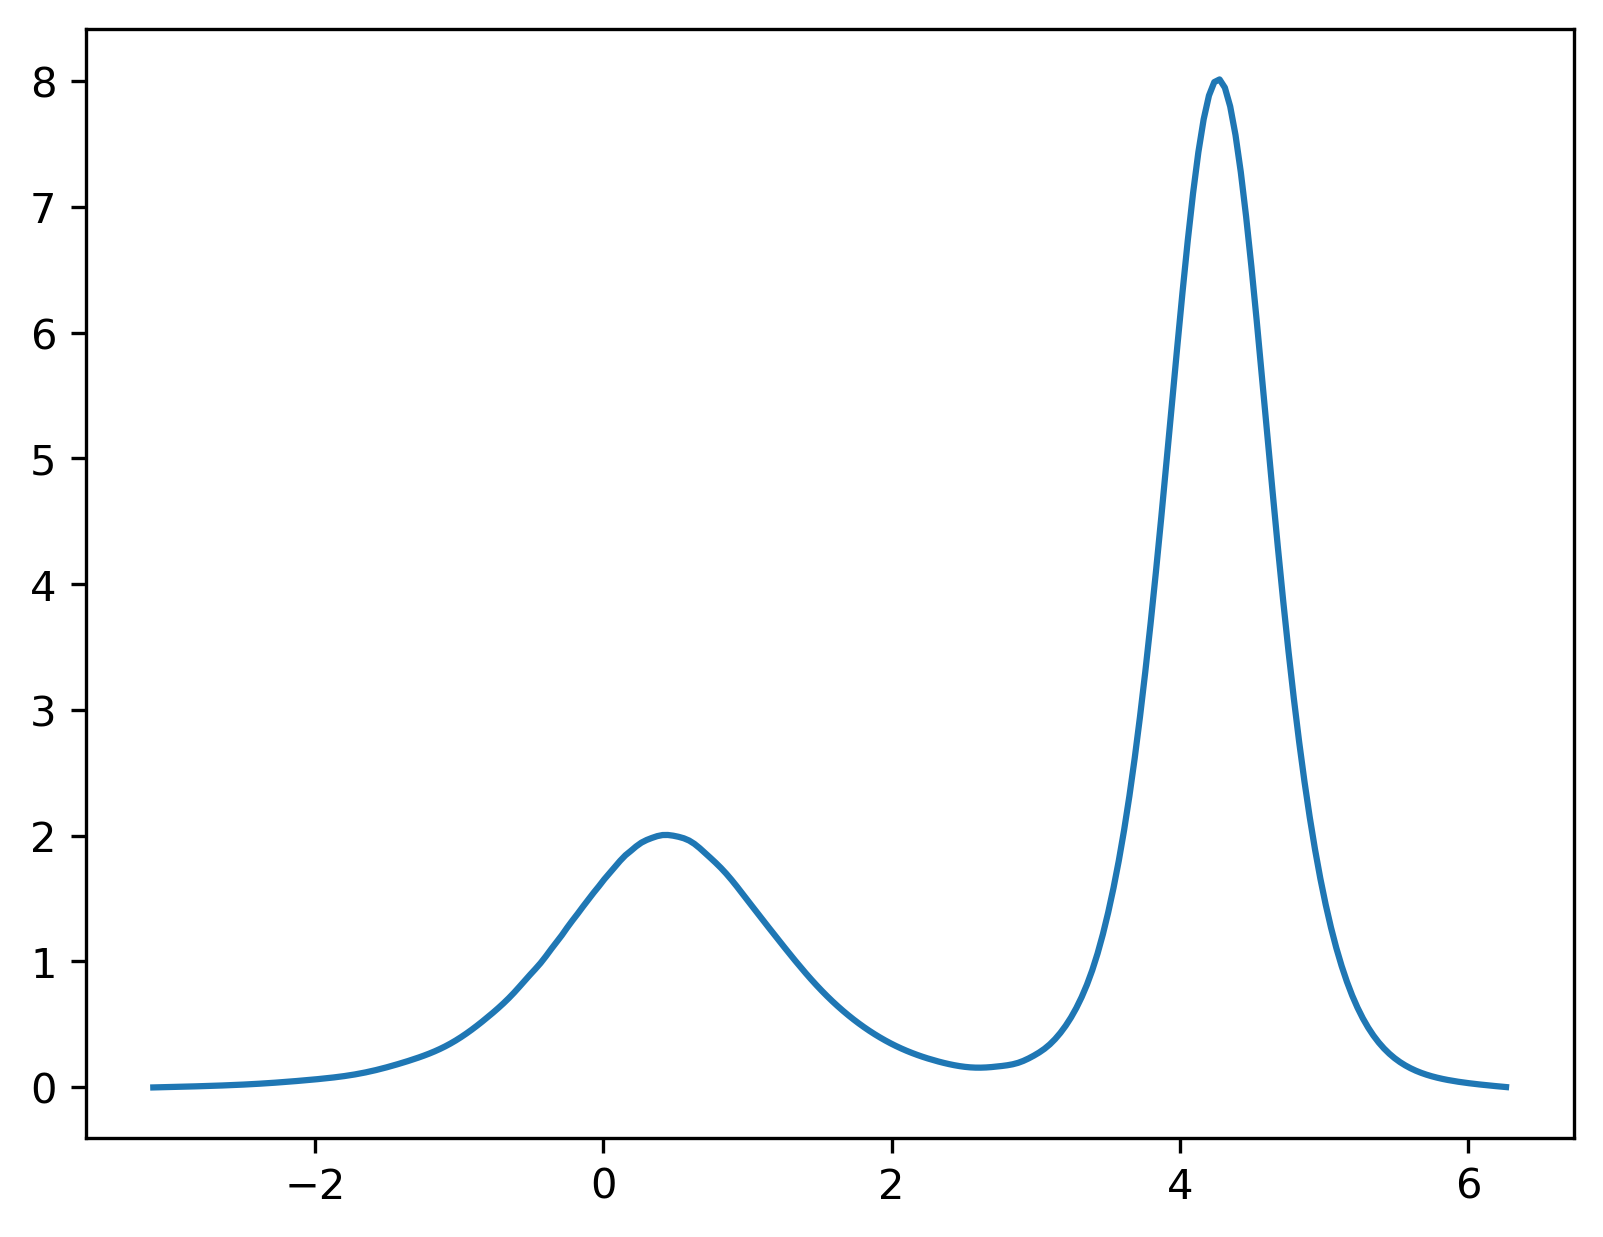

Step number: 34000, Loss: 8.864262781571597e-06


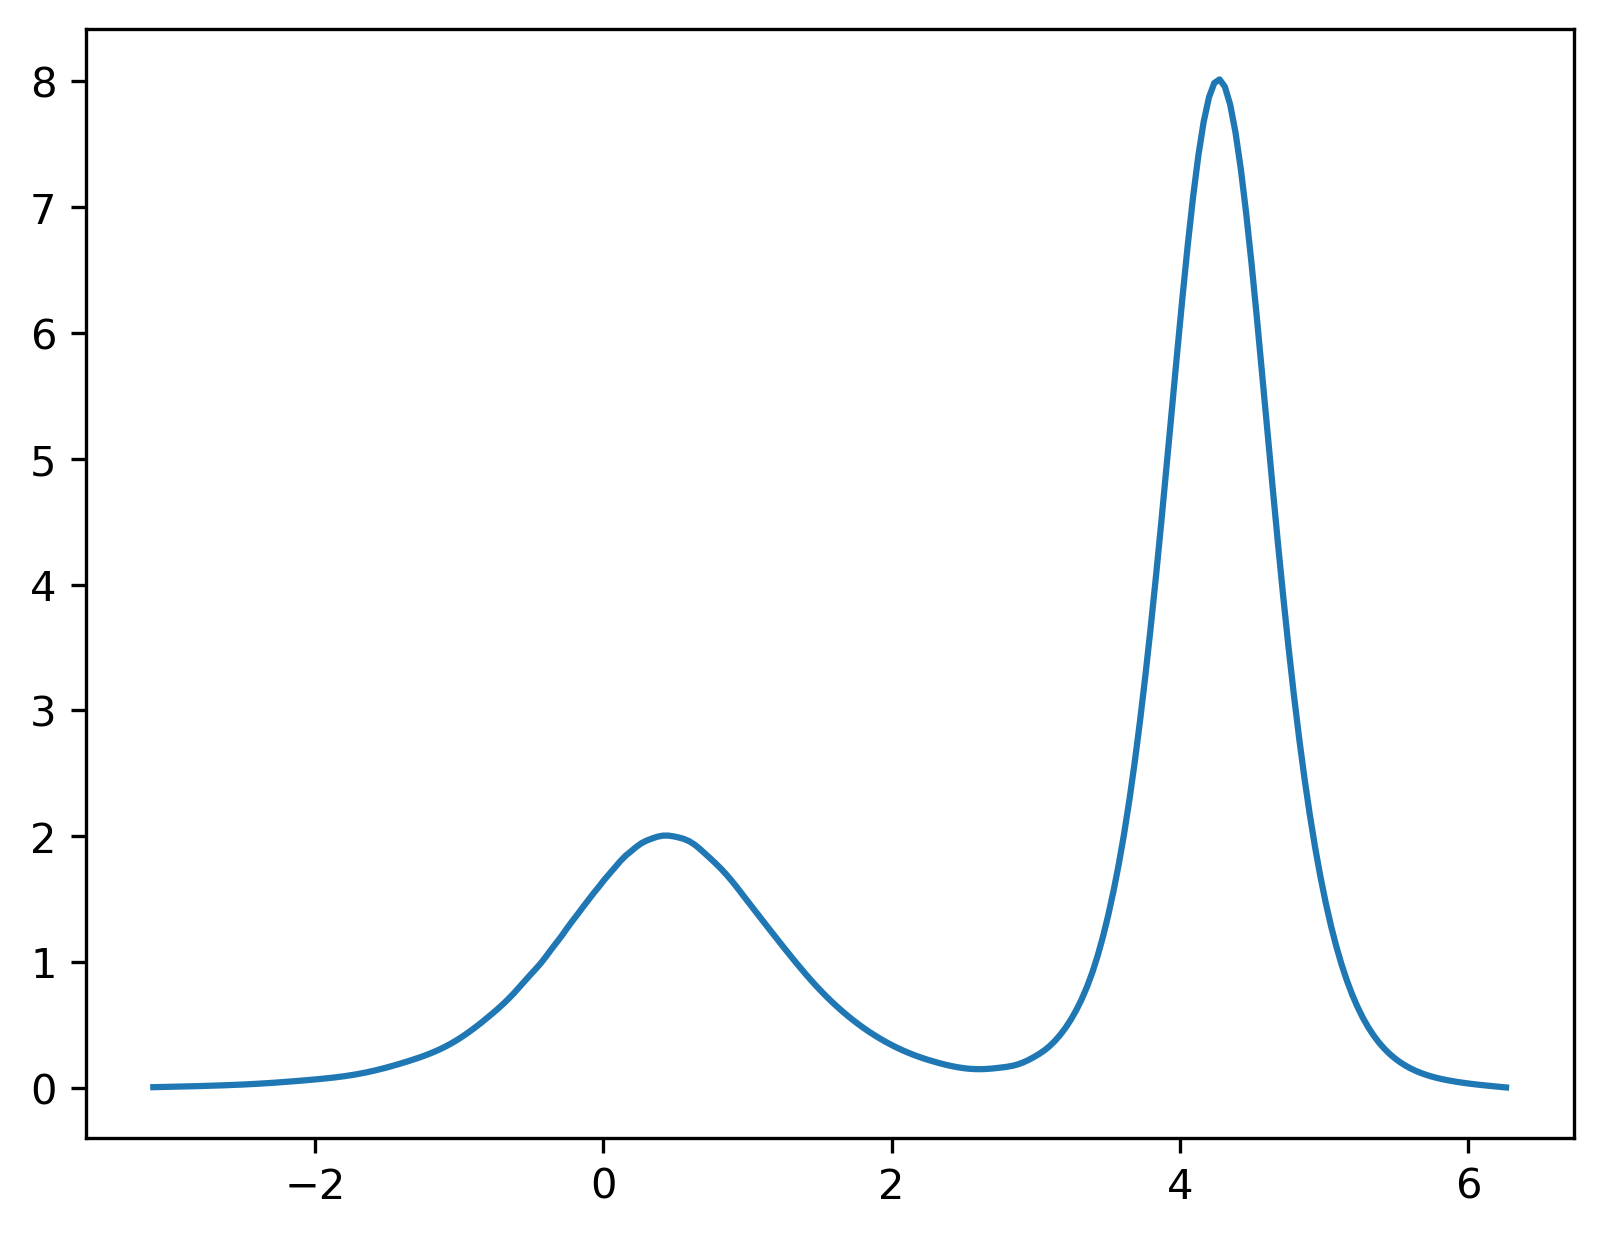

Step number: 35000, Loss: 7.31789168639807e-06


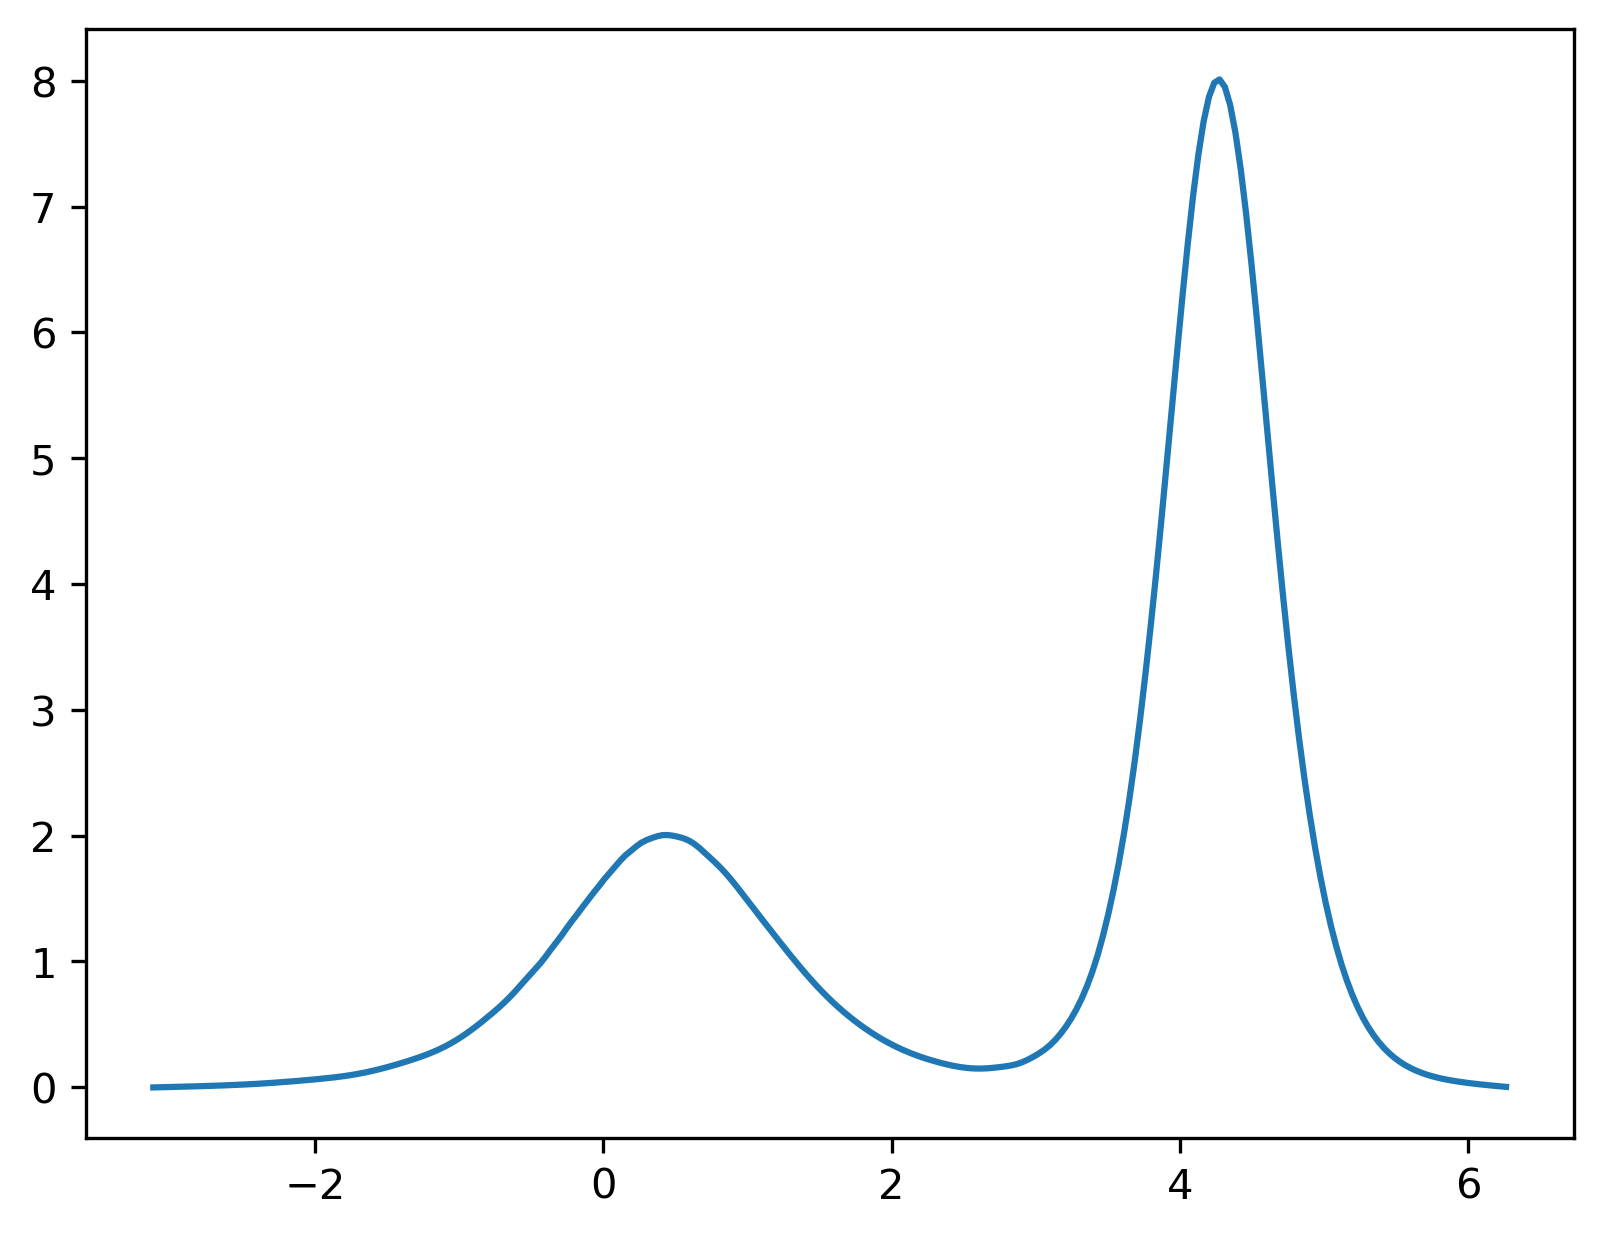

Step number: 36000, Loss: 6.508924343506806e-06


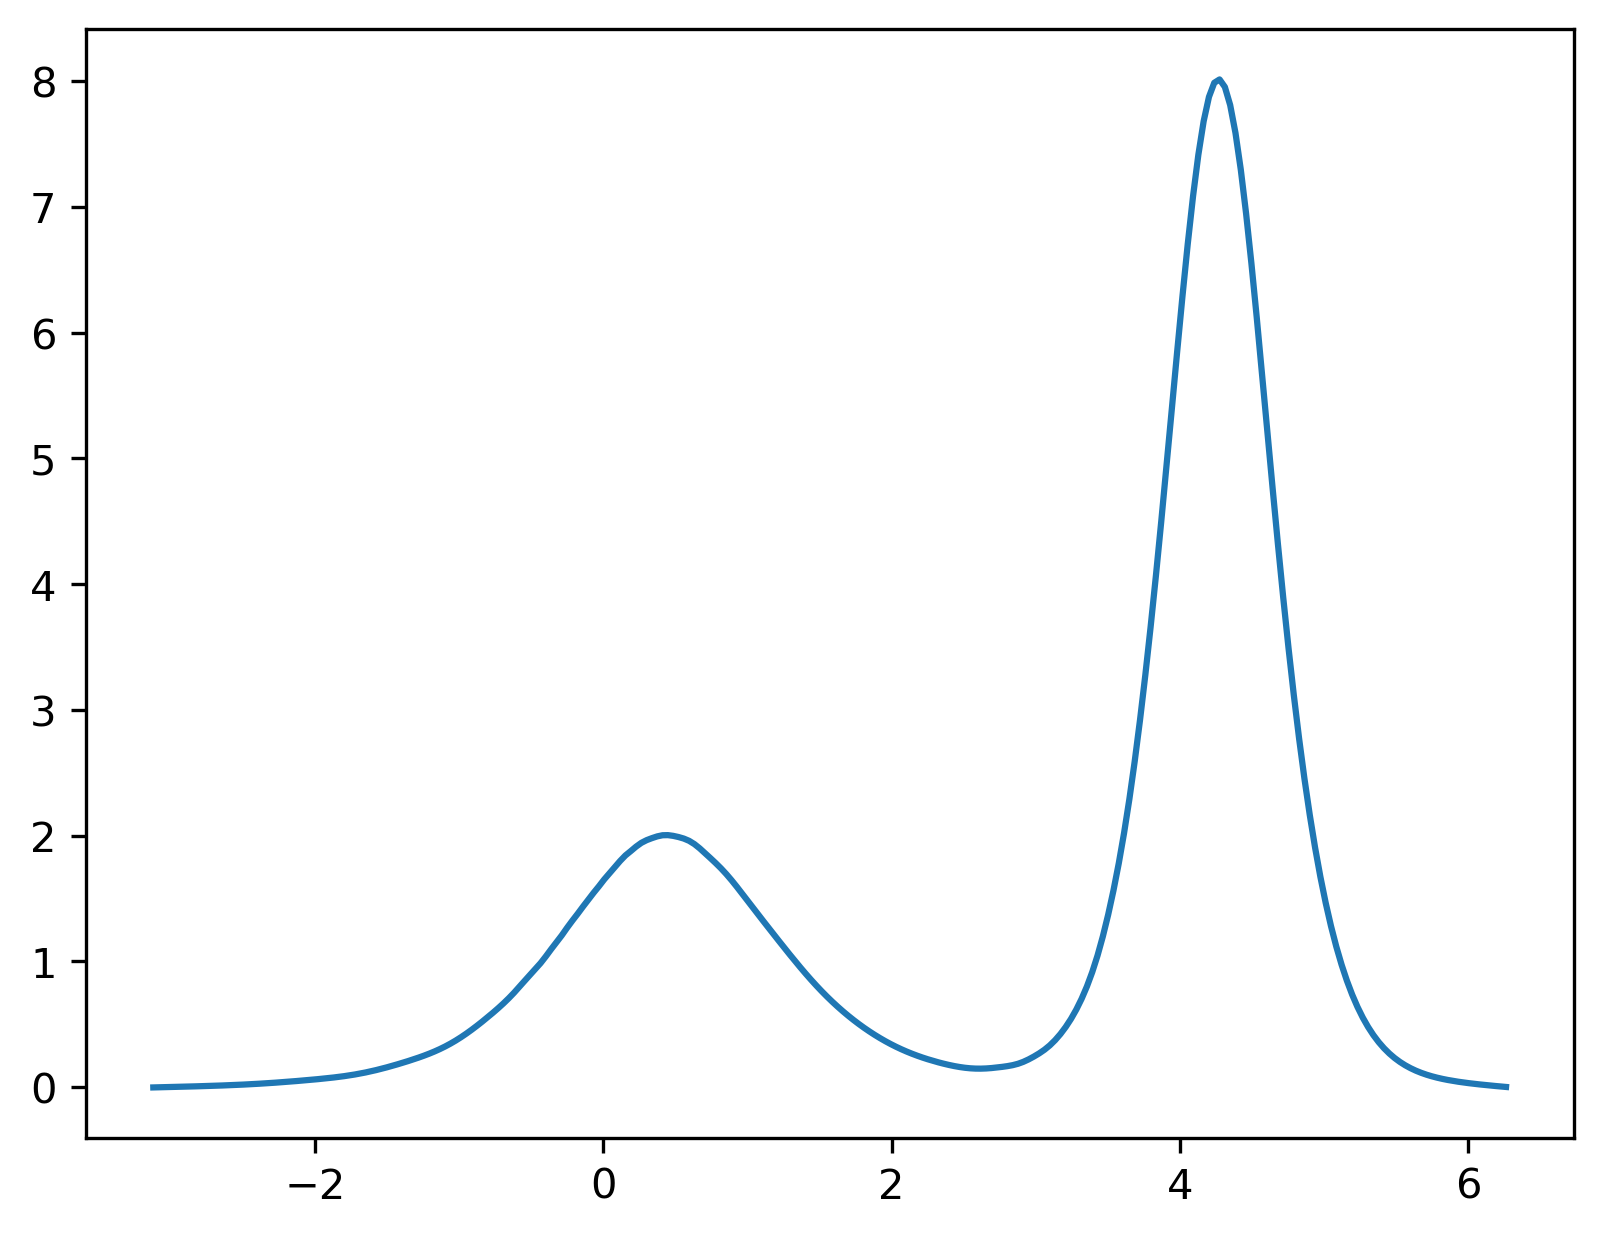

Step number: 37000, Loss: 7.892269422882237e-06


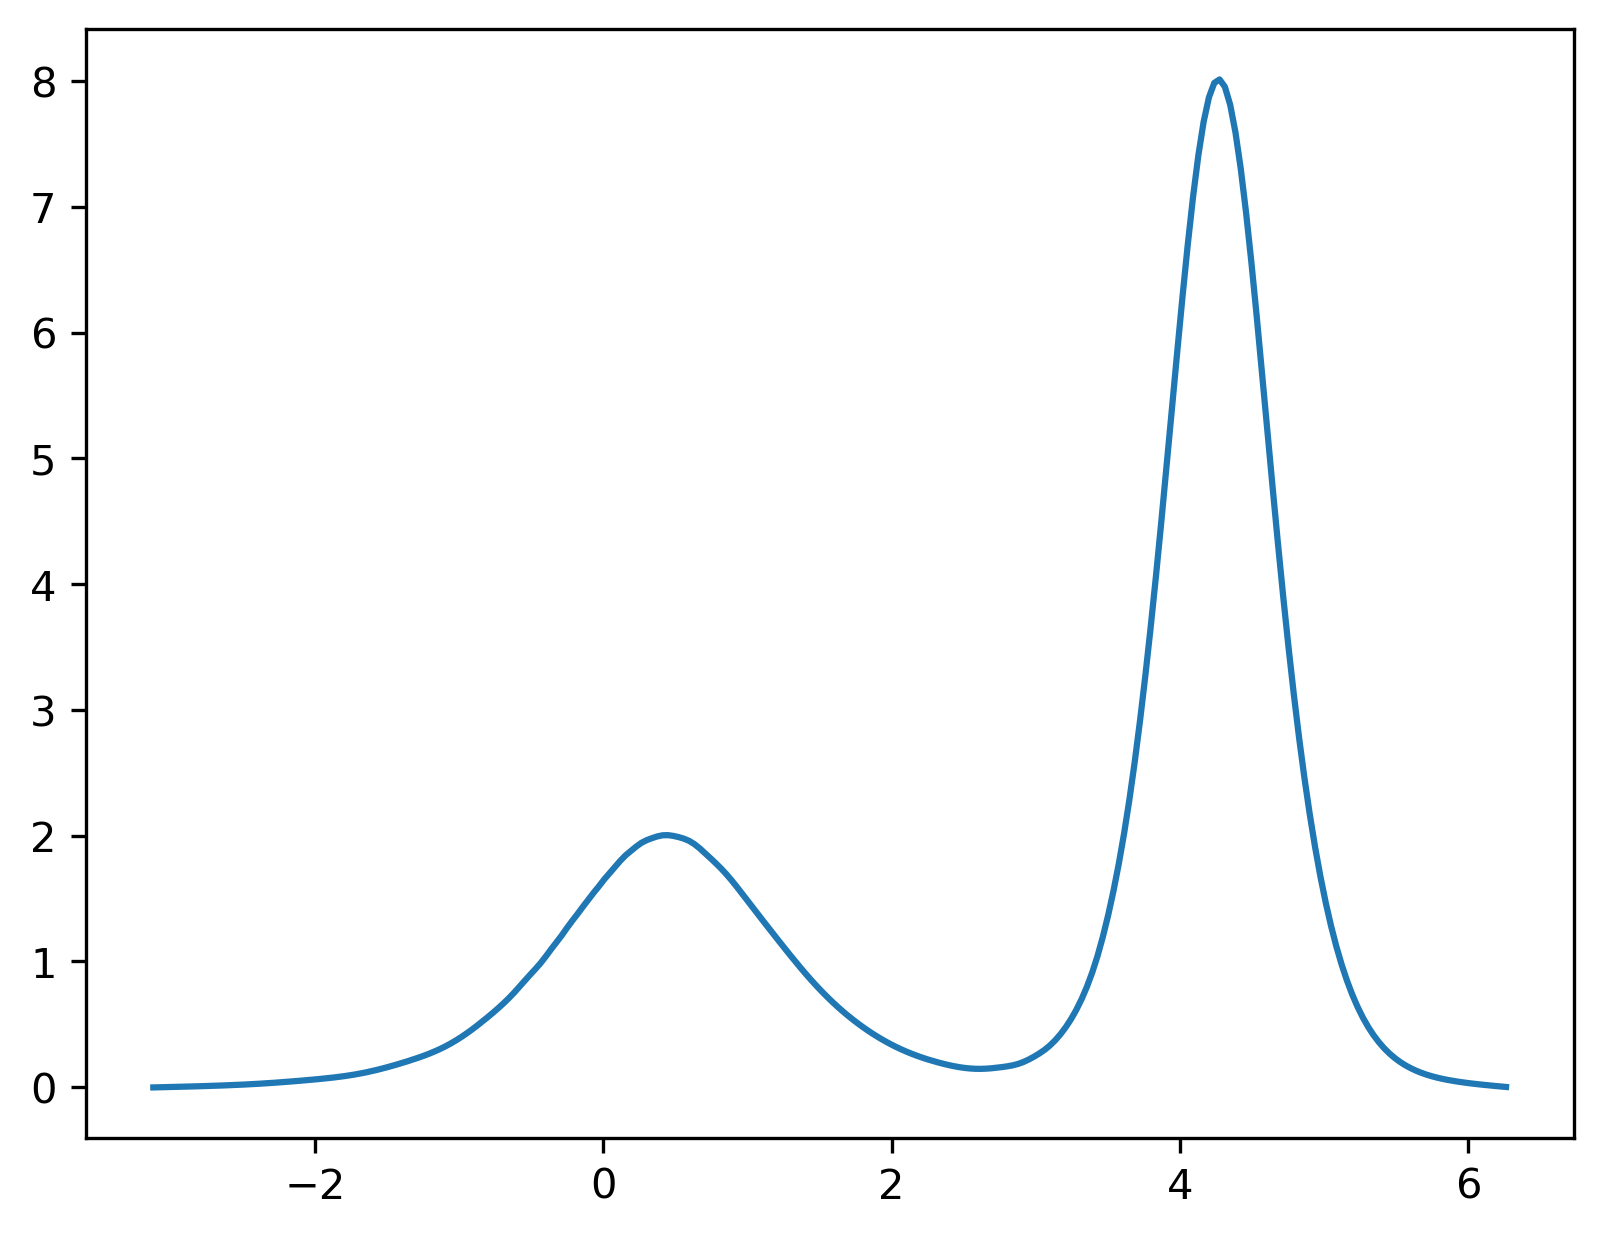

Step number: 38000, Loss: 7.353606633841991e-05


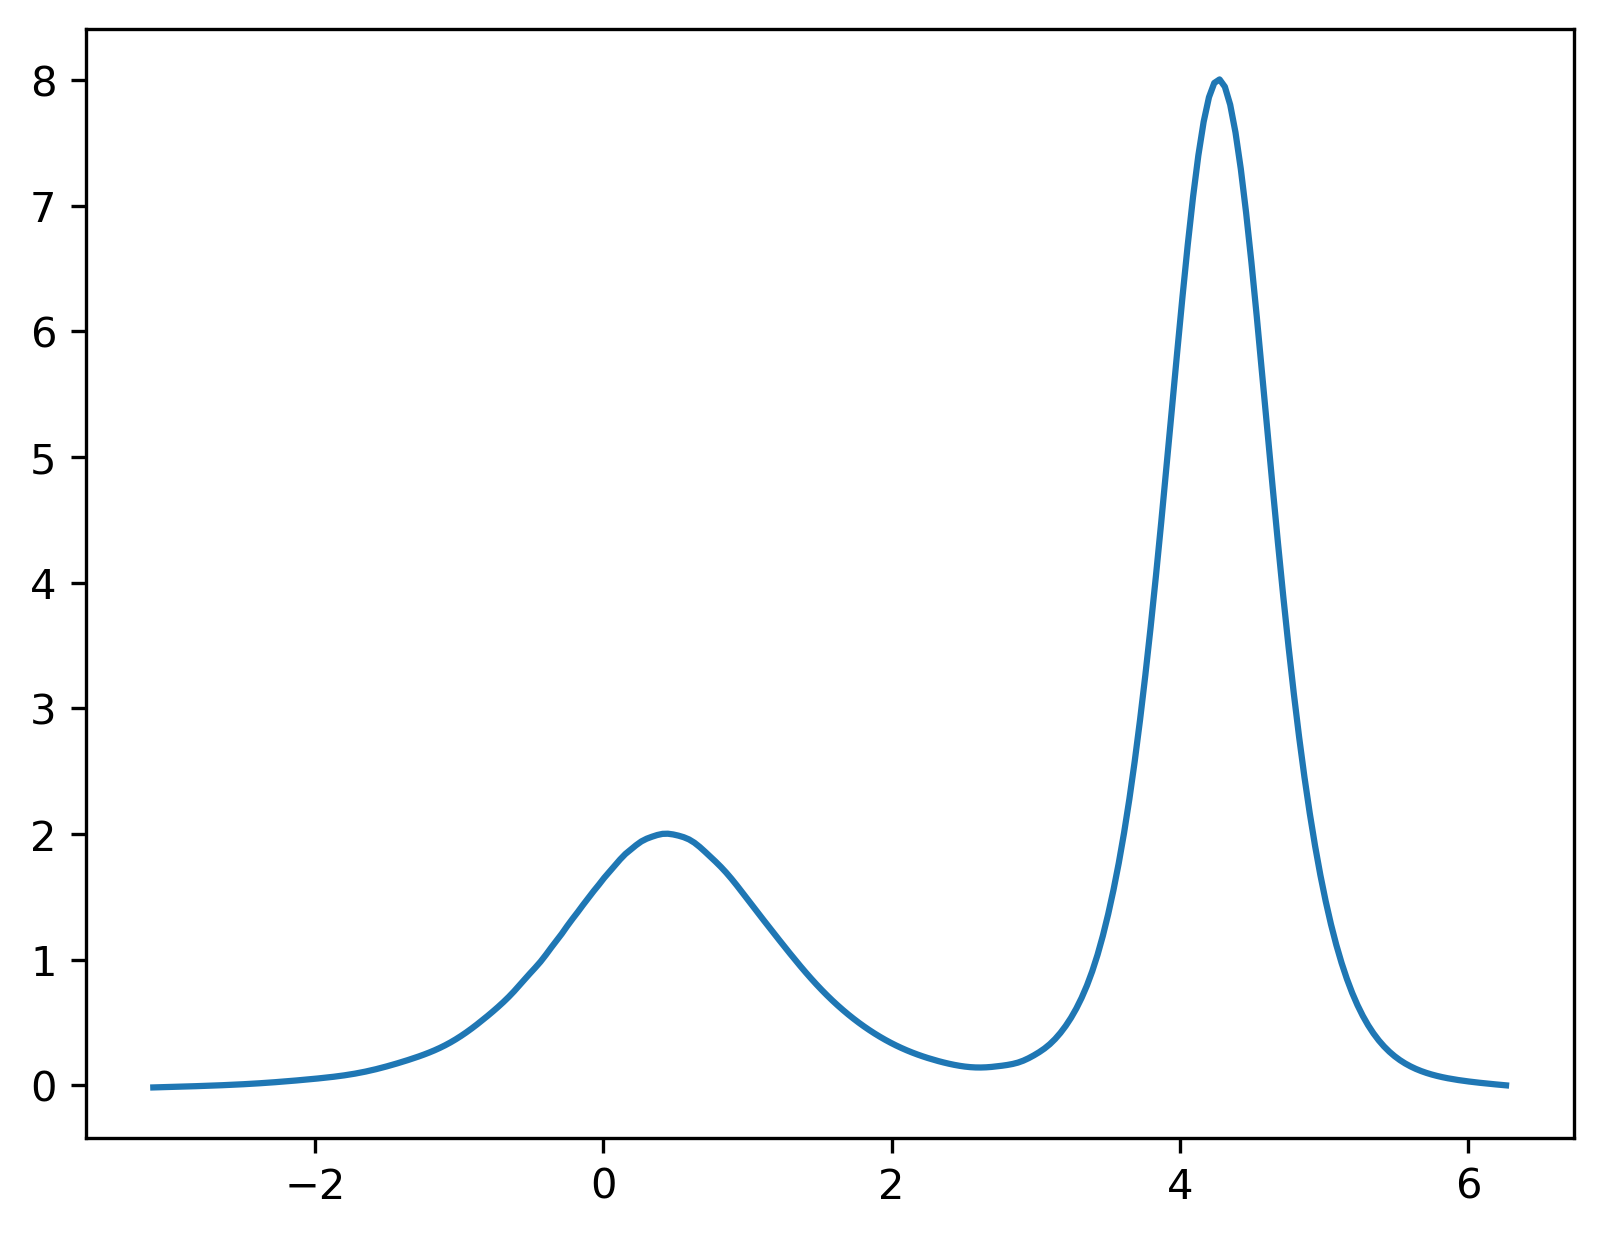

Step number: 39000, Loss: 4.142442412558012e-05


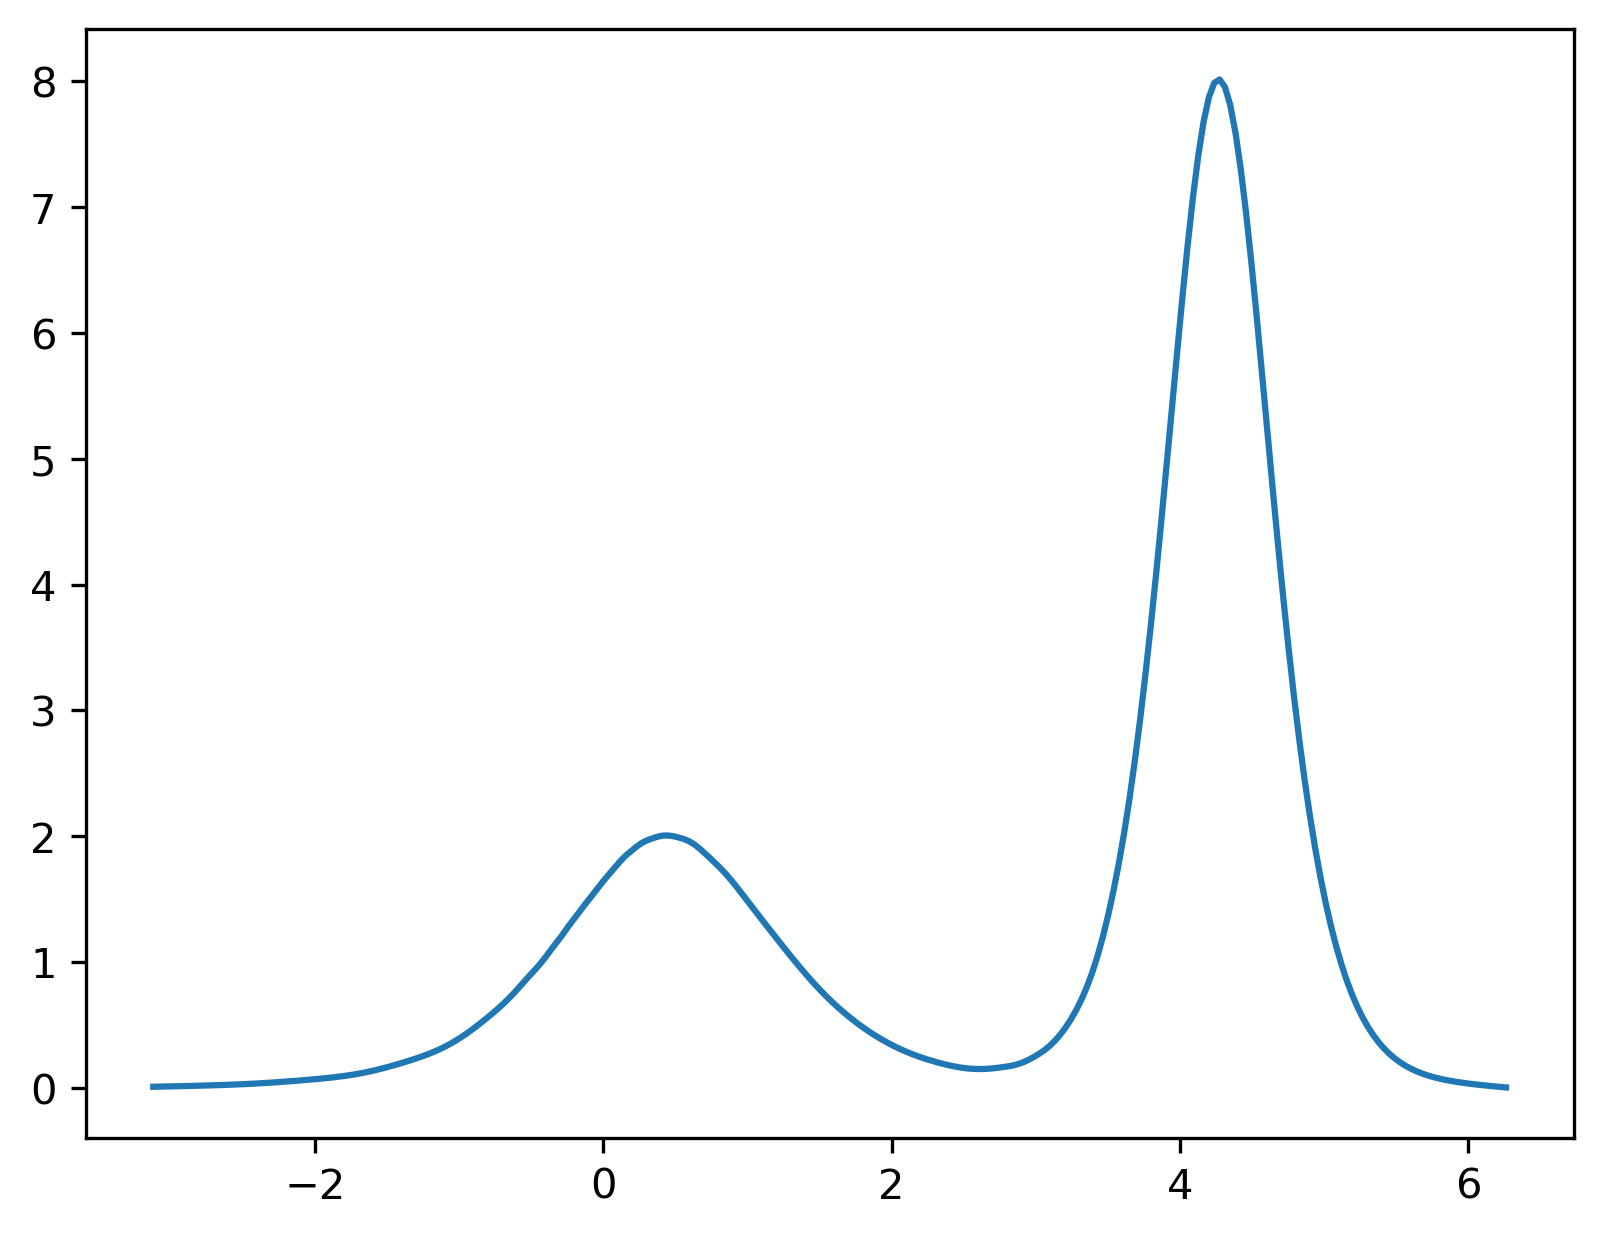

Step number: 40000, Loss: 0.00026926471036858857


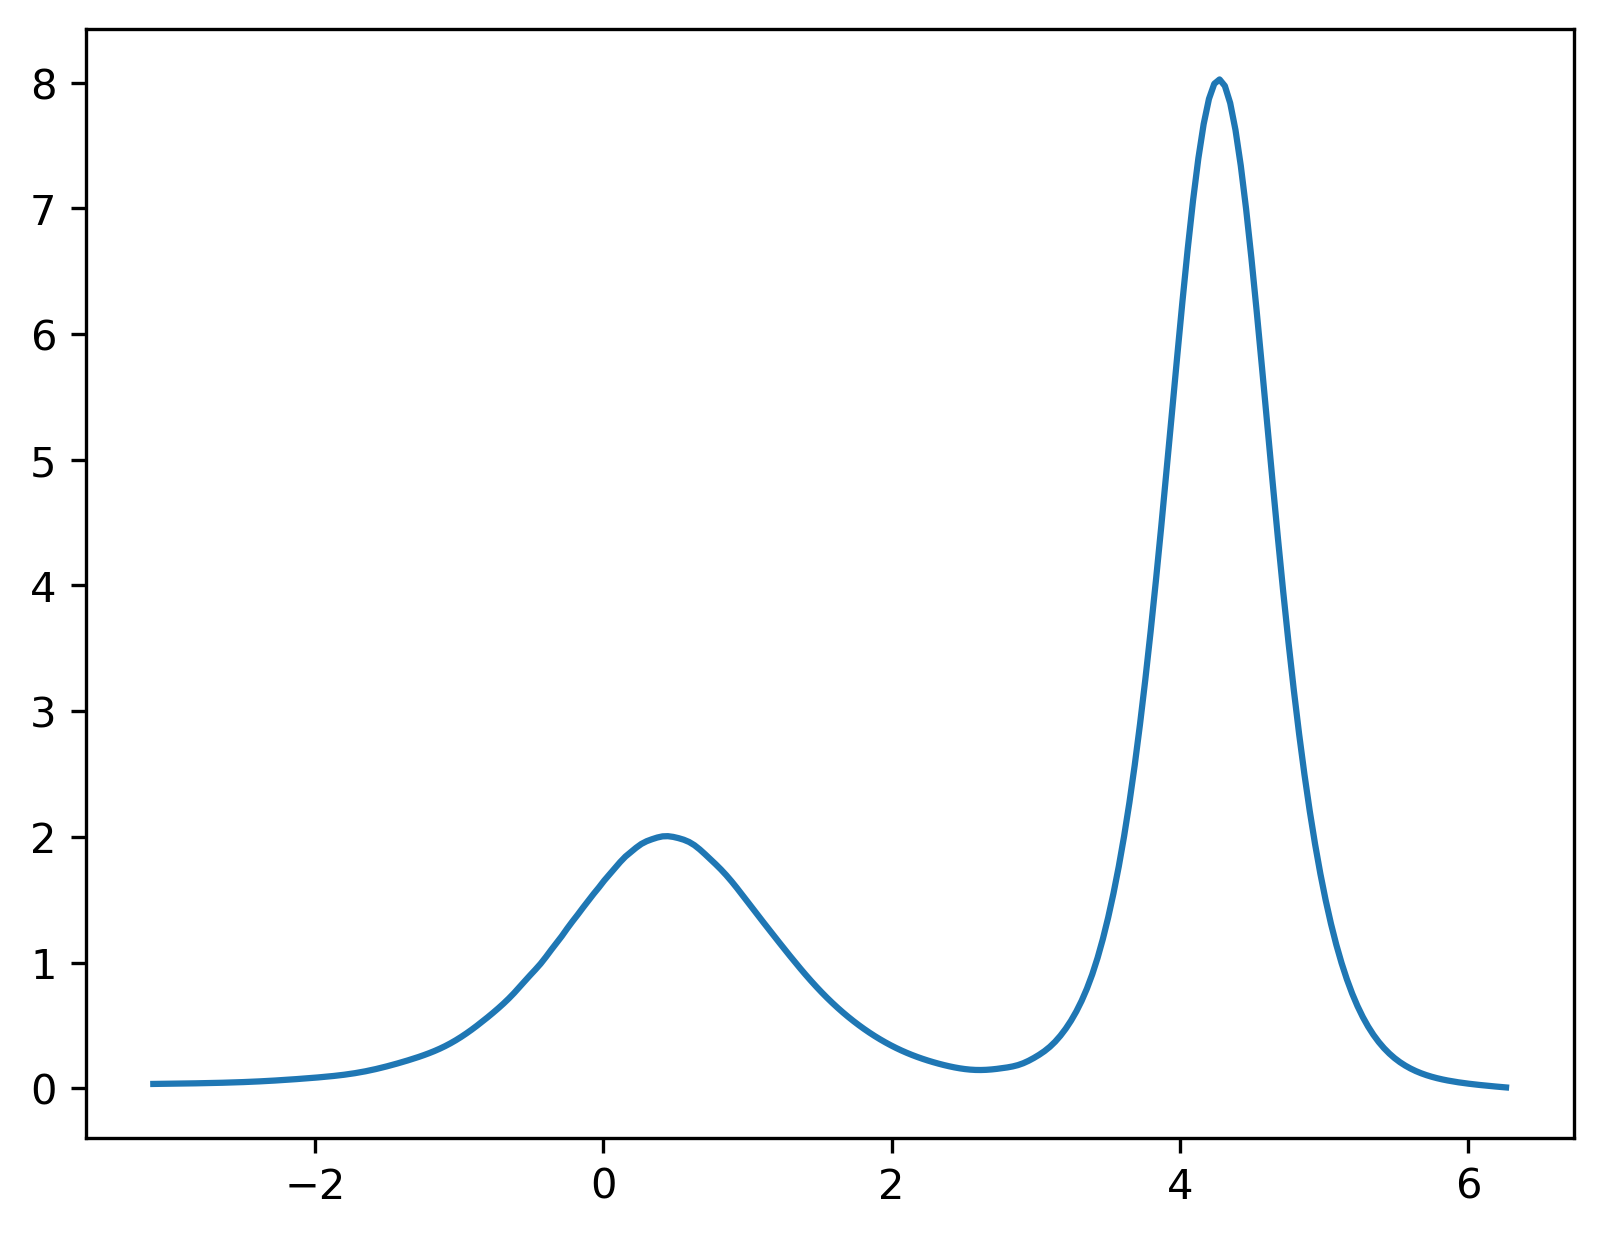

Step number: 41000, Loss: 8.748485925025307e-06


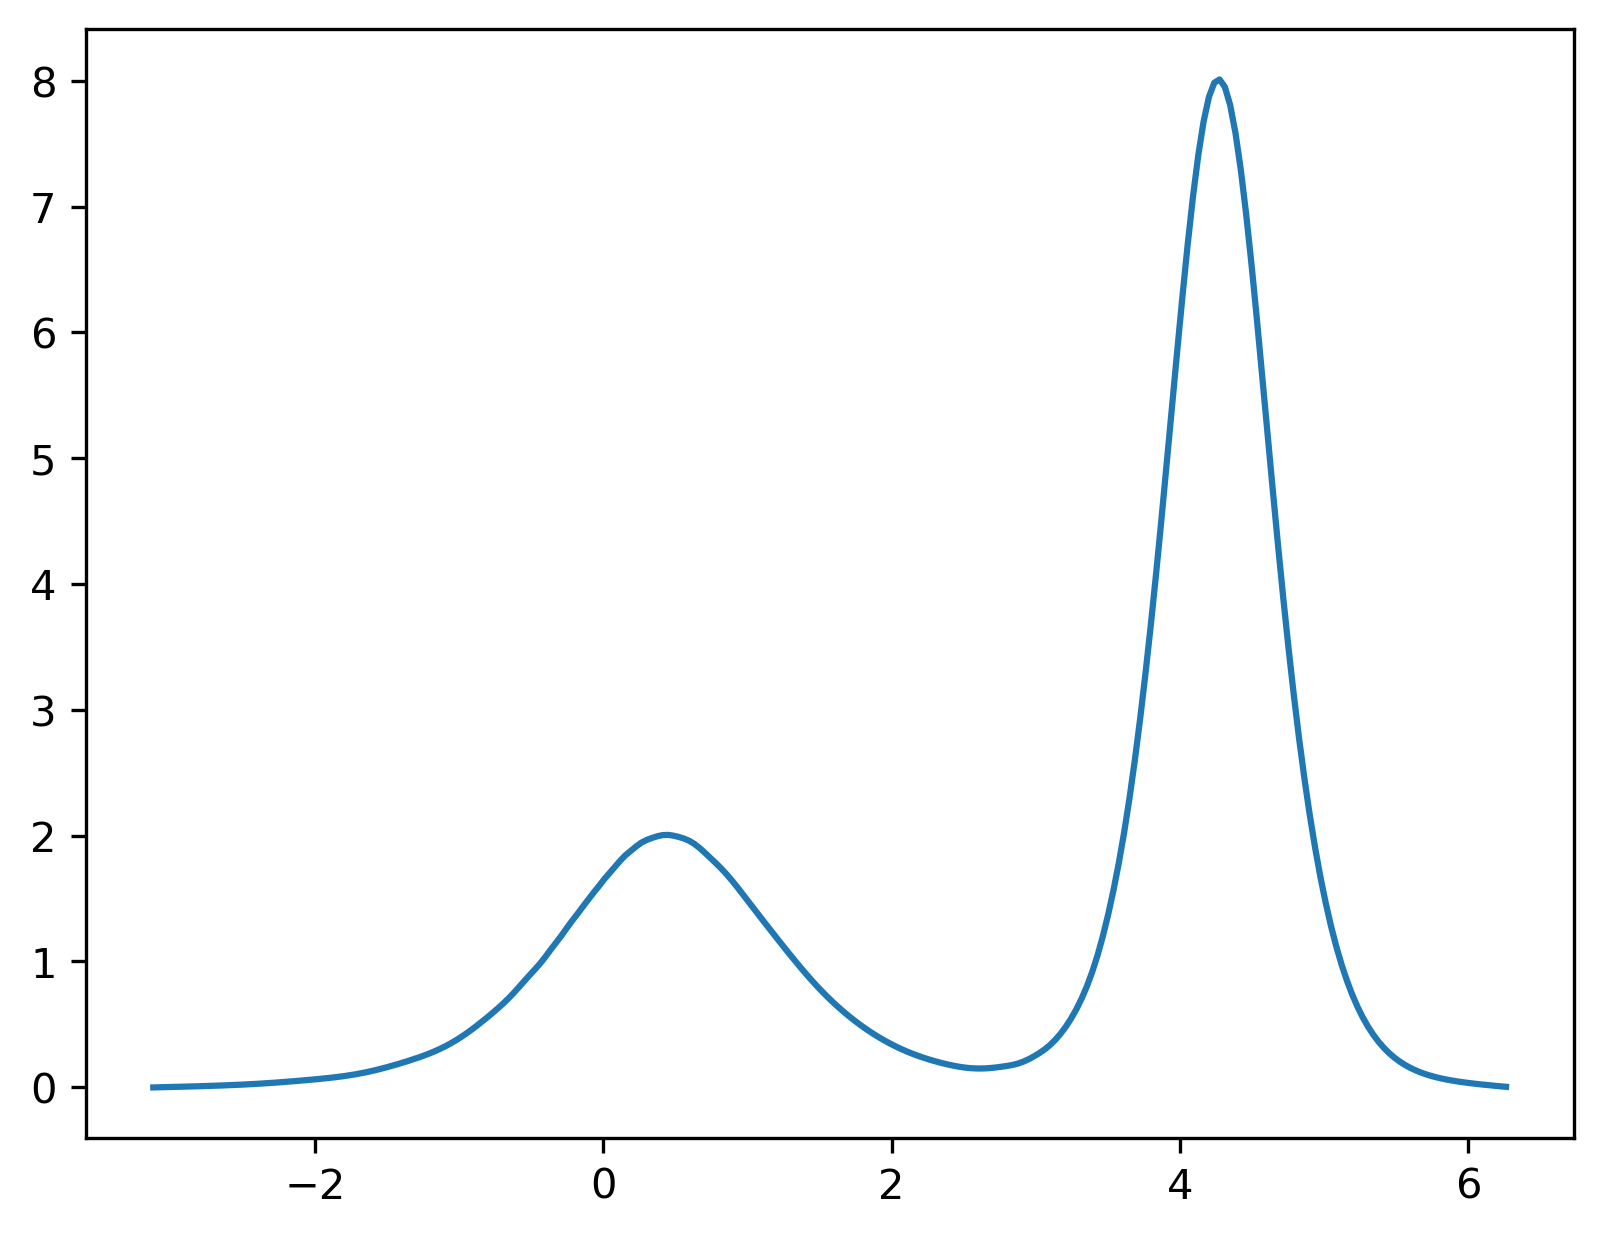

Step number: 42000, Loss: 2.7180944016436115e-05


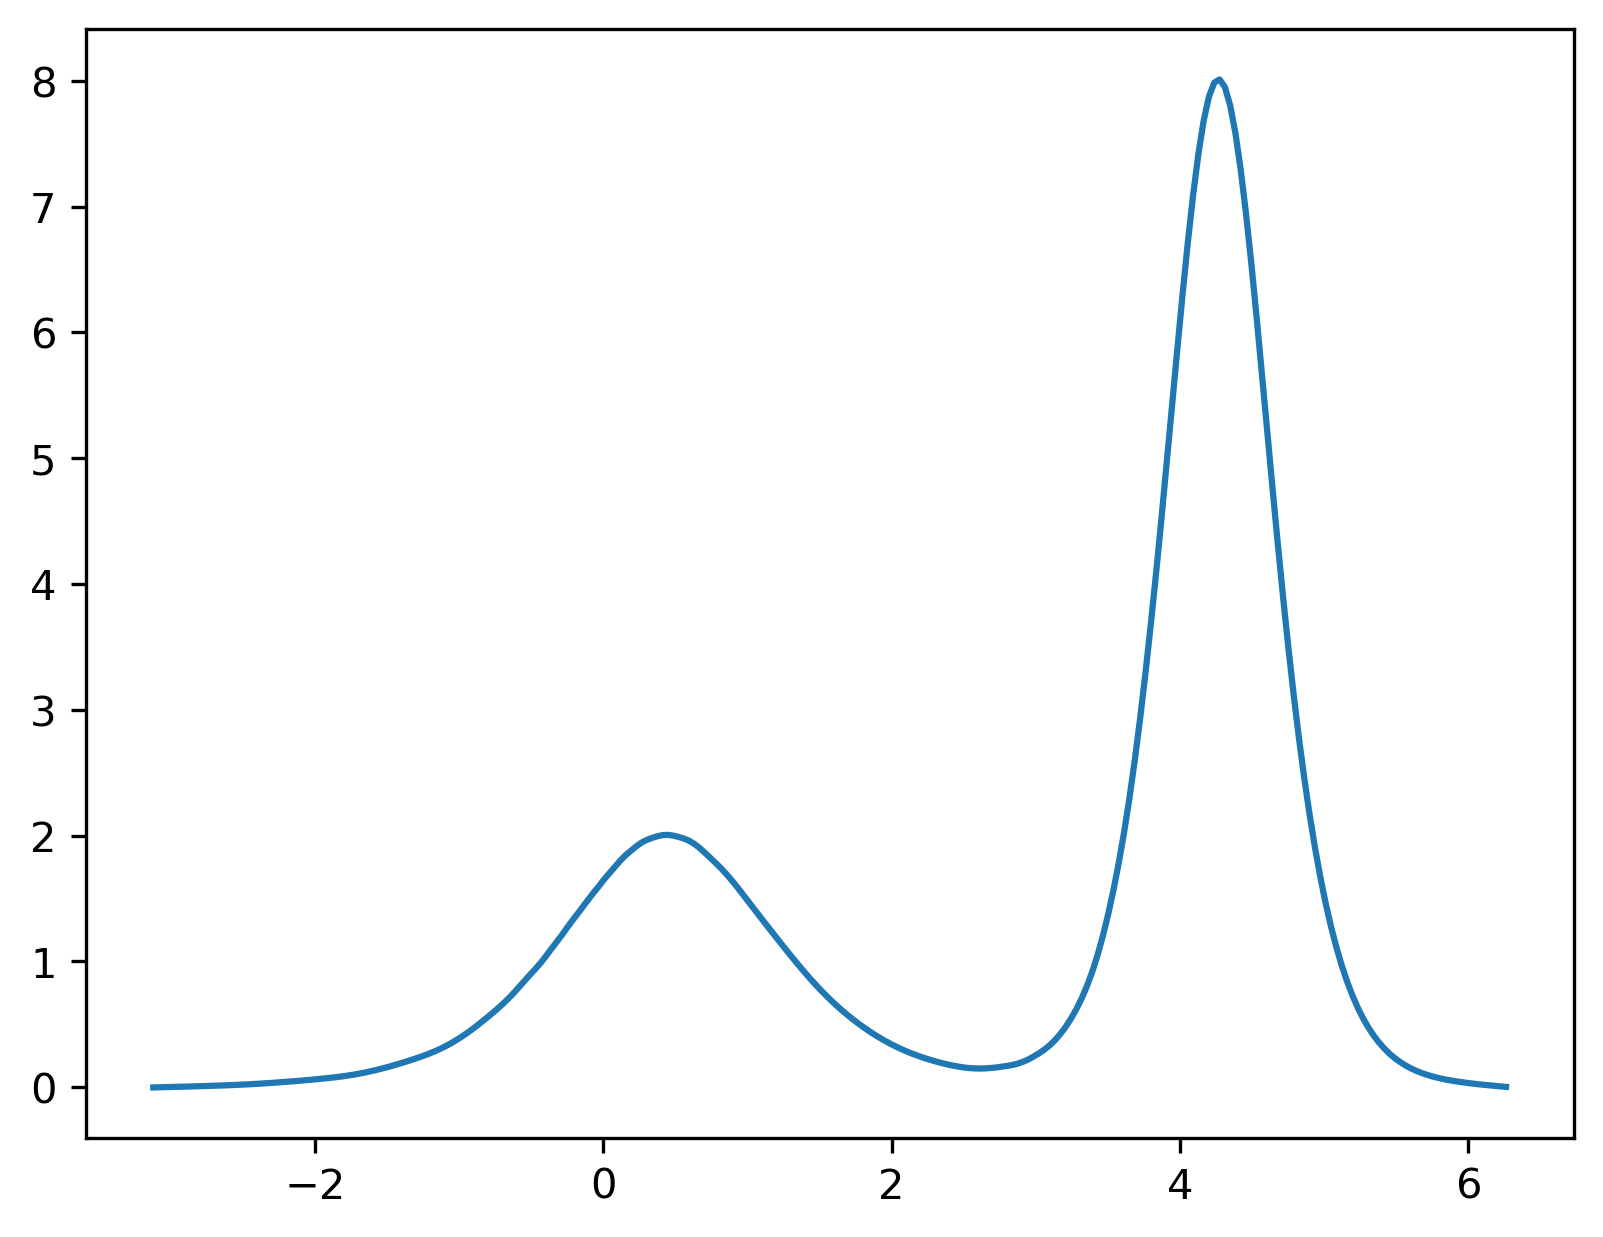

Step number: 43000, Loss: 1.810222238418646e-05


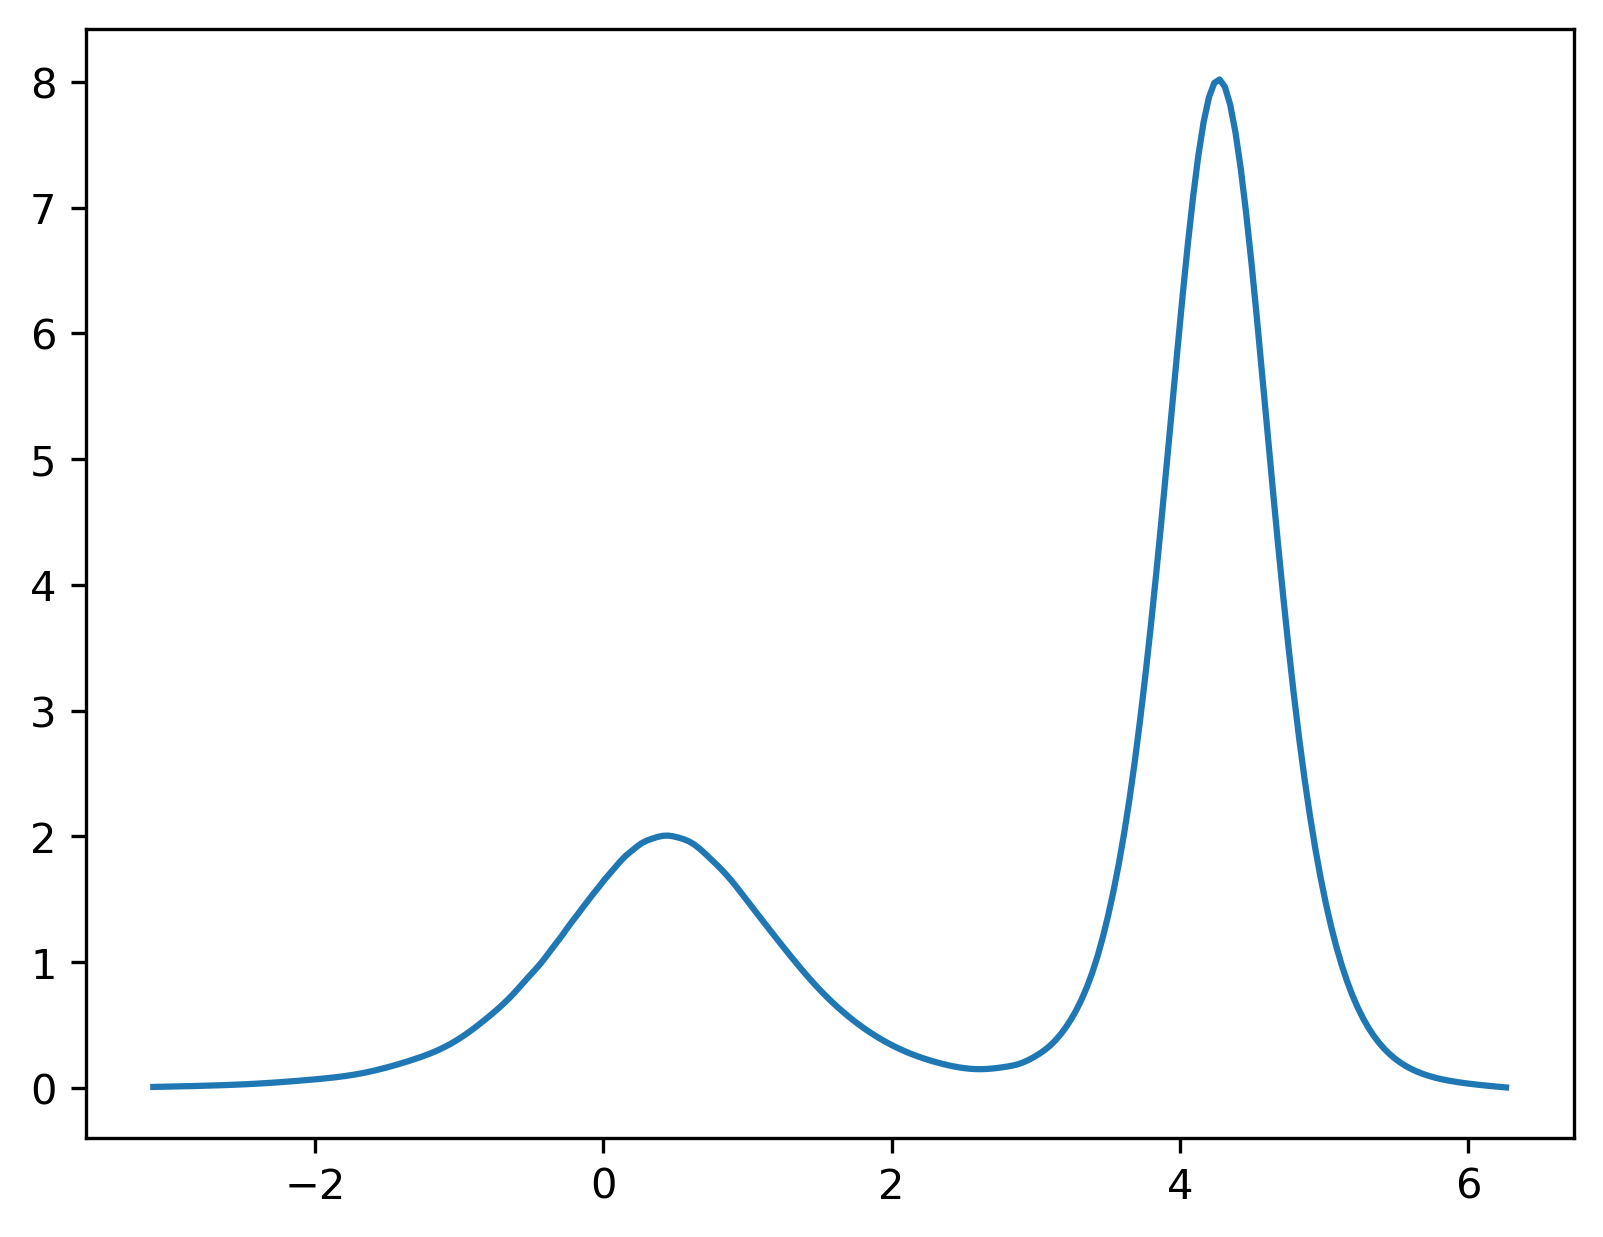

Step number: 44000, Loss: 2.9651895602000877e-05


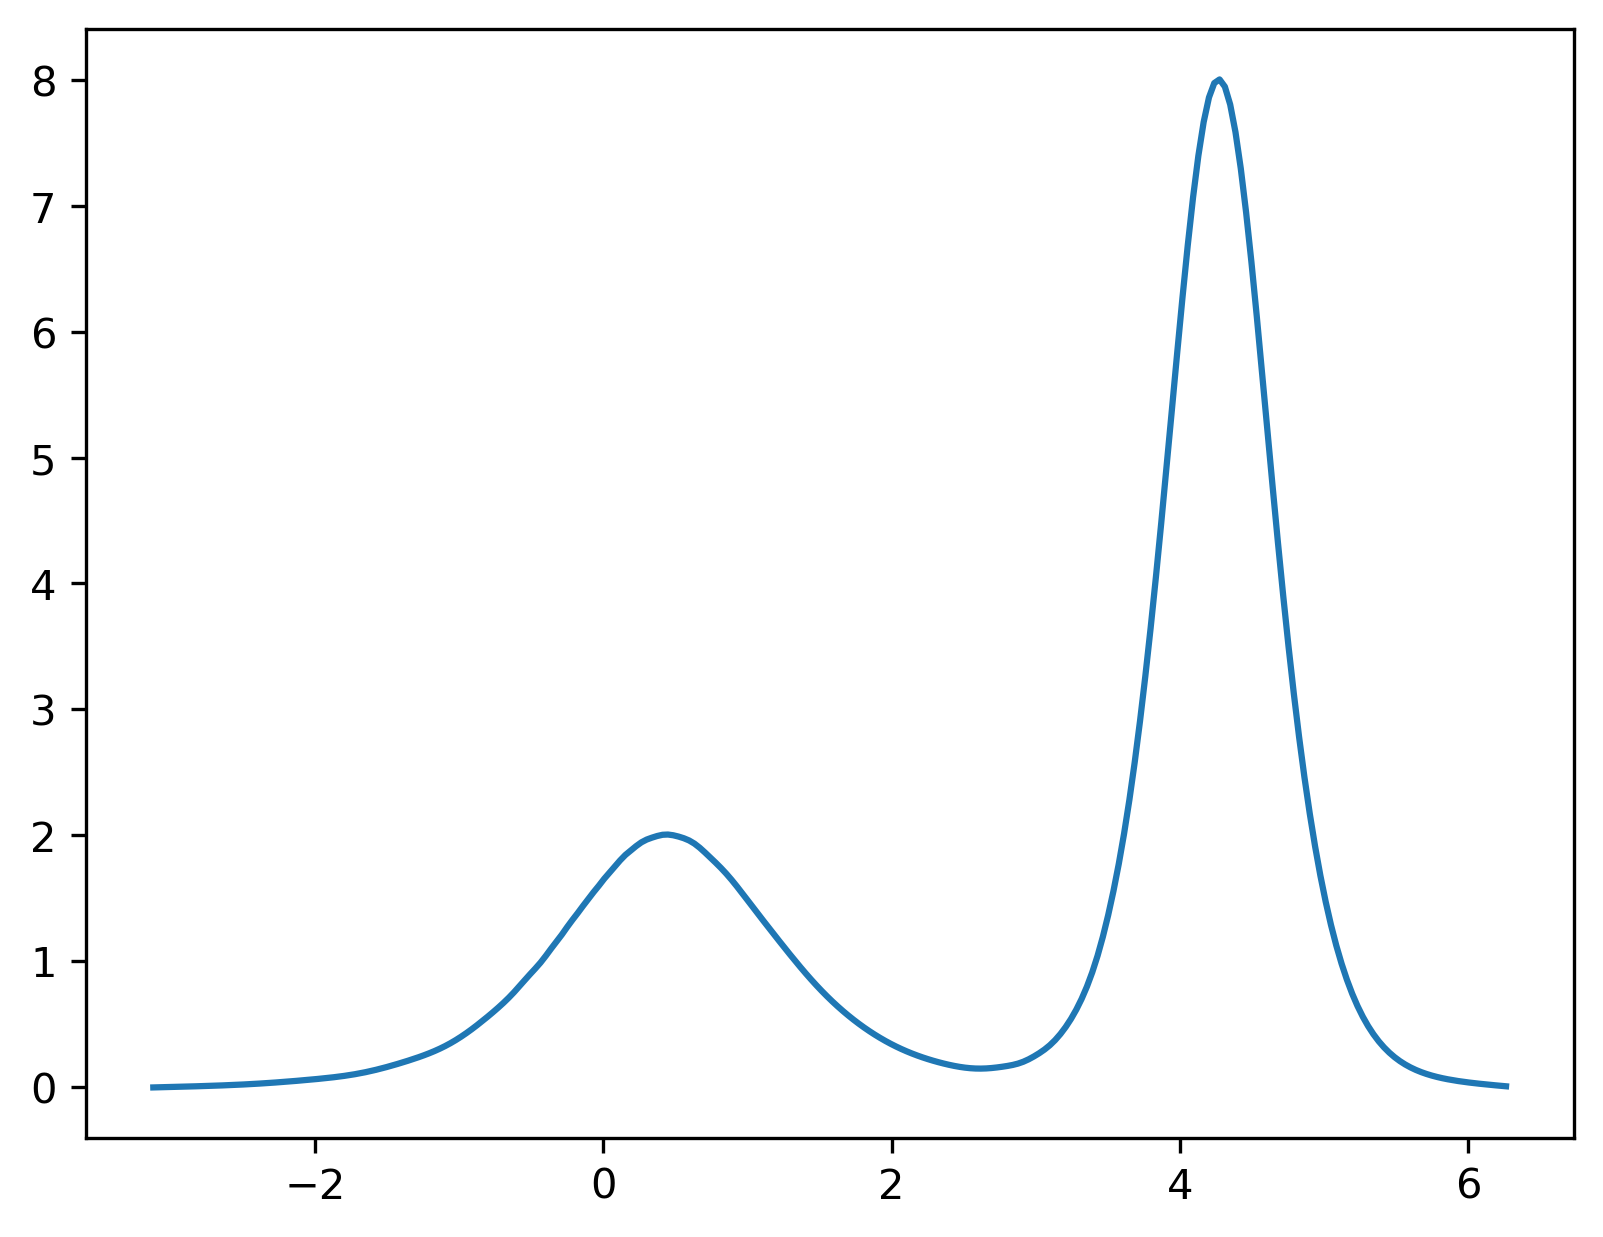

Step number: 45000, Loss: 6.978363217058359e-06


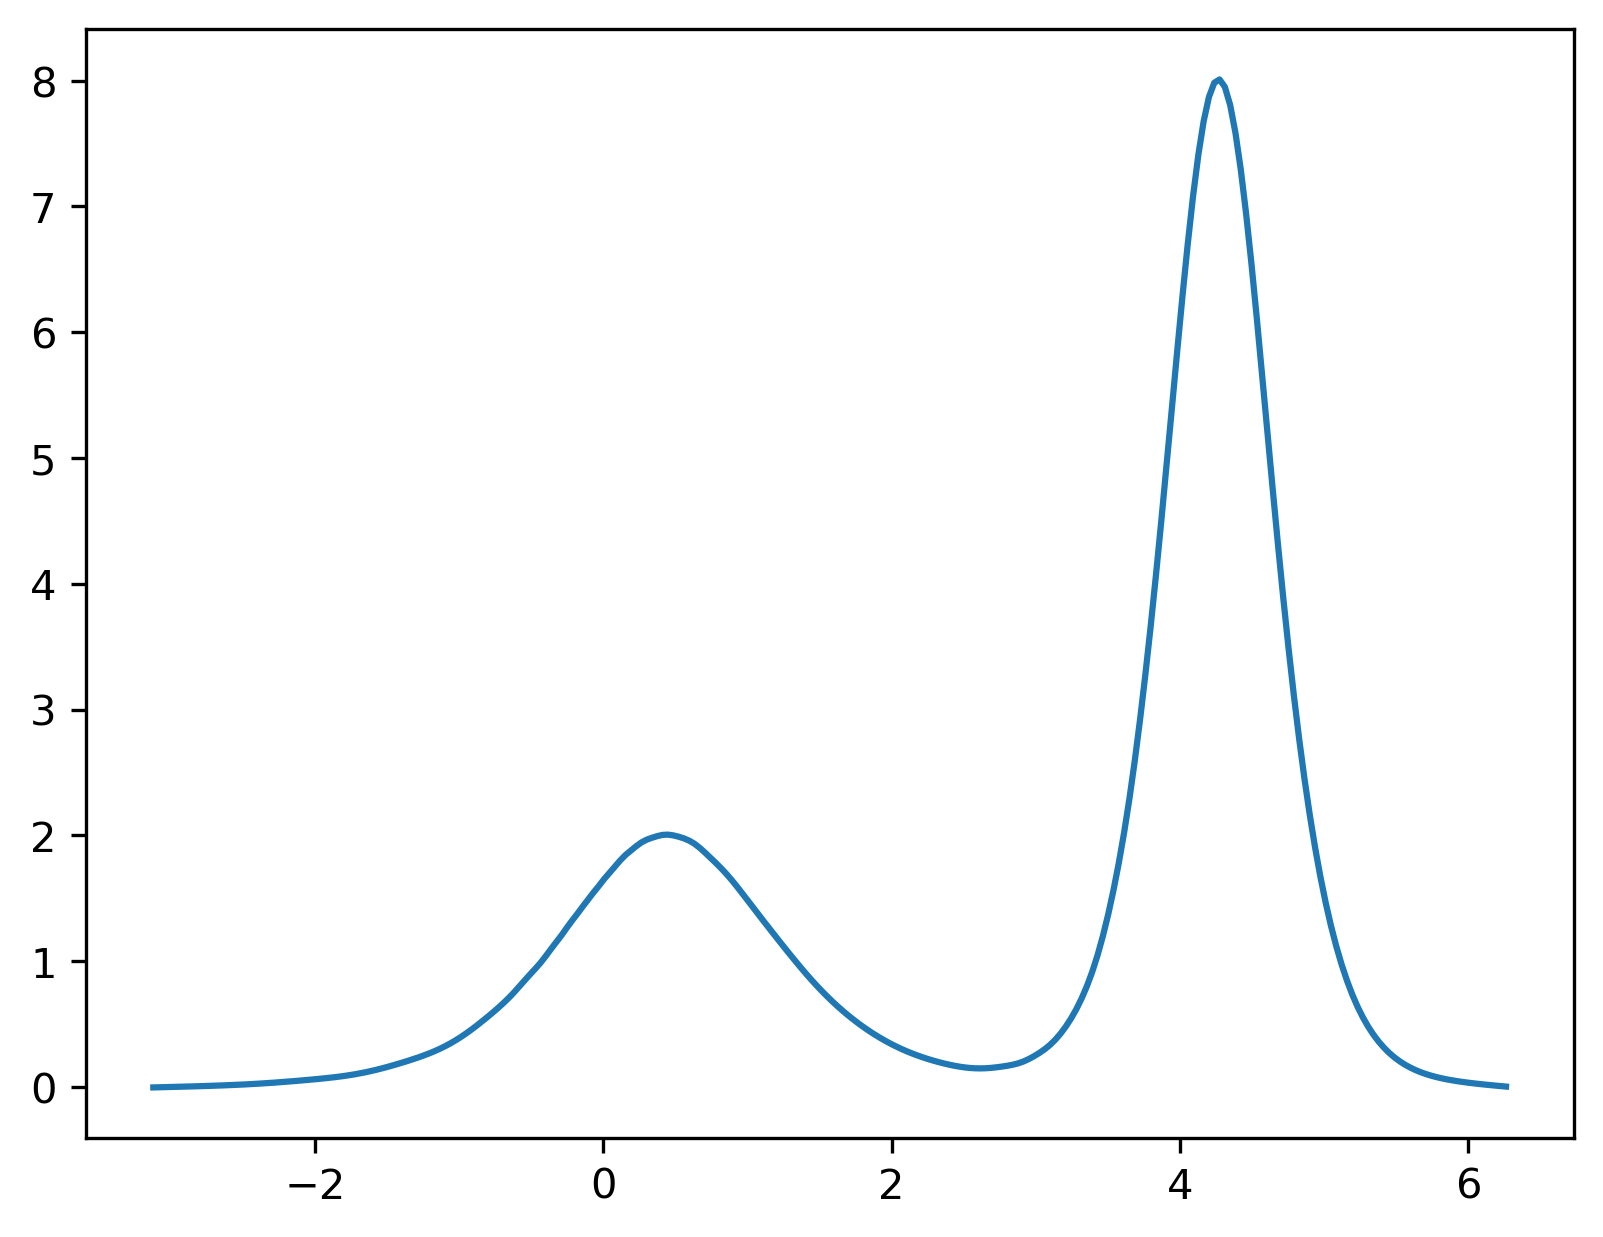

Step number: 46000, Loss: 0.0006957309087738395


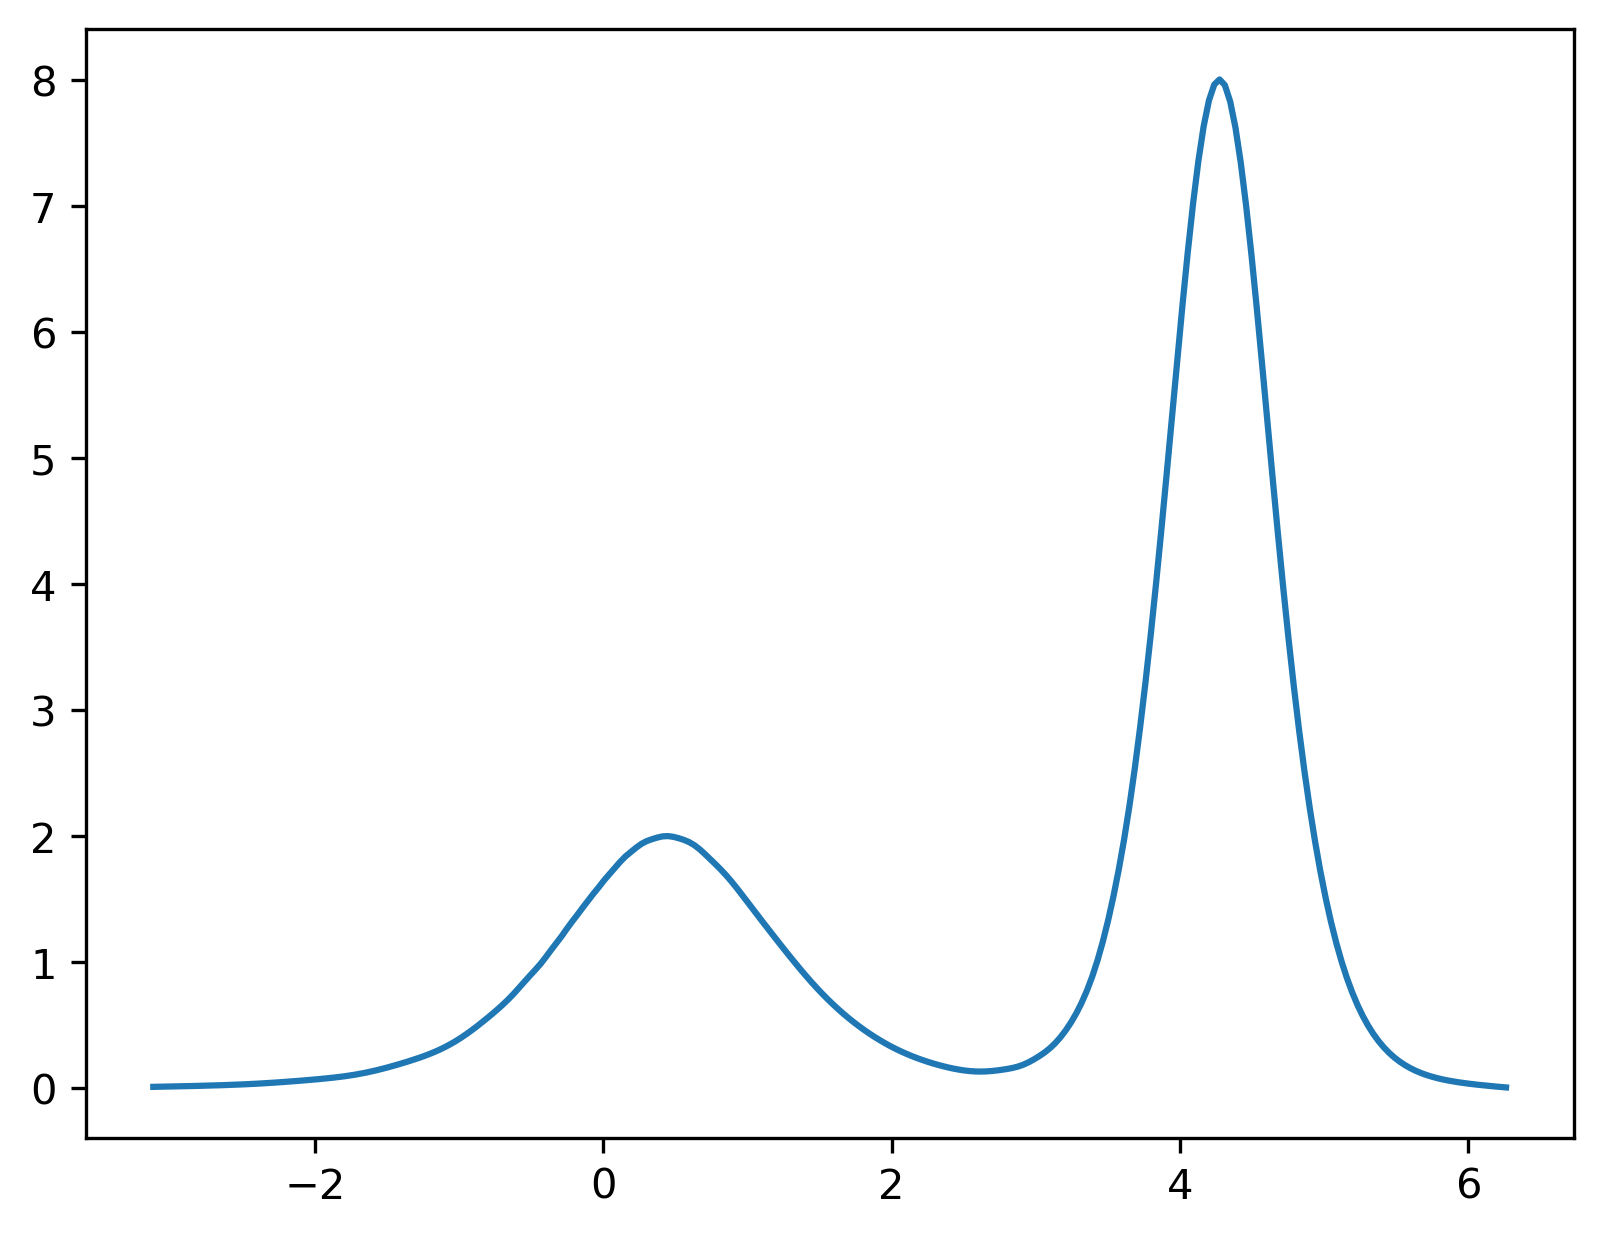

Step number: 47000, Loss: 0.000600053695961833


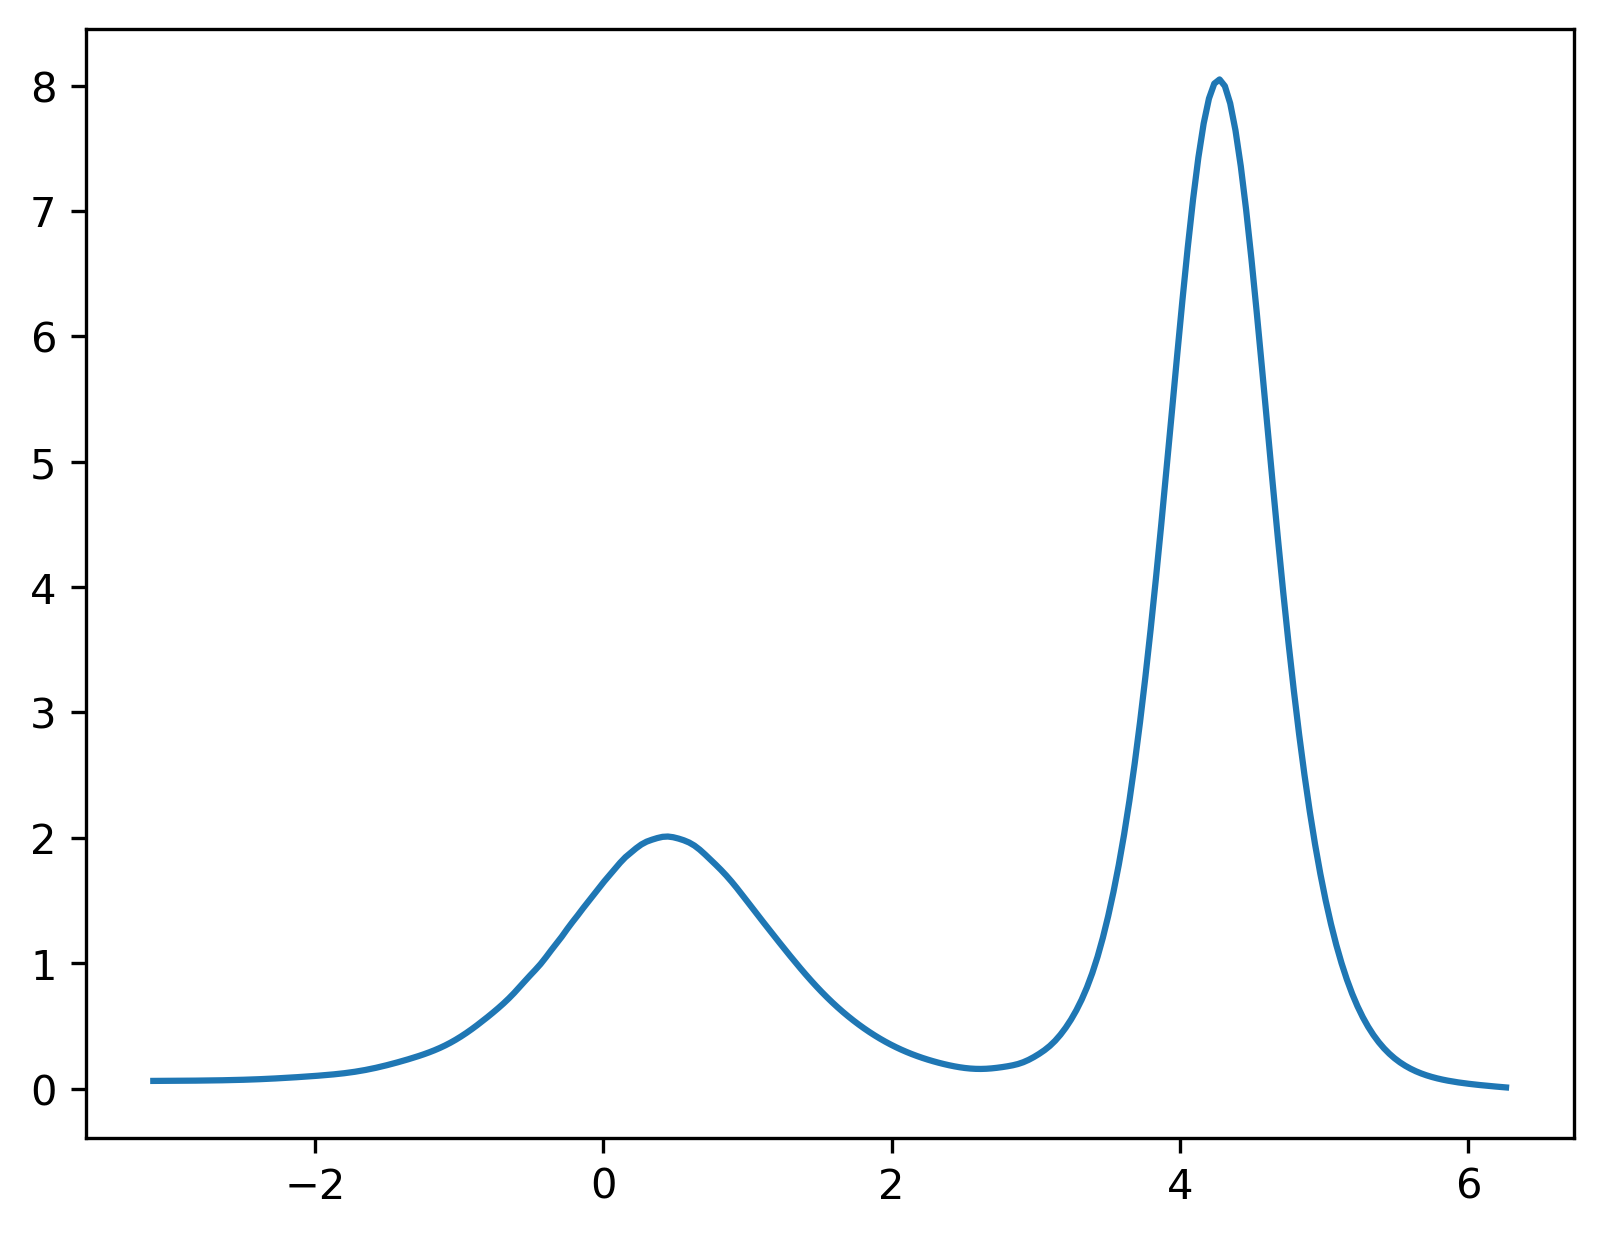

Step number: 48000, Loss: 1.1650848136923742e-05


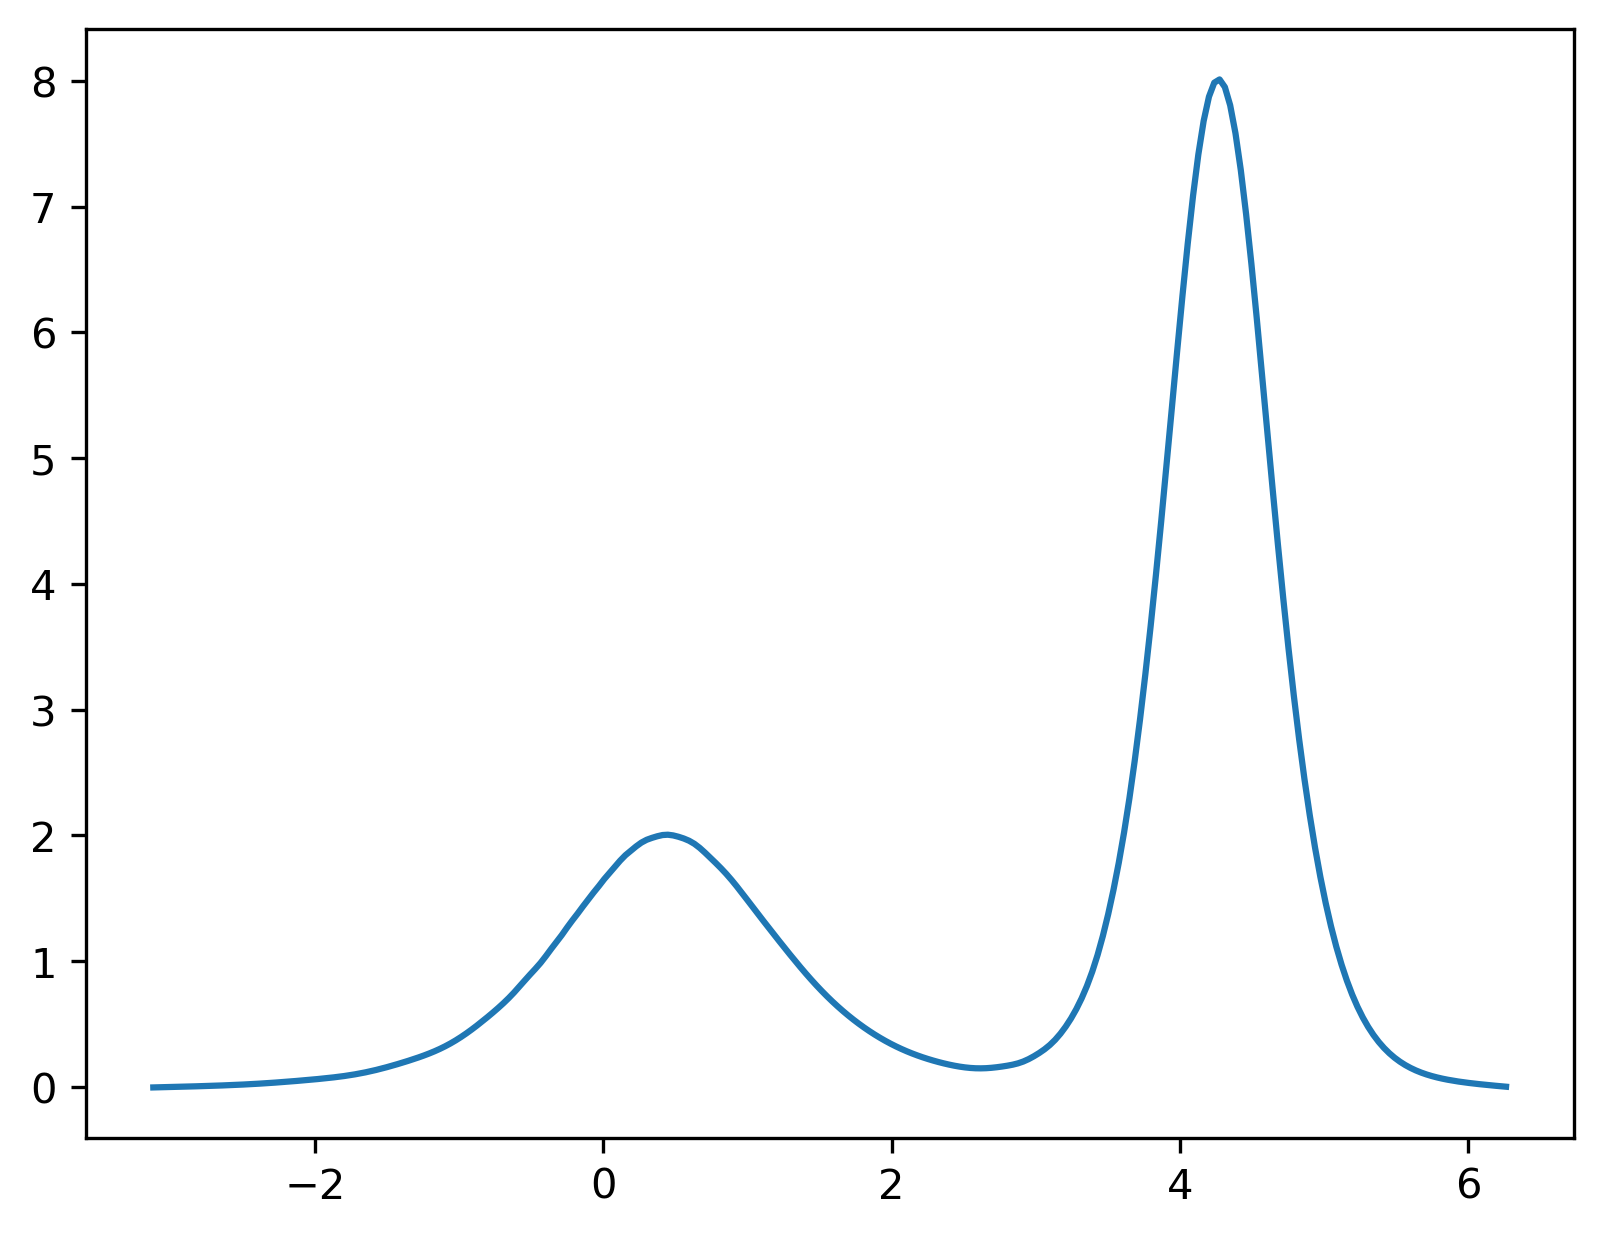

Step number: 49000, Loss: 2.3040352971293032e-05


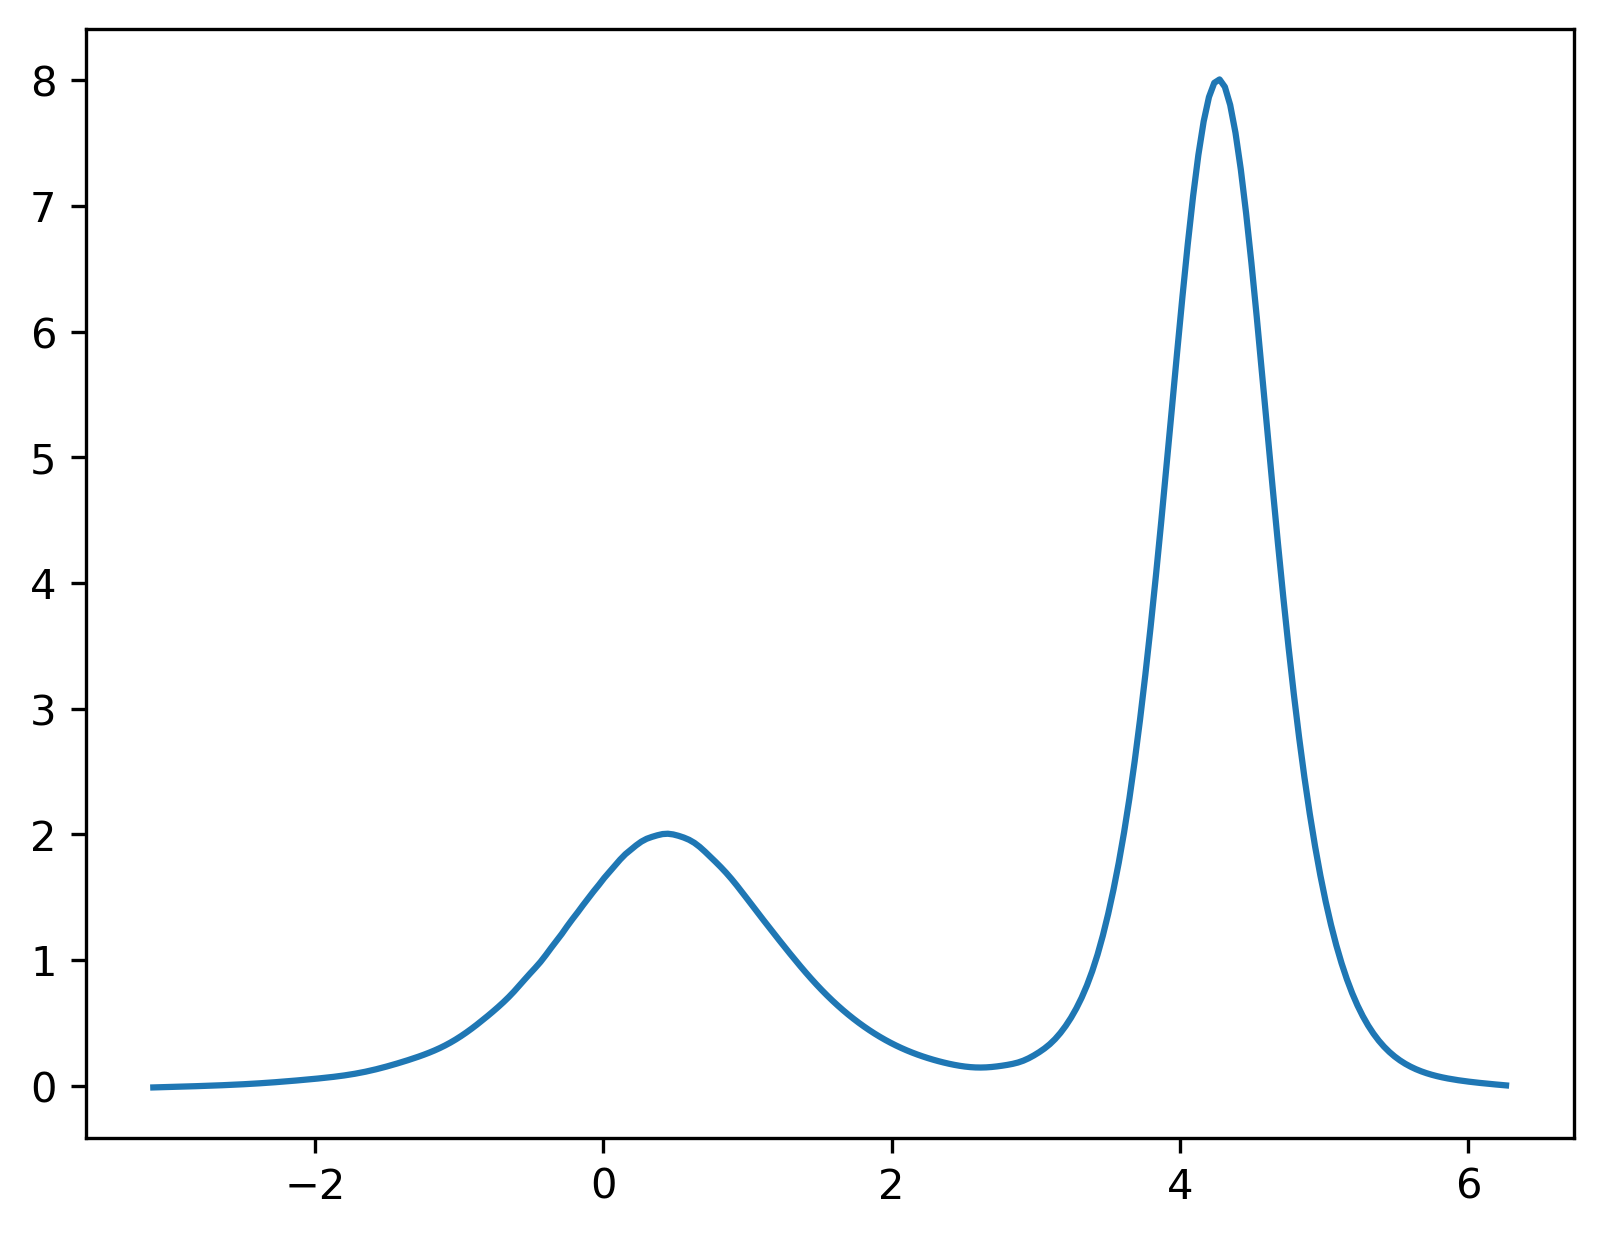

Step number: 50000, Loss: 1.9275254089734517e-05


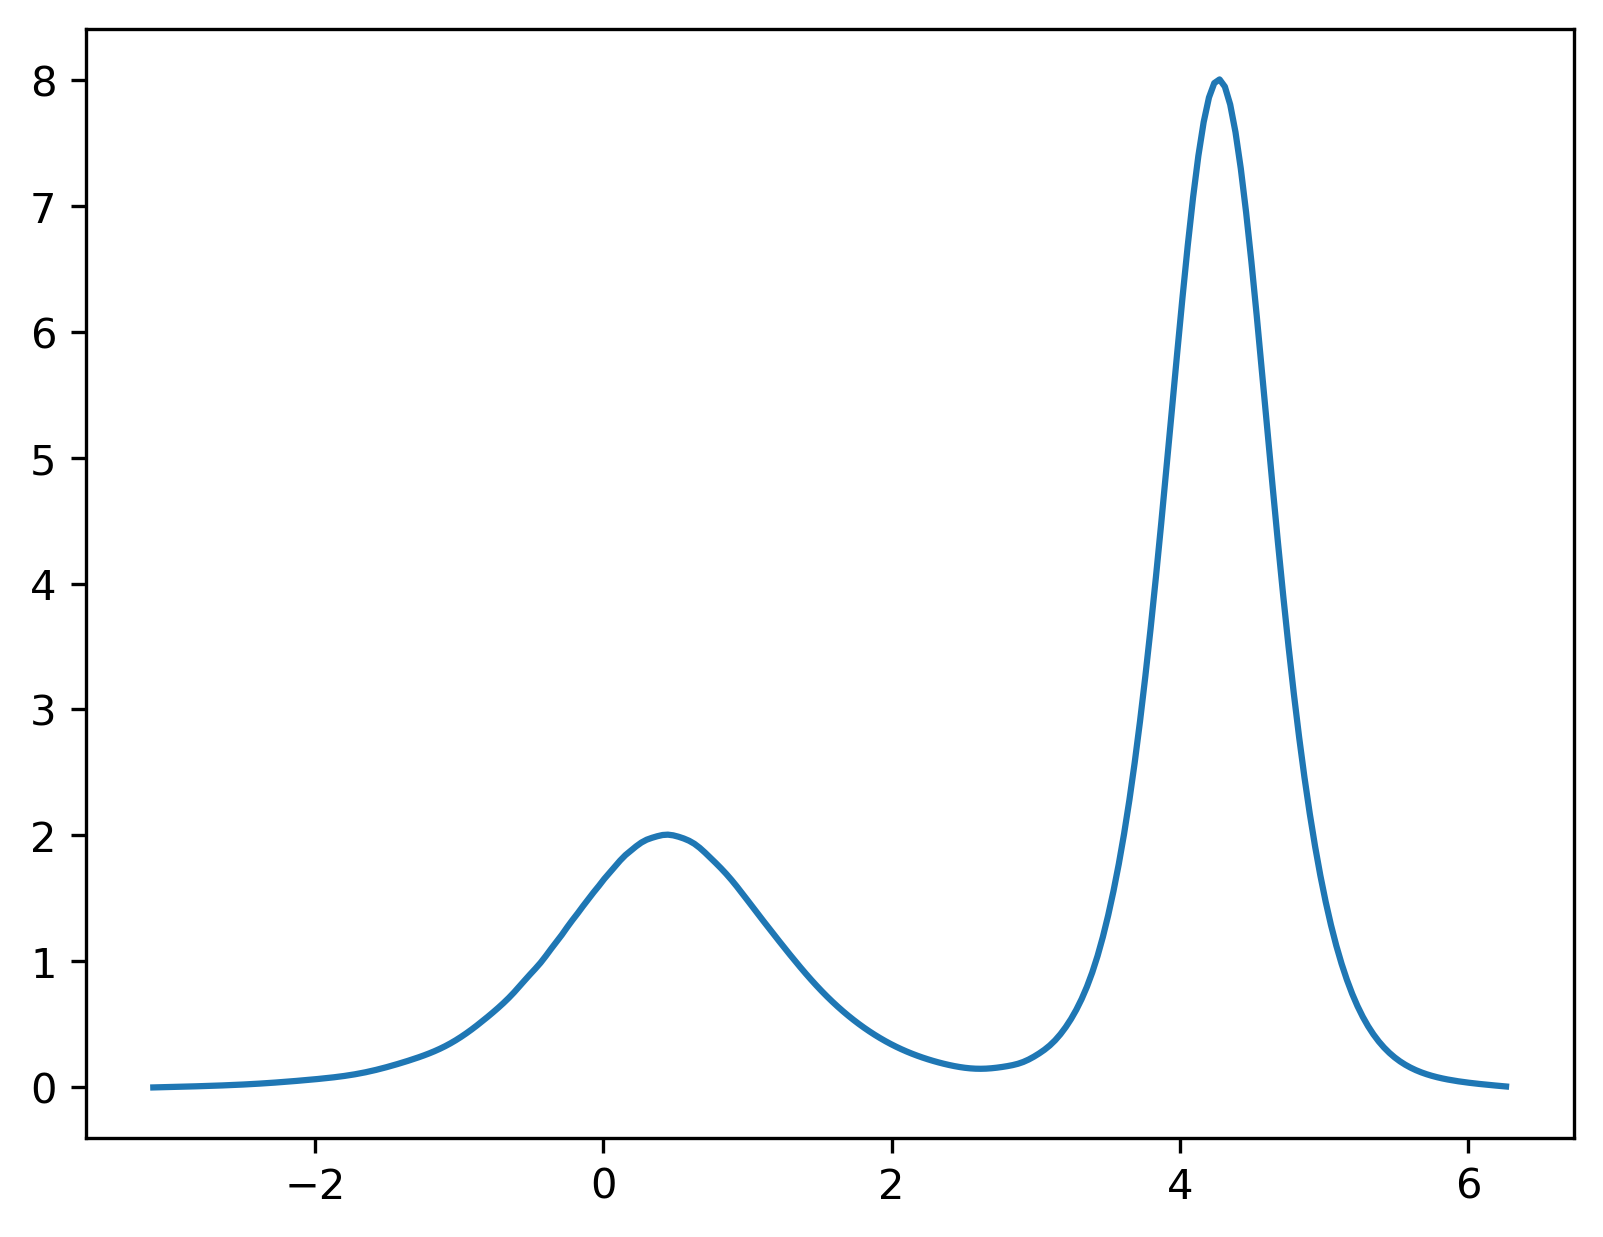

Step number: 51000, Loss: 8.722132406546734e-06


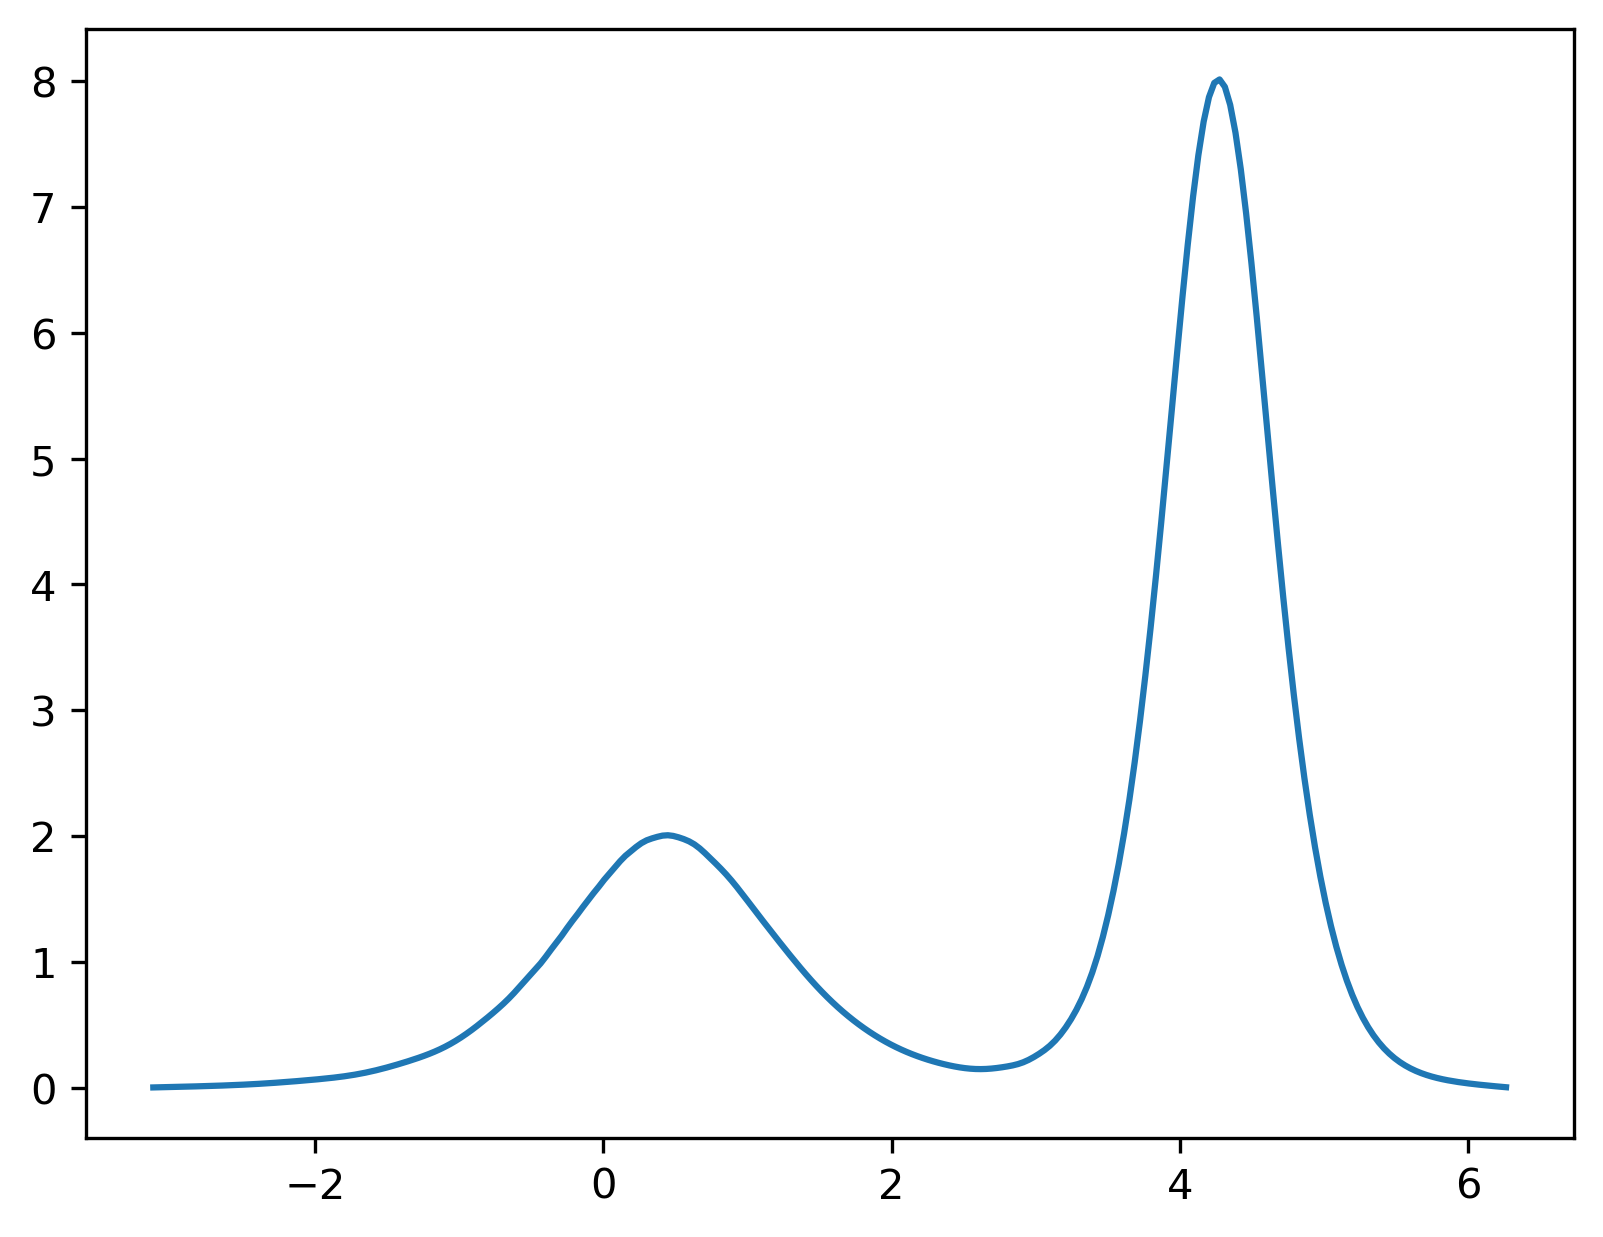

Step number: 52000, Loss: 0.0004170952015556395


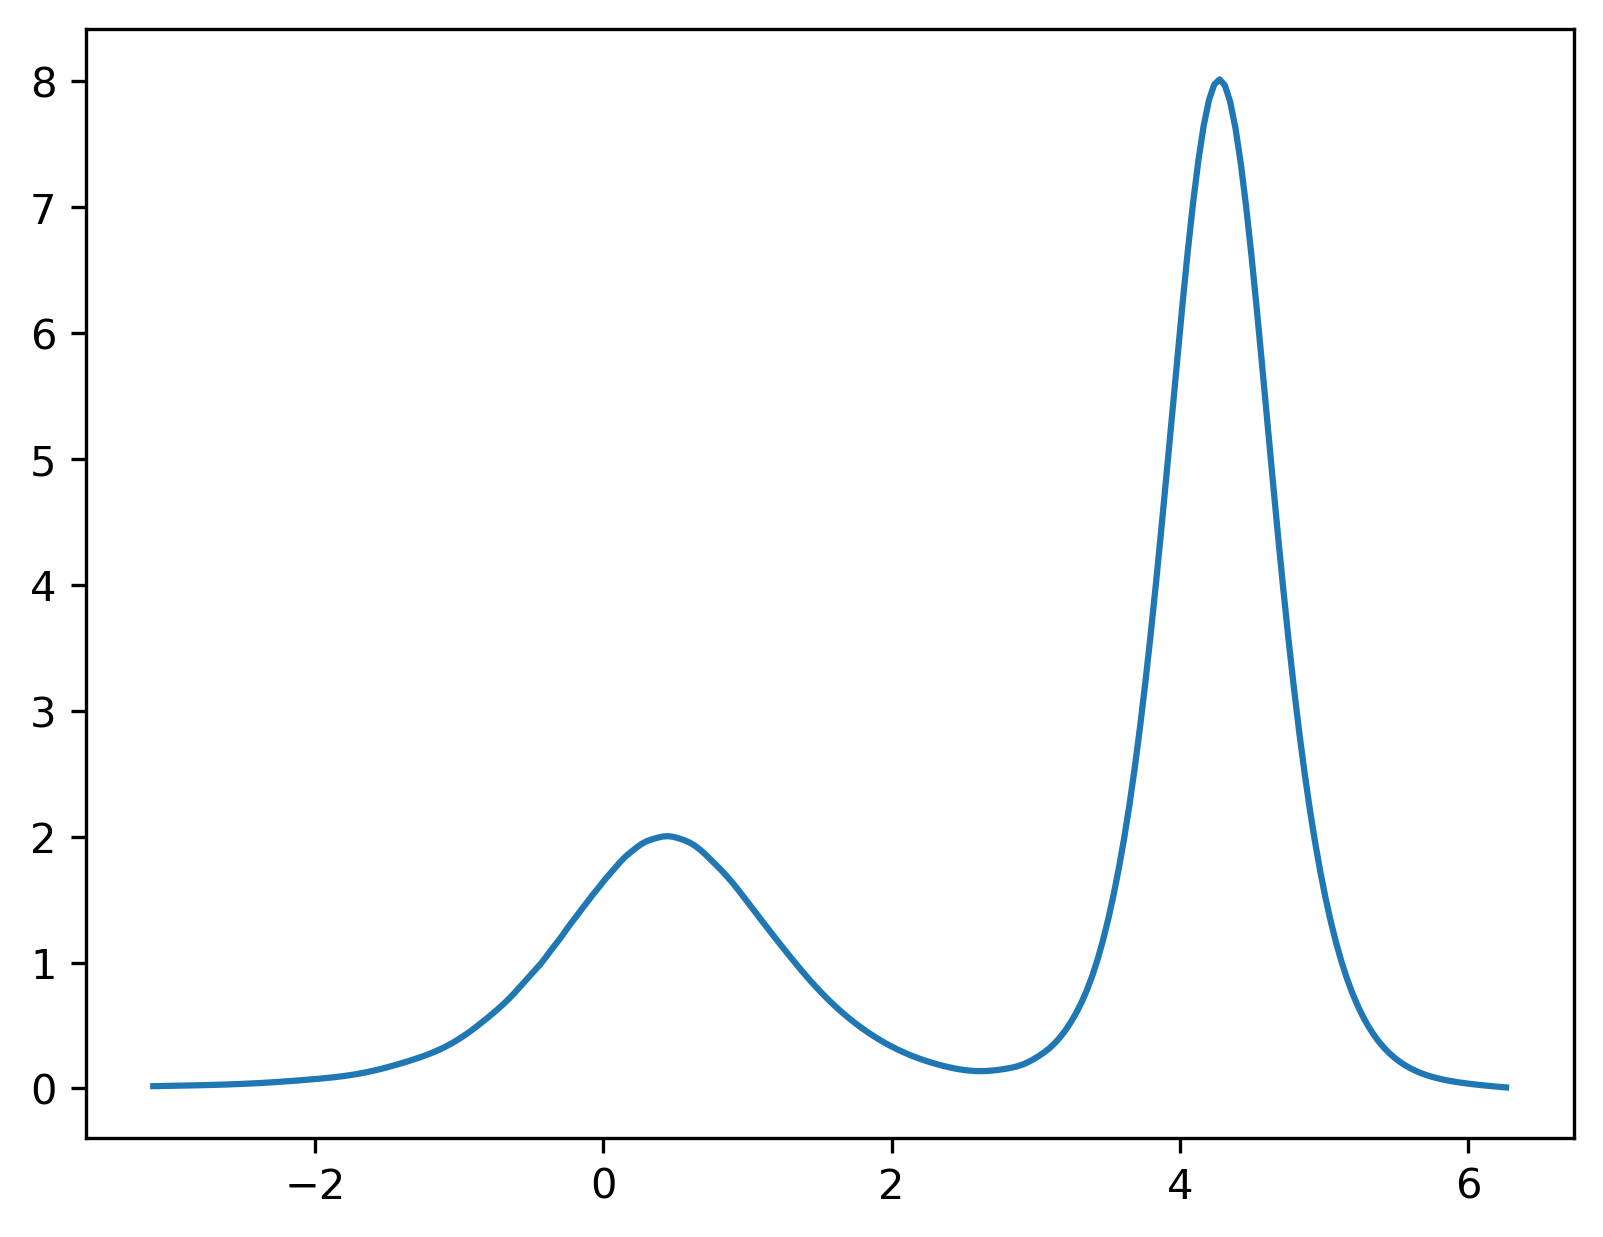

Step number: 53000, Loss: 0.00019600153609644622


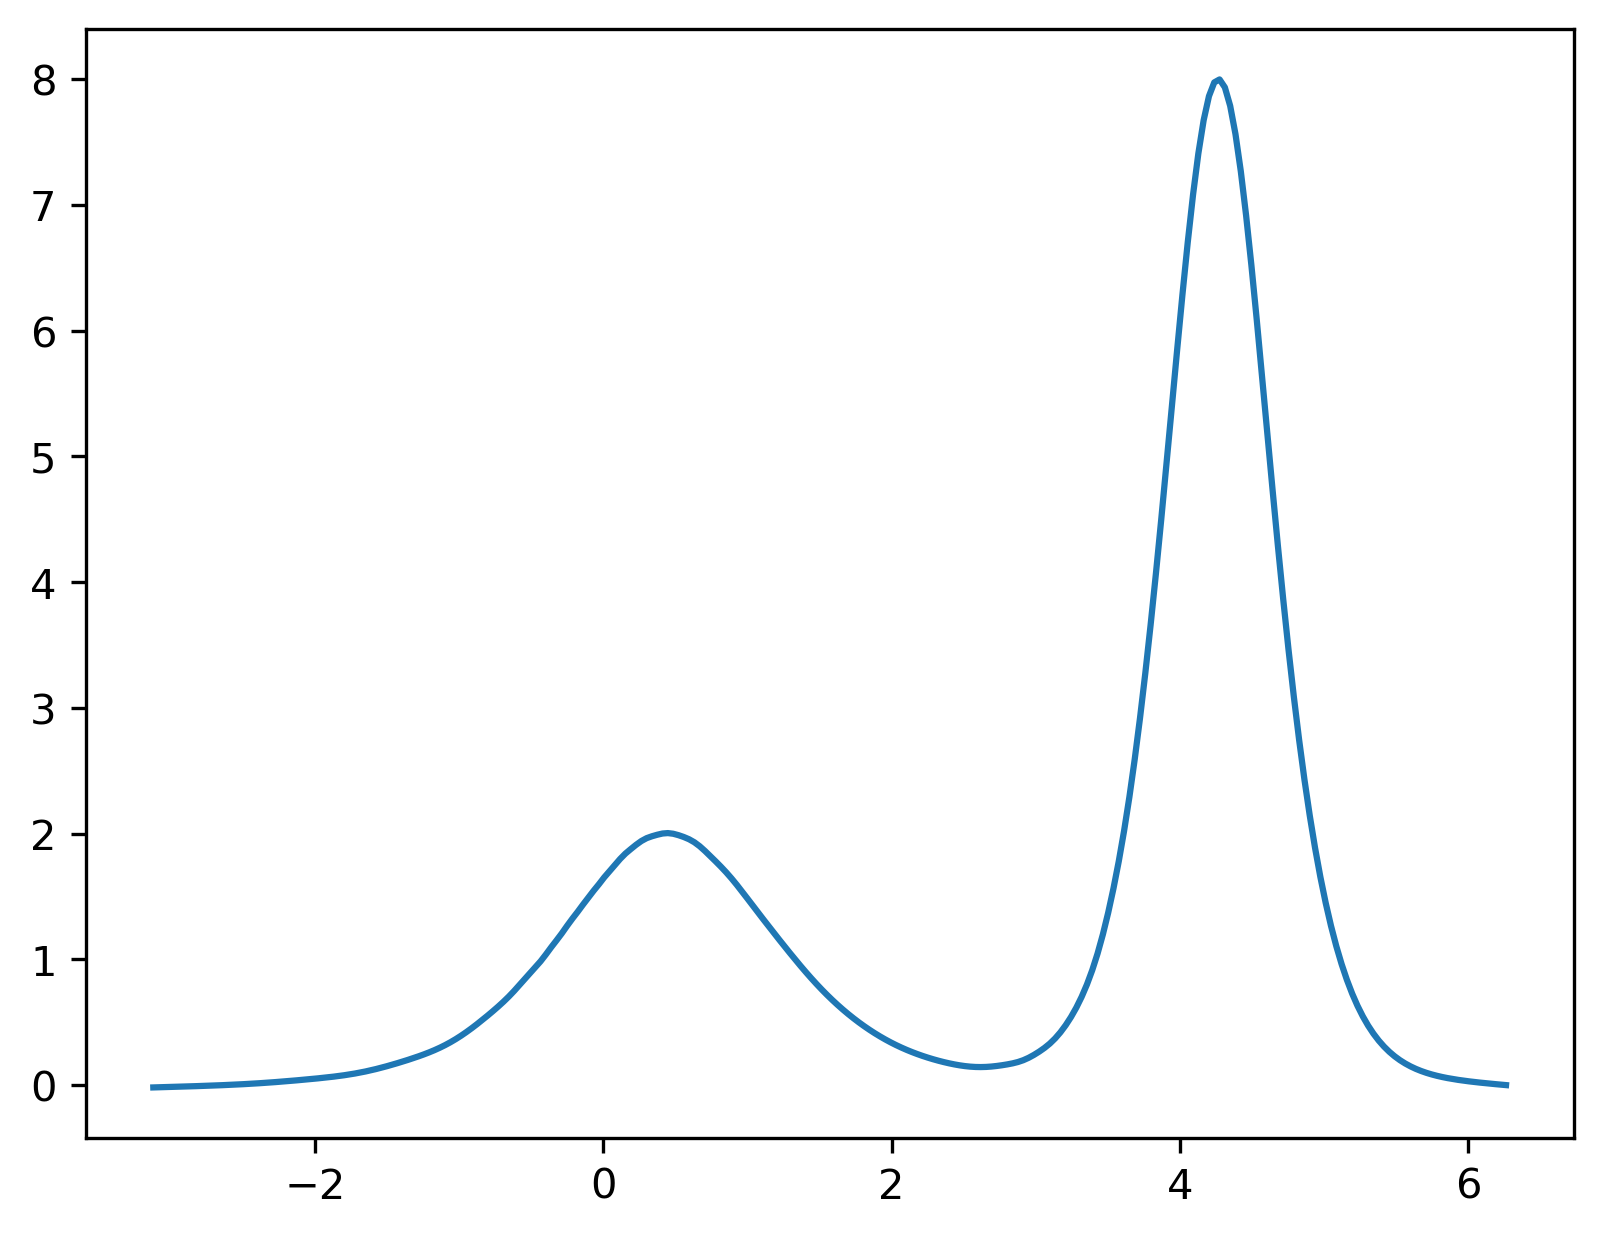

Step number: 54000, Loss: 6.633134944422636e-06


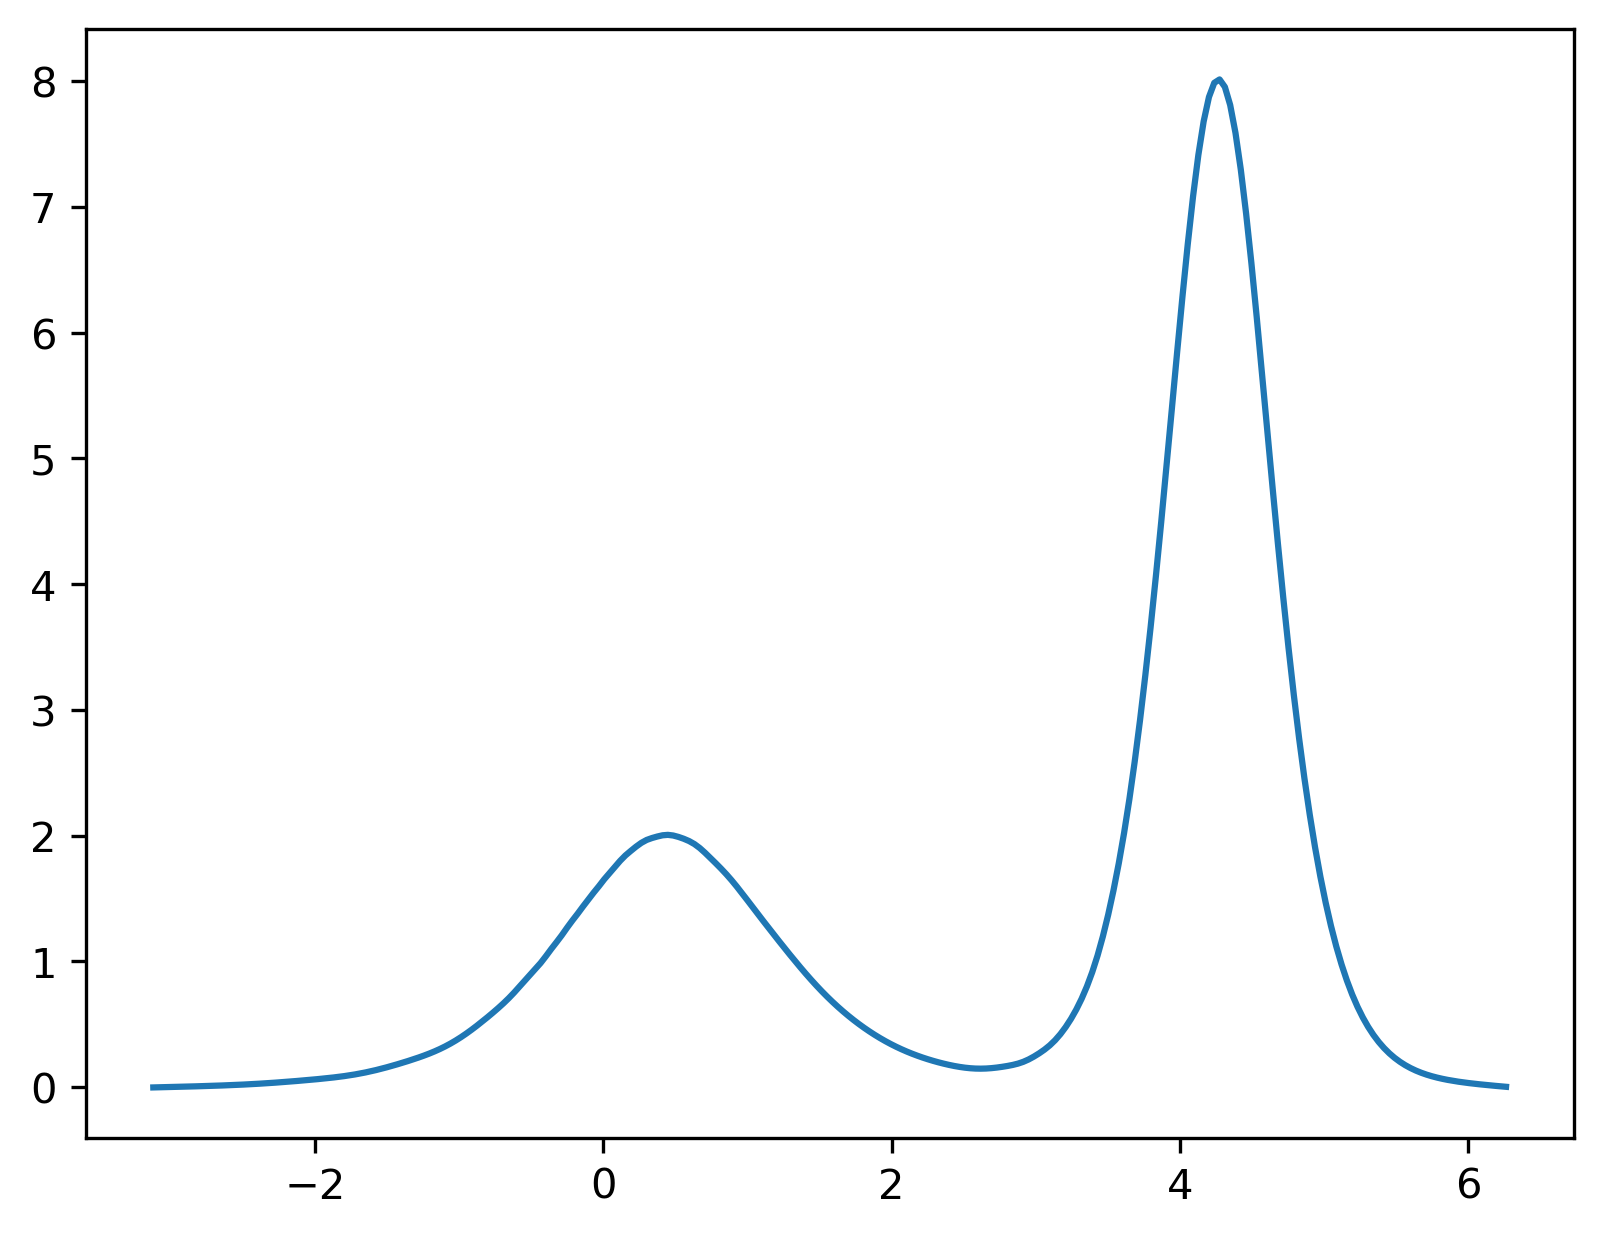

Step number: 55000, Loss: 2.0175764802843332e-05


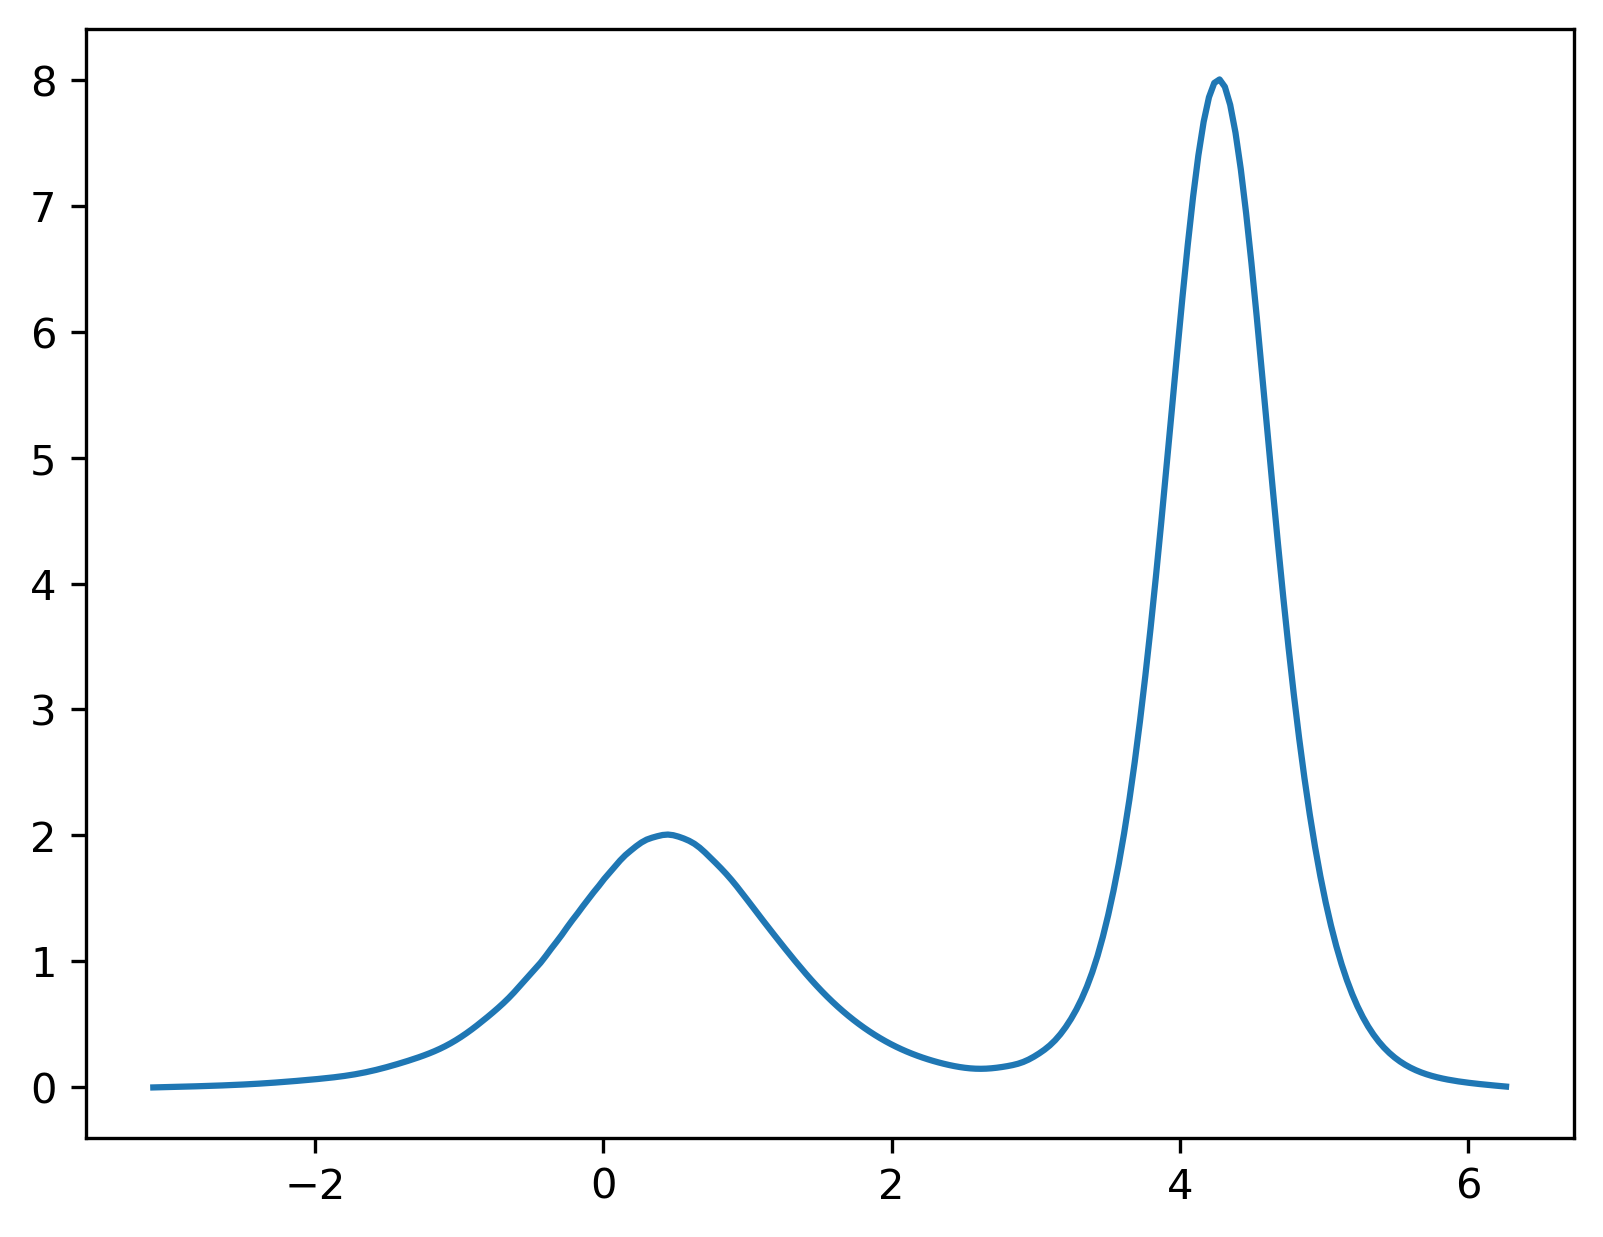

Step number: 56000, Loss: 0.00018838307005353272


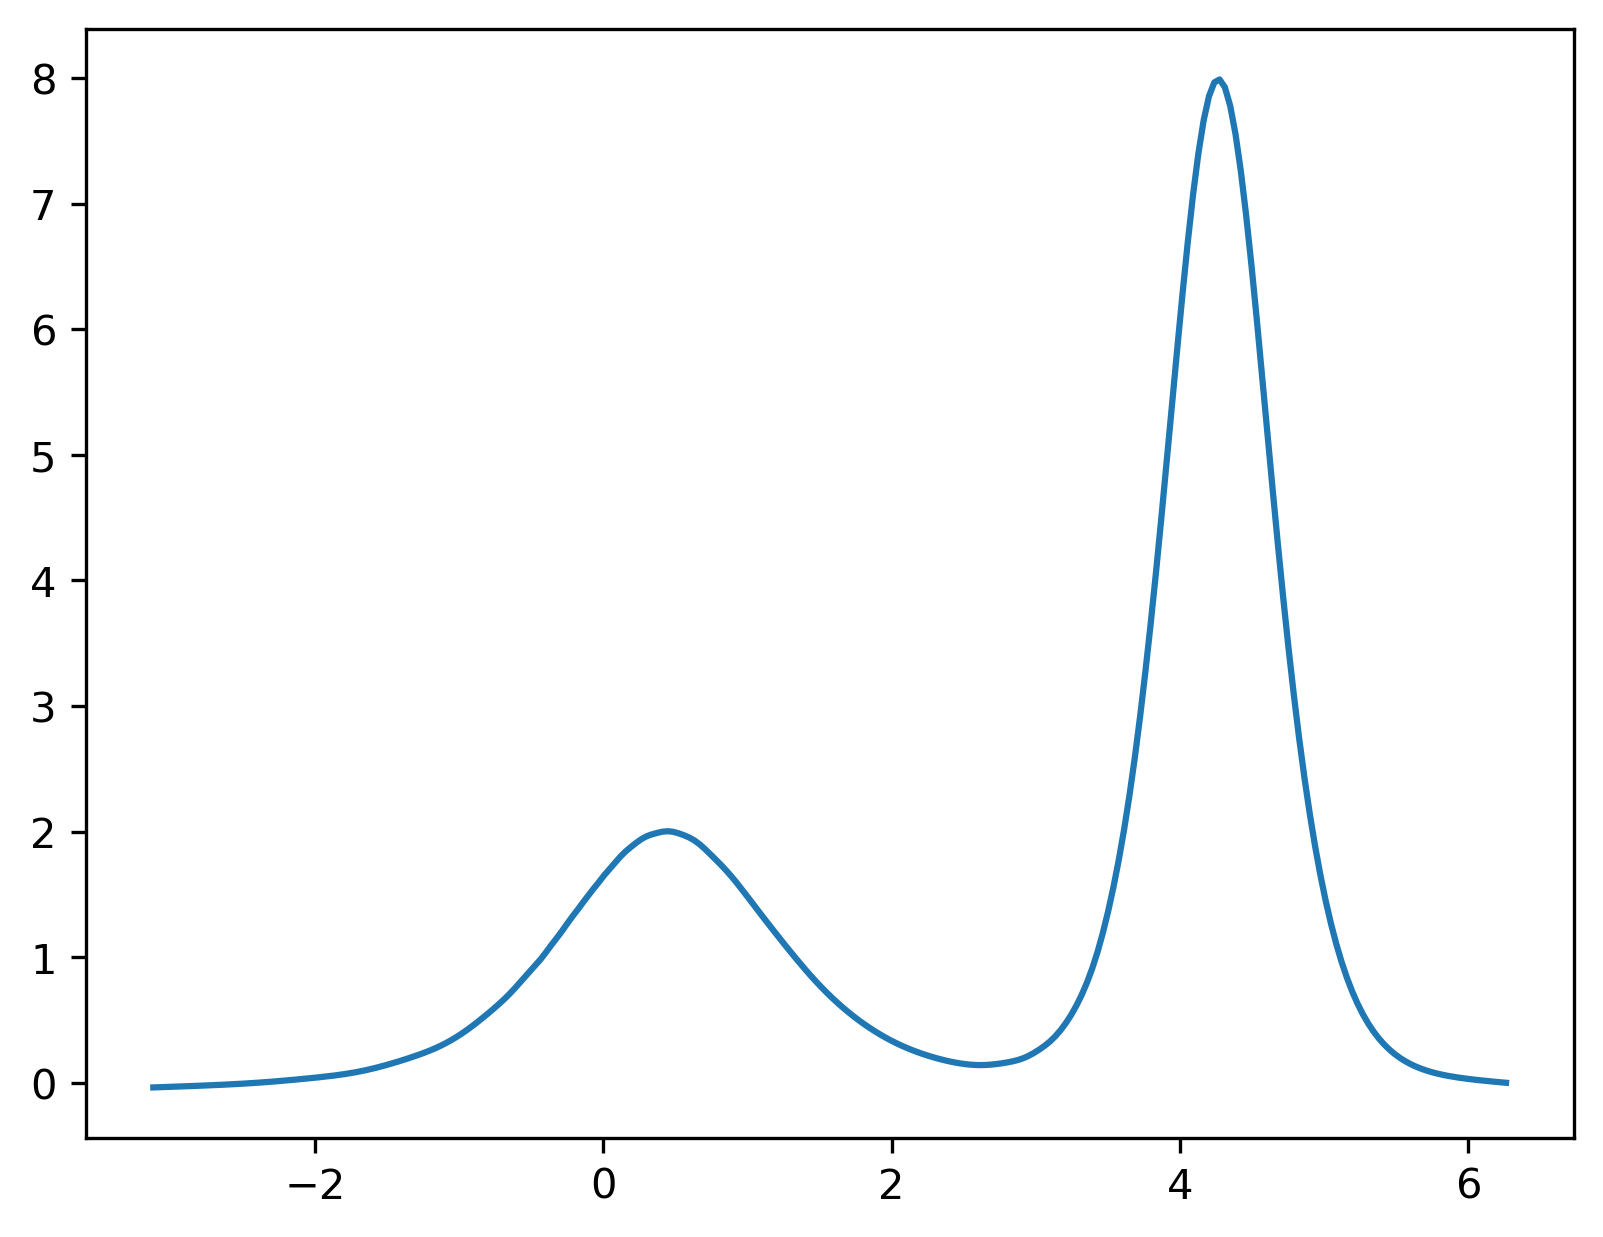

Step number: 57000, Loss: 1.9258051906945184e-05


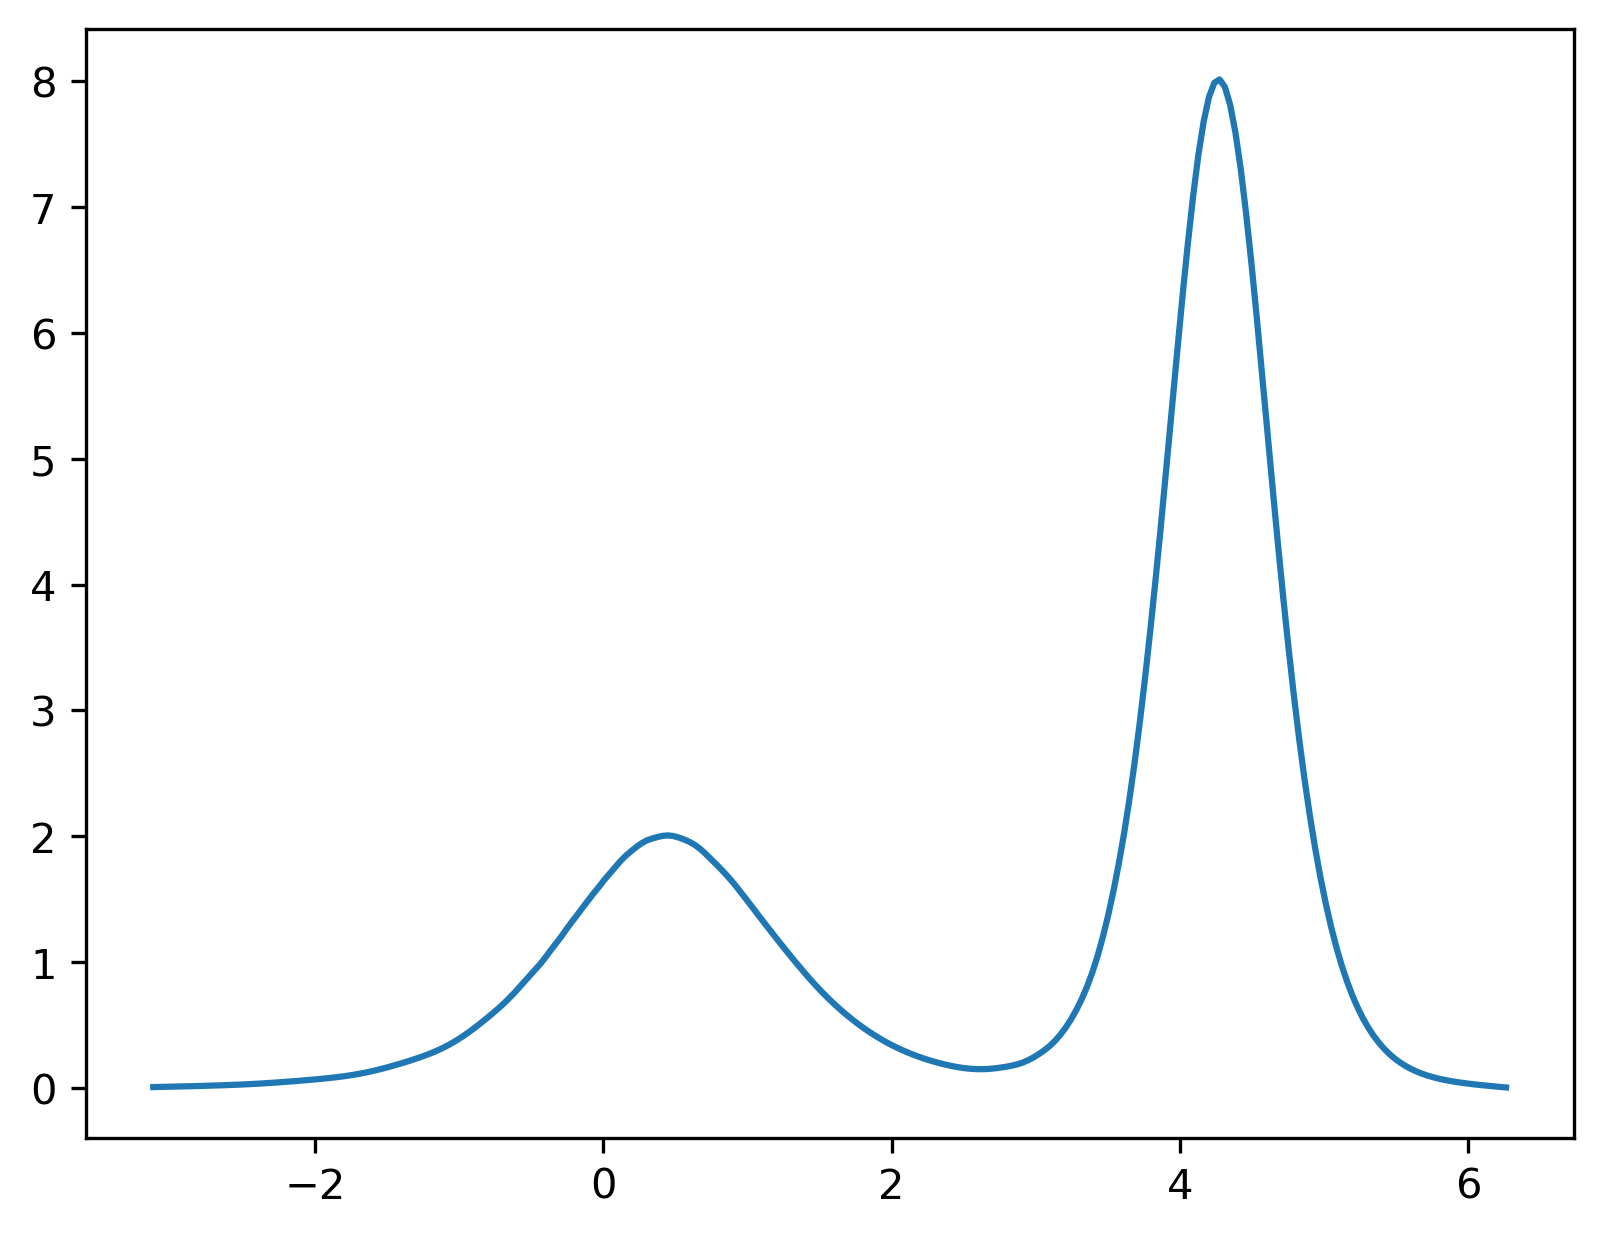

Step number: 58000, Loss: 7.568115961475996e-06


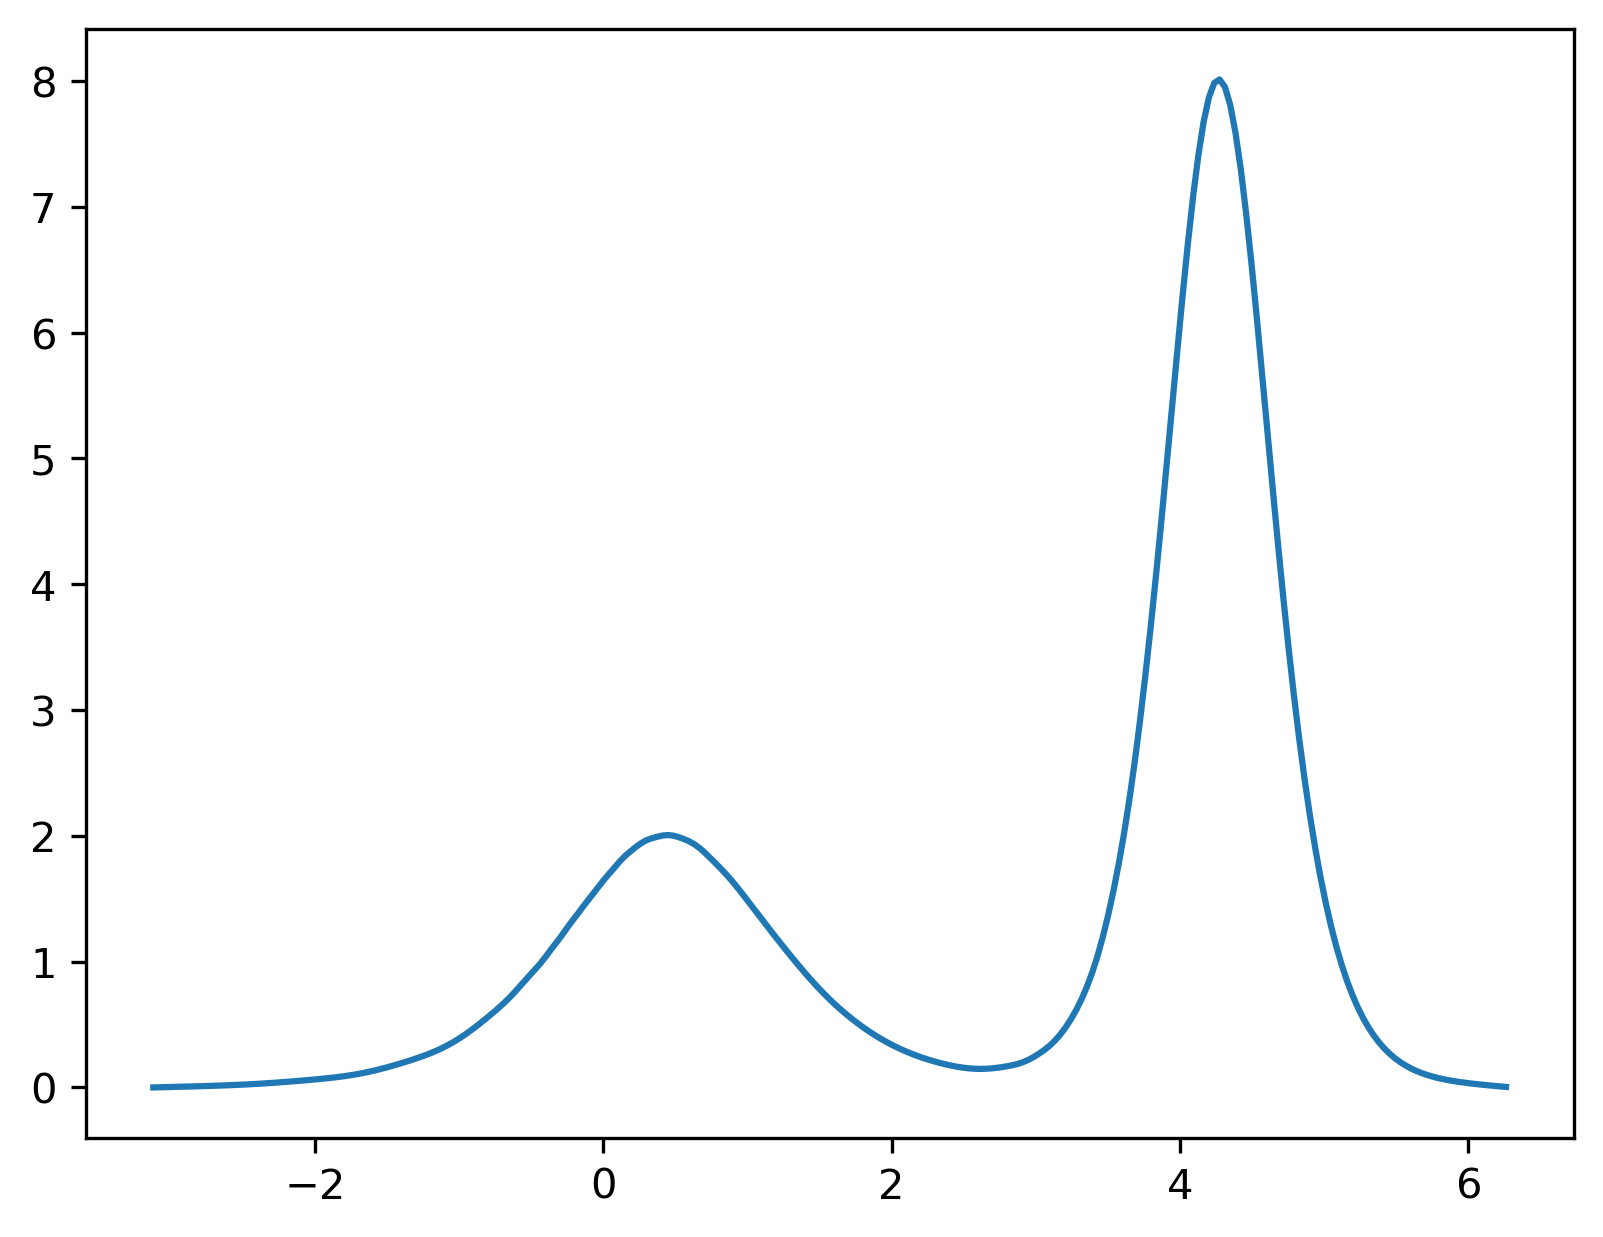

Step number: 59000, Loss: 1.3690370906260796e-05


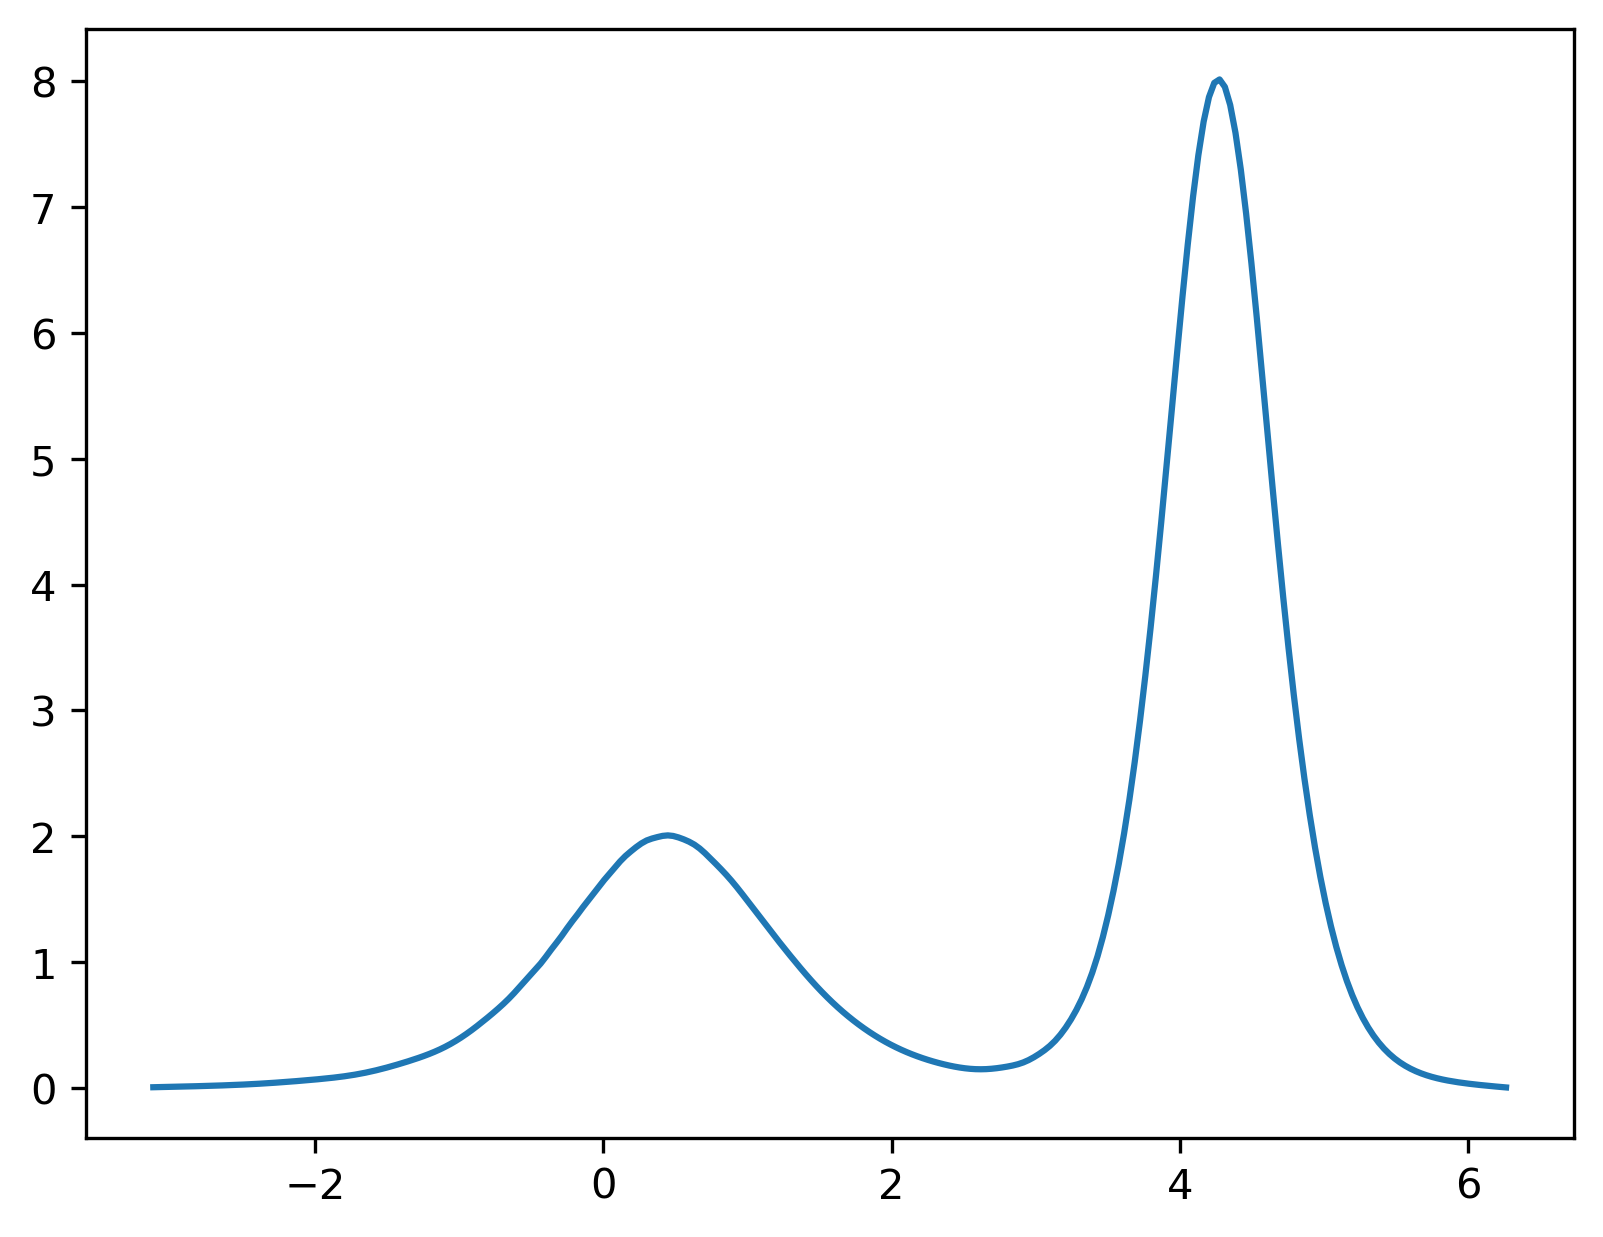

In [25]:

device = "cuda" if torch.cuda.is_available() else "cpu"

model = kdv1dNN(nIn=1,nOut=1,dHidden=50,nHidden=3).to(device)
x = torch.from_numpy(grid1.get_line_data()['data_x']).to(device).type(torch.cuda.FloatTensor)
x = x.view(x.shape[0],-1)

y = torch.from_numpy(data1.data[2500]).to(device).type(torch.cuda.FloatTensor)
y = y.view(y.shape[0],-1)
#print(f"x shape: {x.shape}, y shape: {y.shape}")

optim = torch.optim.Adam(model.parameters(),lr=3e-4)

torch.manual_seed(42)
for step in range(60000):
    optim.zero_grad(set_to_none=True)
    pred = model(x)
    l = torch.mean((pred-y)**2) 
    l.backward()
    optim.step()

    if step % 1000 == 0:
        plot_y = model(x).detach().cpu()
        plt.plot(grid1.get_line_data()['data_x'], plot_y.view(-1))
        print(f"Step number: {step}, Loss: {l}")
        plt.show()

In [3]:
model_phys = kdv1dNN(nIn=1,nOut=1,dHidden=20,nHidden=32).to(device)
phys_points = torch.from_numpy(grid1.get_line_data()['data_x'][::8]).view(-1,1).requires_grad_(True)
phys_points = phys_points.type(torch.cuda.FloatTensor).to(device)

x_sparse = torch.from_numpy(grid1.get_line_data()['data_x'][0:64:4]).to(device).type(torch.cuda.FloatTensor)
x_sparse = x_sparse.view(x_sparse.shape[0],-1)

y = torch.from_numpy(data1.data[2500]).to(device).type(torch.cuda.FloatTensor)
y = y.view(y.shape[0],-1)
#print(f"x shape: {x.shape}, y shape: {y.shape}")

optim_phys = torch.optim.Adam(model_phys.parameters(),lr=1e-5)

torch.manual_seed(42)
for step in range(50000):
    optim_phys.zero_grad(set_to_none=True)
    
    ## This part is responsible for data loss
    pred = model_phys(x_sparse)
    l1 = torch.mean((pred-y[0:64:4])**2)

    ## This is the physics
    phys = model_phys(phys_points)
    ddx = torch.autograd.grad(phys, phys_points, torch.ones_like(phys), create_graph=True)[0]
    d3dx = torch.autograd.grad(
        torch.autograd.grad(ddx, phys_points, torch.ones_like(phys), create_graph=True)[0],
        phys_points, torch.ones_like(phys), create_graph=True)[0]
    l2 = 1e-2*torch.mean((-6 * phys * ddx - d3dx + y[::8])**2)

    lp = l1 + l2
    lp.backward()
    optim_phys.step()

    if step % 1000 == 0:
        plot_y = model_phys(x).detach().cpu()
        px = phys_points.detach().cpu()
        xsp = x_sparse.detach().cpu()
        plt.plot(grid1.get_line_data()['data_x'], plot_y.view(-1))
        plt.scatter(px, torch.zeros_like(px))
        plt.scatter(xsp, data1.data[2500][0:64:4])
        print(f"Step number: {step}, Loss: {lp}")
        plt.show()

NameError: name 'device' is not defined